# 1. Import the needed libraries



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

from IPython.display import SVG
from IPython.display import display
from graphviz import Source

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score




%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' 

# Seeting seaborn style
sns.set()

# 2. Import data

In [2]:
# Making the files available for Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Loading training data
train_base = pd.read_excel("/content/gdrive/MyDrive/Nova/MachineLearningProject/train_demo.xlsx")
train_health = pd.read_excel("/content/gdrive/MyDrive/Nova/MachineLearningProject/train_health.xlsx")
train_habits = pd.read_excel("/content/gdrive/MyDrive/Nova/MachineLearningProject/train_habits.xlsx")

In [4]:
# Merging the training data
train_data = pd.merge(train_base, train_health, how="left", on="PatientID")
train_data = pd.merge(train_data, train_habits, how="left", on="PatientID")
train_data.set_index("PatientID", inplace=True)
train_data.head(3)


Name  Birth_Year                    Region  \
PatientID                                                             
1167.0     Mrs. Stephanie Gay      1965.0                    London   
1805.0       Mr. Sherman Nero      1969.0                South West   
1557.0        Mr. Mark Boller      1974.0  Yorkshire and the Humber   

                                             Education  Disease  Height  \
PatientID                                                                 
1167.0     High School Incomplete (10th to 11th grade)      1.0   155.0   
1805.0     High School Incomplete (10th to 11th grade)      1.0   173.0   
1557.0            Elementary School (1st to 9th grade)      1.0   162.0   

           Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                            
1167.0       67.0             358.0           120.0           21.0   
1805.0       88.0             230.0           142.0            9.0   
1557.0       68.0             226.0           122.0           26.0   

           Physical_Health            Checkup  \
PatientID                                       
1167.0                 2.0  More than 3 years   
1805.0                 0.0           Not sure   
1557.0                 0.0  More than 3 years   

                                                   Diabetes Smoking_Habit  \
PatientID                                                                   
1167.0     Neither I nor my immediate family have diabetes.            No   
1805.0     Neither I nor my immediate family have diabetes.            No   
1557.0     Neither I nor my immediate family have diabetes.            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167.0     I usually consume alcohol every day      Yes   
1805.0      I consider myself a social drinker      Yes   
1557.0      I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1167.0     Less than 1. I do not consume fruits every day.   
1805.0     Less than 1. I do not consume fruits every day.   
1557.0     Less than 1. I do not consume fruits every day.   

                                              Water_Habit  
PatientID                                                  
1167.0                   Between one liter and two liters  
1805.0                   Between one liter and two liters  
1557.0     More than half a liter but less than one liter

In [5]:
# Loading testing data
test_base = pd.read_excel("/content/gdrive/MyDrive/Nova/MachineLearningProject/test_demo.xlsx")
test_health = pd.read_excel("/content/gdrive/MyDrive/Nova/MachineLearningProject/test_health.xlsx")
test_habits = pd.read_excel("/content/gdrive/MyDrive/Nova/MachineLearningProject/test_habits.xlsx")

In [6]:
# Merging the testing data
test_data = pd.merge(test_base, test_health, how="left", on="PatientID")
test_data = pd.merge(test_data, test_habits, how="left", on="PatientID")
test_data.set_index("PatientID", inplace=True)
test_data.head(3)

Name  Birth_Year                    Region  \
PatientID                                                                
1343.0       Mr. Ricardo Sherman      1970.0             East Midlands   
1727.0     Mr. Jessie Strickland      1966.0  Yorkshire and the Humber   
1828.0        Mr. Robert Foreman      1978.0             West Midlands   

                                             Education  Height  Weight  \
PatientID                                                                
1343.0            Elementary School (1st to 9th grade)   172.0    80.0   
1727.0           University Complete (3 or more years)   171.0    80.0   
1828.0     High School Incomplete (10th to 11th grade)   171.0    78.0   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1343.0                203.0           172.0           20.0              2.0   
1727.0                225.0           130.0           21.0              0.0   
1828.0                237.0           130.0           24.0              1.0   

                     Checkup  \
PatientID                      
1343.0              Not sure   
1727.0              Not sure   
1828.0     More than 3 years   

                                                    Diabetes Smoking_Habit  \
PatientID                                                                    
1343.0     I have/had pregnancy diabetes or borderline di...           Yes   
1727.0                                    I do have diabetes            No   
1828.0     I have/had pregnancy diabetes or borderline di...            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1343.0     I usually consume alcohol every day       No   
1727.0      I consider myself a social drinker       No   
1828.0     I usually consume alcohol every day      Yes   

                                               Fruit_Habit  \
PatientID                                                    
1343.0     Less than 1. I do not consume fruits every day.   
1727.0     Less than 1. I do not consume fruits every day.   
1828.0     Less than 1. I do not consume fruits every day.   

                                              Water_Habit  
PatientID                                                  
1343.0                   Between one liter and two liters  
1727.0     More than half a liter but less than one liter  
1828.0                   Between one liter and two liters

# 3. Data Exploration

**3.1 Summaries and Correlations**

In [7]:
train_data.describe()

Birth_Year     Disease      Height     Weight  High_Cholesterol  \
count   800.000000  800.000000  800.000000  800.00000        800.000000   
mean   1966.043750    0.513750  167.806250   67.82750        249.322500   
std      15.421872    0.500124    7.976888   12.11347         51.566631   
min    1855.000000    0.000000  151.000000   40.00000        130.000000   
25%    1961.000000    0.000000  162.000000   58.00000        213.750000   
50%    1966.000000    1.000000  167.000000   68.00000        244.000000   
75%    1974.000000    1.000000  173.000000   77.00000        280.000000   
max    1993.000000    1.000000  180.000000   97.00000        568.000000   

       Blood_Pressure  Mental_Health  Physical_Health  
count      800.000000     800.000000       800.000000  
mean       131.053750      17.345000         4.558750  
std         17.052693       5.385139         5.449189  
min         94.000000       0.000000         0.000000  
25%        120.000000      13.000000         0.000000  
50%        130.000000      18.000000         3.000000  
75%        140.000000      21.000000         7.000000  
max        200.000000      29.000000        30.000000

In [8]:
# Basic summary of the train dataset
train_data.info()
train_data.describe(percentiles = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
Float64Index: 800 entries, 1167.0 to 1117.0
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              800 non-null    object 
 1   Birth_Year        800 non-null    float64
 2   Region            800 non-null    object 
 3   Education         787 non-null    object 
 4   Disease           800 non-null    float64
 5   Height            800 non-null    float64
 6   Weight            800 non-null    float64
 7   High_Cholesterol  800 non-null    float64
 8   Blood_Pressure    800 non-null    float64
 9   Mental_Health     800 non-null    float64
 10  Physical_Health   800 non-null    float64
 11  Checkup           800 non-null    object 
 12  Diabetes          800 non-null    object 
 13  Smoking_Habit     800 non-null    object 
 14  Drinking_Habit    800 non-null    object 
 15  Exercise          800 non-null    object 
 16  Fruit_Habit       800 non-null    

count        mean        std     min       1%     10%  \
Birth_Year        800.0  1966.04375  15.421872  1855.0  1866.99  1956.0   
Disease           800.0     0.51375   0.500124     0.0     0.00     0.0   
Height            800.0   167.80625   7.976888   151.0   151.00   157.0   
Weight            800.0    67.82750  12.113470    40.0    45.00    52.0   
High_Cholesterol  800.0   249.32250  51.566631   130.0   152.92   191.0   
Blood_Pressure    800.0   131.05375  17.052693    94.0   100.00   110.0   
Mental_Health     800.0    17.34500   5.385139     0.0     4.00     9.9   
Physical_Health   800.0     4.55875   5.449189     0.0     0.00     0.0   

                      25%     50%     75%     90%      99%     max  
Birth_Year        1961.00  1966.0  1974.0  1980.0  1987.01  1993.0  
Disease              0.00     1.0     1.0     1.0     1.00     1.0  
Height             162.00   167.0   173.0   178.0   180.00   180.0  
Weight              58.00    68.0    77.0    85.0    95.00    97.0  
High_Cholesterol   213.75   244.0   280.0   312.0   411.00   568.0  
Blood_Pressure     120.00   130.0   140.0   150.0   180.00   200.0  
Mental_Health       13.00    18.0    21.0    24.0    28.00    29.0  
Physical_Health      0.00     3.0     7.0    13.0    20.01    30.0

**Findings:**


* Education has 13 observations with NA
* Some people are super old (1855), looks like those are outliers
* Around 50% have the disease, which makes classes balanced -> stratification is not needed
* Couldn't find any other obvious outliers among quantitative variables



In [9]:
# Checking test sample to see if there are any issues there
test_data.info()
test_data.describe(percentiles = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
Float64Index: 225 entries, 1343.0 to 1757.0
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              225 non-null    object 
 1   Birth_Year        225 non-null    float64
 2   Region            225 non-null    object 
 3   Education         225 non-null    object 
 4   Height            225 non-null    float64
 5   Weight            225 non-null    float64
 6   High_Cholesterol  225 non-null    float64
 7   Blood_Pressure    225 non-null    float64
 8   Mental_Health     225 non-null    float64
 9   Physical_Health   225 non-null    float64
 10  Checkup           225 non-null    object 
 11  Diabetes          225 non-null    object 
 12  Smoking_Habit     225 non-null    object 
 13  Drinking_Habit    225 non-null    object 
 14  Exercise          225 non-null    object 
 15  Fruit_Habit       225 non-null    object 
 16  Water_Habit       225 non-null    

count         mean        std     min       1%     10%  \
Birth_Year        225.0  1967.644444   9.438607  1945.0  1948.72  1956.0   
Height            225.0   167.422222   8.014743   151.0   151.00   155.8   
Weight            225.0    67.800000  12.758750    42.0    43.48    52.0   
High_Cholesterol  225.0   252.408889  51.727410   135.0   156.60   193.6   
Blood_Pressure    225.0   133.595556  18.983098    94.0    94.00   110.0   
Mental_Health     225.0    17.546667   4.902514     3.0     5.00    11.0   
Physical_Health   225.0     5.377778   6.061032     0.0     0.00     0.0   

                     25%     50%     75%     90%      99%     max  
Birth_Year        1961.0  1967.0  1975.0  1981.0  1987.00  1988.0  
Height             162.0   167.0   173.0   178.0   180.00   180.0  
Weight              57.0    68.0    77.0    86.0    93.76    97.0  
High_Cholesterol   217.0   244.0   278.0   324.8   411.00   421.0  
Blood_Pressure     120.0   130.0   144.0   160.0   180.00   200.0  
Mental_Health       15.0    18.0    22.0    23.0    26.76    27.0  
Physical_Health      0.0     4.0     9.0    14.0    25.32    30.0

**Findings:**



*   No NAs in the test sample
*   The distributions of quantitative variables look the same as in train data



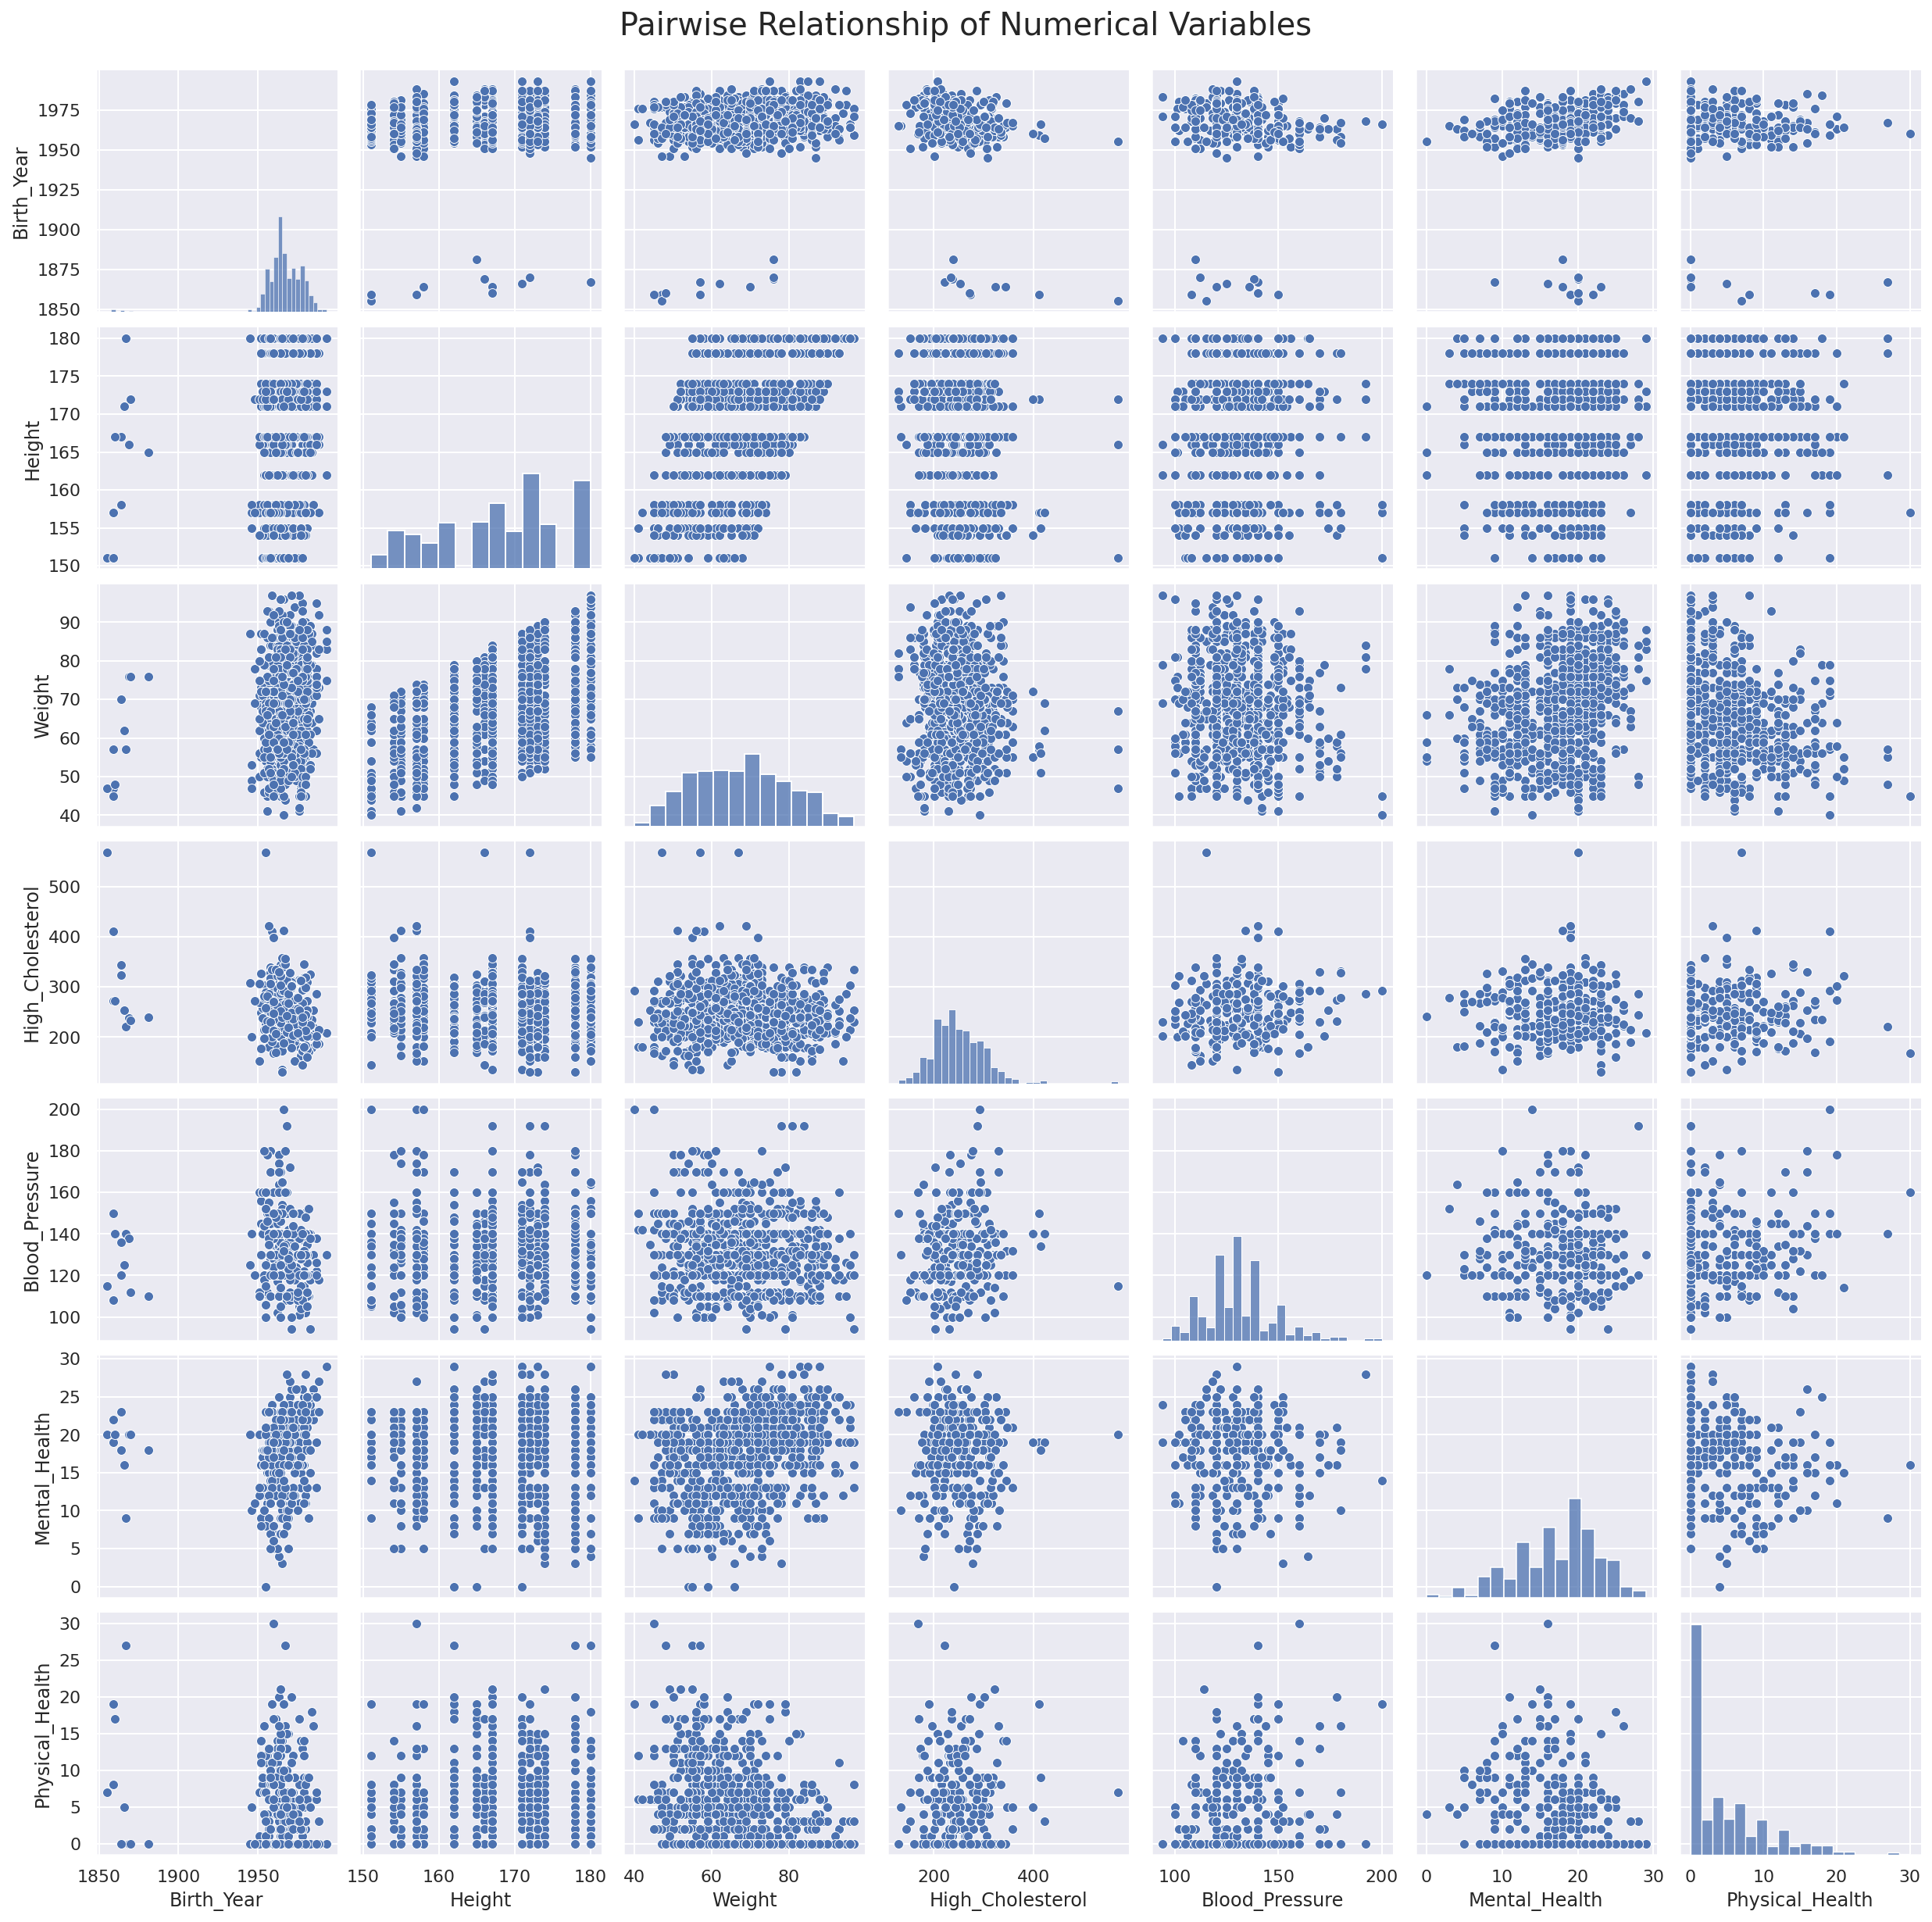

In [10]:
# Pairwise Relationship of Numerical Variables

# Setting pairplot
sns.pairplot(train_data[["Birth_Year", "Height", "Weight", "High_Cholesterol", 
                "Blood_Pressure", "Mental_Health", "Physical_Health"]], 
             diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

**Findings:**



*   No strong correlations were found between numerical variables, except the one between height and weight (the obvious one)
*   The distributions look fine and close to normal except Physical Health and Height. Which is not an issue at all as these variables will be converted to categorical ones later on
*   There are 3 potential outliers in High_Cholesterol with the same Blood Pressure, Mental Health, Physical Health and Birth Year (which is highly unlikely). Should be removed from the sample
*   No other obvious outliers were visually detected





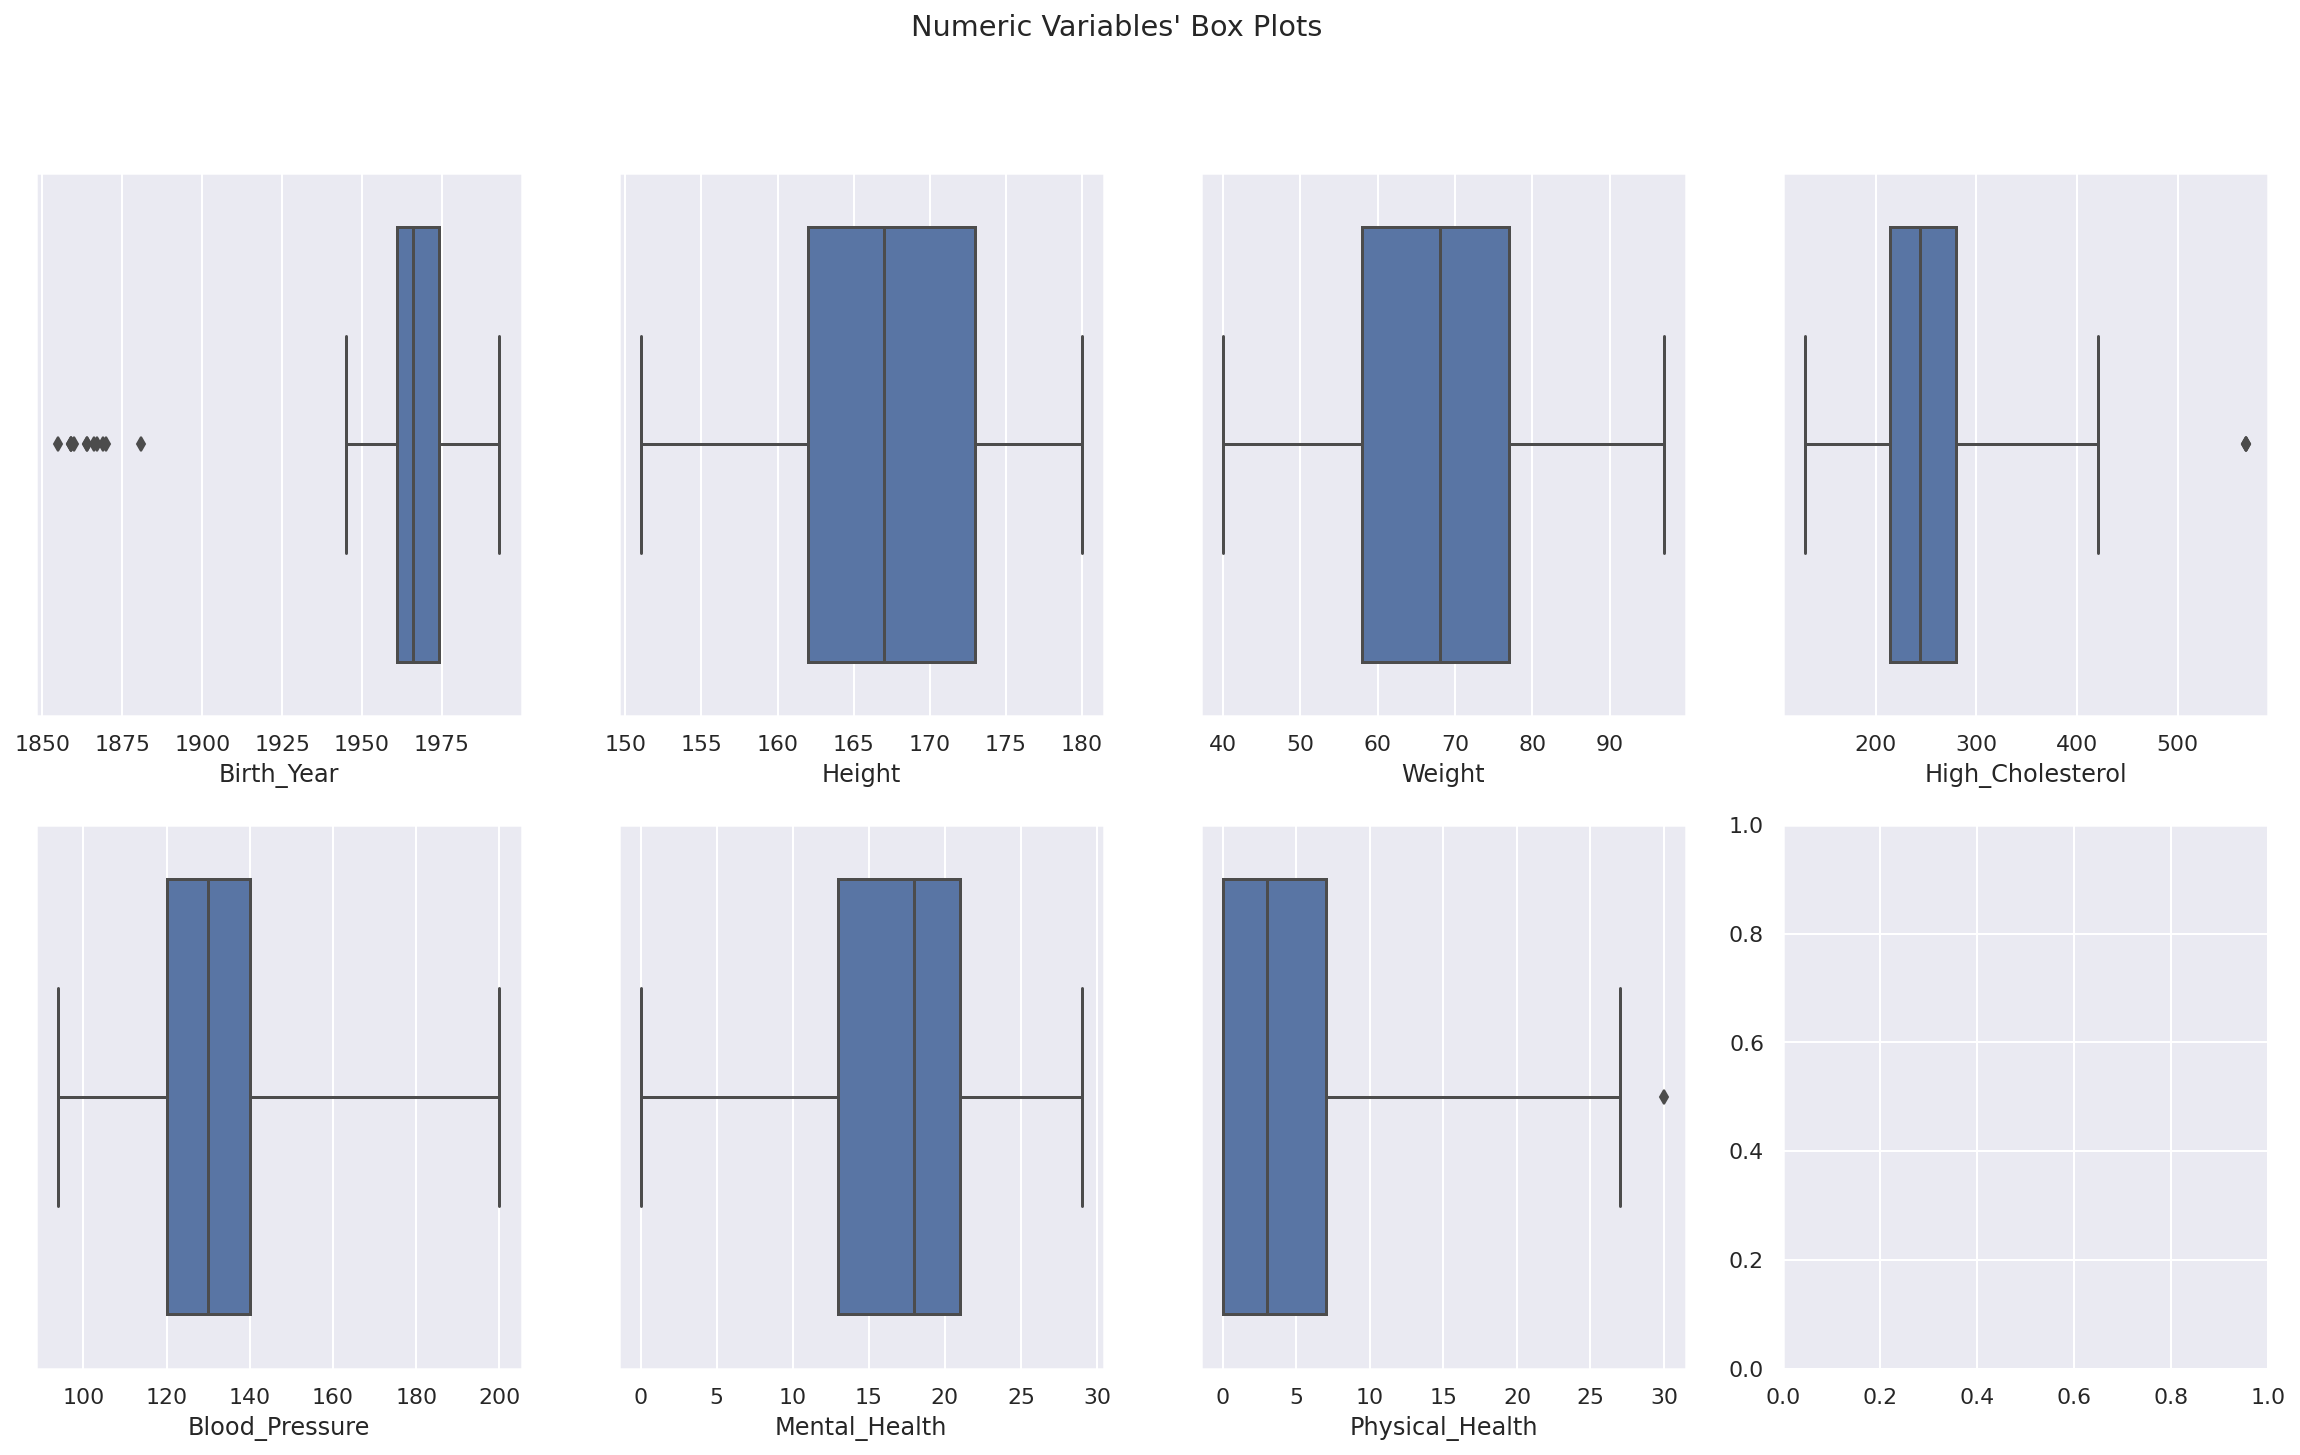

In [11]:
# Creating boxlots for the Numerical variables

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, 4, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot 
# (using 3 interquartile ranges for higher tolerance level):

for ax, feat in zip(axes.flatten(), ["Birth_Year", "Height", "Weight", "High_Cholesterol", 
                                     "Blood_Pressure", "Mental_Health", "Physical_Health"]): 
    sns.boxplot(x=train_data[feat], ax=ax, whis = 3) 
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

**Findings:**

*   High Cholesterol indeed has outlers




In [12]:
#Creating a function to perform quick univariate analysis
def stat_sample(df, col):
    return pd.concat([df.groupby(col)["Disease"].count().rename("cnt"),
                      df.groupby(col)["Disease"].sum().rename("sum Disease"),
                      df.groupby(col)["Disease"].mean().rename("Disease rate").round(3)],
                     axis = 1)

**3.2 Gender**

In [13]:
# Create Gender variable and delete Name variable as it is redundant after extracting Gender 
train_data["Gender"] = np.where(train_data["Name"].str[:4] == "Mrs.",0,1)
test_data["Gender"] = np.where(test_data["Name"].str[:4] == "Mrs.",0,1)

train_data = train_data.drop(["Name"], axis=1)
test_data = test_data.drop(["Name"], axis=1)

stat_sample(train_data,["Gender"]).sort_values("Disease rate")

cnt  sum Disease  Disease rate
Gender                                
1       564        237.0         0.420
0       236        174.0         0.737

Highly correlated variable. Could potentially interfere with height and weight

**3.3 Birth Year**

(array([0.00310078, 0.00155039, 0.01550388, 0.01705426, 0.03875969,
        0.03565891, 0.04186047, 0.02635659, 0.05116279, 0.01860465,
        0.02325581, 0.02790698, 0.02170543, 0.01860465, 0.00775194]),
 array([1945.        , 1947.86666667, 1950.73333333, 1953.6       ,
        1956.46666667, 1959.33333333, 1962.2       , 1965.06666667,
        1967.93333333, 1970.8       , 1973.66666667, 1976.53333333,
        1979.4       , 1982.26666667, 1985.13333333, 1988.        ]),
 <a list of 1 Patch objects>)

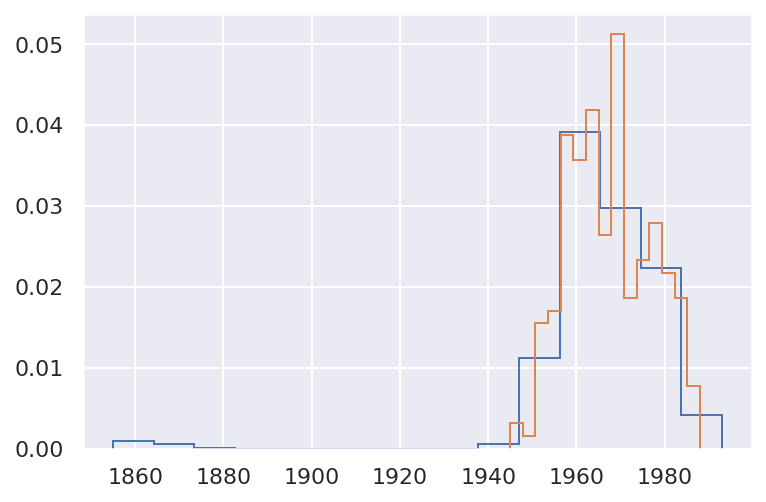

In [14]:
#Checking distribution of a Birth year separately
plt.hist(train_data["Birth_Year"], bins=15, density = True, histtype = "step")
plt.hist(test_data["Birth_Year"], bins=15, density = True, histtype = "step")

Distribution of the birth years in 19th century looks like the same as in 20th century which leads to the assumption that it is due to some mistake in just one digit (especially considering that the blood pressure measuring device was invented in 1880s, but the observations are from earlier times). In test dataset there are no birth years in 19th century.

In [15]:
#Fixing Birth Year issue

train_data.loc[train_data["Birth_Year"] <1900 , "Birth_Year"] = train_data["Birth_Year"]+100

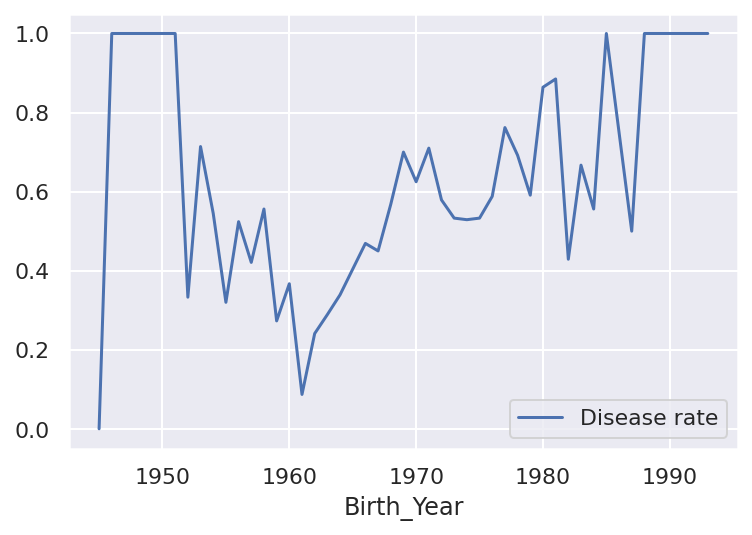

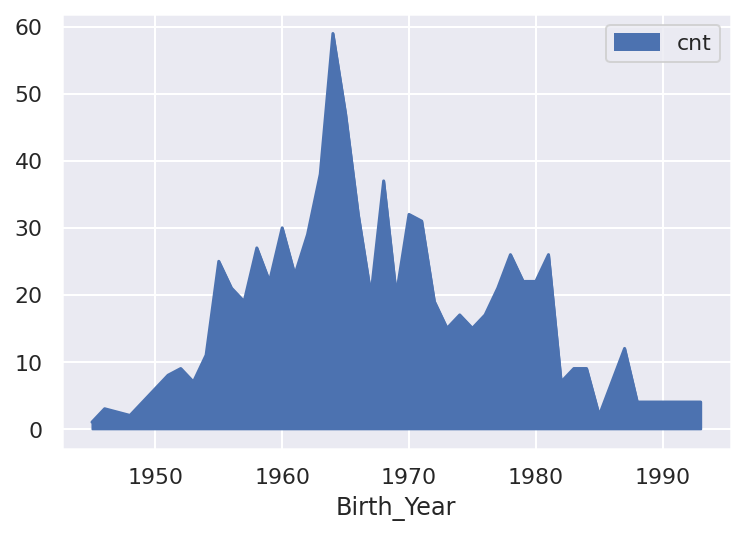

In [16]:
stat_sample(train_data,"Birth_Year").plot(y='Disease rate', use_index=True)
stat_sample(train_data,"Birth_Year").plot(y='cnt', use_index=True, kind = 'area')

**Findings:**



*   Dependency is not monotonous, disease rate decreases before 1961 and increases after with almost equal rates
*   We decided not to convert the birth years into patient's age because we don't know the date when all this data was gathered



In [17]:
# Use MinMaxScaler, as age variable doesn't exhibit nonlinear relationship
# Applied later in analysis

#train_data["Birth_Year_transformed"] = np.log(abs(train_data["Birth_Year"]-1961)+1)
#test_data["Birth_Year_transformed"] = np.log(abs(test_data["Birth_Year"]-1961)+1)

#stat_sample(train_data,"Birth_Year_transformed").plot(y='Disease rate', use_index=True)
#stat_sample(train_data,"Birth_Year_transformed").plot(y='cnt', use_index=True, kind = 'area')

**3.4 Regions**

In [18]:
stat_sample(train_data,"Region").sort_values("Disease rate")

cnt  sum Disease  Disease rate
Region                                                  
North East                 22         10.0         0.455
North West                 59         27.0         0.458
East Midlands             154         76.0         0.494
London                    136         69.0         0.507
East of England            80         41.0         0.512
South East                 84         43.0         0.512
Yorkshire and the Humber   64         34.0         0.531
South West                107         58.0         0.542
West Midlands              89         49.0         0.551
LONDON                      5          4.0         0.800

**Findings:**



*   London and LONDON should be merged, it's just different spelling
*   North of England seem to demonstrate lower disease rates for some reason. We can merge North West and North East of England into one group as they are having the same disease rates and it would be logically relevant.
*   On the other hand West of England seem to demonstrate higher disease rates. We can merge West Midlands and South West into one group as they are having the similar disease rates and it would be logically relevant.
*   All other regions can be merged as well as they are both having average disease rates and also can be grouped as being Eastern parts of England geographically.
* Note for the report: ungrouped, no single region has a any significant relationship according to spearman as is
* Overall, disease rate doesn't depend on the regions significantly. Even if the variable will be included to the model, it won't be very strong one

* In general, there is no group which significantly differes in disease rate from the other. The difference is mostly just a matter of 1-2 patients having or not having the disease
* That's why the best decision would be just to regroup regions into Bad and Good ones





In [19]:
#Grouping the variable Region, repeating the same for the test sample
def region_grouping(r):
    if r in ["North East", "North West", "East Midlands"]: 
        return 0
    else: 
        return 1

train_data["Region_bad"] = train_data["Region"].map(region_grouping)
test_data["Region_bad"] = test_data["Region"].map(region_grouping)

stat_sample(train_data,"Region_bad").sort_values("Disease rate")

cnt  sum Disease  Disease rate
Region_bad                                
0           235        113.0         0.481
1           565        298.0         0.527

**3.5 Education**

In [20]:
#filling with string NULL as otherwise group_by doesn't work with NaN, later can be undone if needed
#Note: test sample doesn't have any NA

train_data["Education"] = train_data['Education'].fillna('NULL') 
stat_sample(train_data,"Education").sort_values("Disease rate")

cnt  sum Disease  Disease rate
Education                                                                  
High School Graduate                         196         89.0         0.454
High School Incomplete (10th to 11th grade)  102         47.0         0.461
University Complete (3 or more years)        239        123.0         0.515
I never attended school / Other               30         17.0         0.567
Elementary School (1st to 9th grade)         183        105.0         0.574
University Incomplete (1 to 2 years)          37         22.0         0.595
NULL                                          13          8.0         0.615

**Findings:**



*   Those who never attended university but attended high school have lower chance of having a disease 
*   It is better to merge High School Graduate and High School Incomplete (10th to 11th grade)	groups into one group as they have basically the same disease rate. Also it is logically relevant to do so.
*   NaN is closer to the worse group 





In [21]:
def education_grouping(r):
    if r in ["High School Graduate", "High School Incomplete (10th to 11th grade)"]: 
        return "Good"
    elif r in ["University Complete (3 or more years)"]: 
        return "Medium"
    else: 
        return "Bad"

train_data["Education_grouped"] = train_data["Education"].map(education_grouping)
test_data["Education_grouped"] = test_data["Education"].map(education_grouping)

stat_sample(train_data,"Education_grouped").sort_values("Disease rate")

cnt  sum Disease  Disease rate
Education_grouped                                
Good               298        136.0         0.456
Medium             239        123.0         0.515
Bad                263        152.0         0.578

**3.6 Checkup**

In [22]:
stat_sample(train_data,"Checkup").sort_values("Disease rate")

cnt  sum Disease  Disease rate
Checkup                                                               
Not sure                                312         71.0         0.228
Less than 3 years but more than 1 year   53         14.0         0.264
Less than three months                    6          2.0         0.333
More than 3 years                       429        324.0         0.755

**Findings:**



*   There is no group Less than a year but more than 3 months for some reason. Probably those are somewhere in Not sure group
*   Group Less than 3 months has only 6 patients in it. So this can be merged with any group as it wouldn't make any difference with that number of observations.
*   Group Less than 3 years but more than 1 year has only 14 patients with disease. So only random 2 cases of disease can make this group to have a disease rate less than Not sure group. Thus statistically these groups can be merged.
*   This variable is rather strong in predictive power. However it could be due to some spurios correlations (check up timing itslef can't influence most of the diseases onset).
*   We might create a dummy variable More than 3 years and that's it


Comment from Jan: I would not put the less than 3 months group into the not sure group arbitrarily. There is a big logical difference between the groups and its characteristics. Merging them just for the sake of merging them doesn't make sense to me. Especially because they highly negatively correlate with more than 3 years. I'd just leave them out in the analysis.
All the other single variables already show a significant spearman correlation. So grouping them here would only dilute the variable. We should apply it if we end up with way too many variables and definitely need to reduce them. 




In [23]:
train_data["Checkup_more_than_3_years"] = np.where(train_data["Checkup"] == "More than 3 years",1,0)
test_data["Checkup_more_than_3_years"] = np.where(test_data["Checkup"] == "More than 3 years",1,0)

stat_sample(train_data,"Checkup_more_than_3_years").sort_values("Disease rate")

cnt  sum Disease  Disease rate
Checkup_more_than_3_years                                
0                          371         87.0         0.235
1                          429        324.0         0.755

**3.7 Diabetes**

In [24]:
stat_sample(train_data,"Diabetes").sort_values("Disease rate")

cnt  sum Disease  \
Diabetes                                                               
Neither I nor my immediate family have diabetes.    392        103.0   
I don't have diabetes, but I have direct family...   58         37.0   
I have/had pregnancy diabetes or borderline dia...  206        155.0   
I do have diabetes                                  144        116.0   

                                                    Disease rate  
Diabetes                                                          
Neither I nor my immediate family have diabetes.           0.263  
I don't have diabetes, but I have direct family...         0.638  
I have/had pregnancy diabetes or borderline dia...         0.752  
I do have diabetes                                         0.806

**Findings:**


*   This seems to be a champion variable here! A very strong predictive power with just one variable. Studied disease is definetelly associated with diabetes.
*   Better to keep the groups as they are as the difference in disease rates are significant. Could be merged later in the analysis.



**3.8 Drinking & Smoking**

In [25]:
# Will check bad habits together
stat_sample(train_data,["Drinking_Habit", "Smoking_Habit"]).unstack()

cnt       sum Disease        \
Smoking_Habit                            No   Yes          No   Yes   
Drinking_Habit                                                        
I consider myself a social drinker    309.0  74.0       131.0  27.0   
I do not consume any type of alcohol   11.0   NaN         3.0   NaN   
I usually consume alcohol every day   353.0  53.0       221.0  29.0   

                                     Disease rate         
Smoking_Habit                                  No    Yes  
Drinking_Habit                                            
I consider myself a social drinker          0.424  0.365  
I do not consume any type of alcohol        0.273    NaN  
I usually consume alcohol every day         0.626  0.547

Findings:



*   Being an alcoholic (drinking every day) seems to be associated with a disease (what a surprise)
*   Not so many people smoke in the population and it is not clear how this is related to the disease. The dependence is not so obvious (smokers tend to have lower chance of having a disease). Could be some spurios correlation involved.
*   It seems to better transform Drinking Habit into a variable having only two groups:
> 1. I usually consume alcohol every day
> 2. Other
*   Smoking habit can be kept unchanged

Comment from Jan: I usually consume alcohol everyday and the social drinkers group are extremely highly negatively correlated. We should use only one of these variables. Let's keep only the variable which is most correlated to disease (Probably keep "I usually consume alcohol everyday" as single variable.




In [26]:
train_data["Drinking"] = np.where(train_data["Drinking_Habit"] == "I usually consume alcohol every day",1,0)
test_data["Drinking"] = np.where(test_data["Drinking_Habit"] == "I usually consume alcohol every day",1,0)

train_data["Smoking"] = np.where(train_data["Smoking_Habit"] == "Yes",1,0)
test_data["Smoking"] = np.where(test_data["Smoking_Habit"] == "Yes",1,0)

stat_sample(train_data,["Drinking", "Smoking"]).unstack()

cnt     sum Disease       Disease rate       
Smoking     0   1           0     1            0      1
Drinking                                               
0         320  74       134.0  27.0        0.419  0.365
1         353  53       221.0  29.0        0.626  0.547

**3.9 Fruit Habit**

In [27]:
stat_sample(train_data,["Fruit_Habit"]).sort_values("Disease rate")

cnt  sum Disease  \
Fruit_Habit                                                         
5 to 6 pieces of fruit in average                 56          8.0   
3 to 4 pieces of fruit in average                105         16.0   
1 to 2 pieces of fruit in average                175         51.0   
Less than 1. I do not consume fruits every day.  452        326.0   
More than six pieces of fruit                     12         10.0   

                                                 Disease rate  
Fruit_Habit                                                    
5 to 6 pieces of fruit in average                       0.143  
3 to 4 pieces of fruit in average                       0.152  
1 to 2 pieces of fruit in average                       0.291  
Less than 1. I do not consume fruits every day.         0.721  
More than six pieces of fruit                           0.833

**Findings:**


*   Not eating fruits at all leads to having a disease
*   Having over 2 pieces of fruit reduces a chances of getting a disease significantly.
*   Despite the fact More than six pieces of fruit has the highest disease rate the number of patients in the group is insignificant, better to merge for with 3 to 4 pieces of fruit in average and 5 to 6 pieces of fruit in average
*   Finally we have 3 groups:

>1. Less than 1. I do not consume fruits every day.	
>2. 1 to 2 pieces of fruit in average
>3. More than 2 pieces of fruit


*Probably too much fruits also leads to having a disease, maybe correlated with not enough protein consumption

In [28]:
def fruit_grouping(r):
    if r in ["Less than 1. I do not consume fruits every day."]: 
        return "Bad"
    elif r in ["1 to 2 pieces of fruit in average"]: 
        return "Medium"
    else: 
        return "Good"

train_data["Fruit_Habit_grouped"] = train_data["Fruit_Habit"].map(fruit_grouping)
test_data["Fruit_Habit_grouped"] = test_data["Fruit_Habit"].map(fruit_grouping)

stat_sample(train_data,"Fruit_Habit_grouped").sort_values("Disease rate")

cnt  sum Disease  Disease rate
Fruit_Habit_grouped                                
Good                 173         34.0         0.197
Medium               175         51.0         0.291
Bad                  452        326.0         0.721

**3.10 Exercize**

In [29]:
stat_sample(train_data,["Exercise"]).sort_values("Disease rate")

cnt  sum Disease  Disease rate
Exercise                                
Yes       264         56.0         0.212
No        536        355.0         0.662

In [30]:
#Transforming into 0/1
train_data["Exercise"] = np.where(train_data["Exercise"] == "Yes",1,0)
test_data["Exercise"] = np.where(test_data["Exercise"] == "Yes",1,0)
stat_sample(train_data,["Exercise"]).sort_values("Disease rate")

cnt  sum Disease  Disease rate
Exercise                                
1         264         56.0         0.212
0         536        355.0         0.662

Highly correlated variable

**3.11 Water Intake**

In [31]:
stat_sample(train_data,["Water_Habit"]).sort_values("Disease rate")

cnt  sum Disease  Disease rate
Water_Habit                                                                   
Less than half a liter                           84         42.0         0.500
More than half a liter but less than one liter  352        179.0         0.509
Between one liter and two liters                364        190.0         0.522

The correlation is not strong, however we might try to use this variable anyway

In [32]:
#Transforming into 0/1
train_data["Water_Enough"] = np.where(train_data["Water_Habit"] == "Between one liter and two liters",1,0)
test_data["Water_Enough"] = np.where(test_data["Water_Habit"] == "Between one liter and two liters",1,0)

stat_sample(train_data,["Water_Enough"]).sort_values("Disease rate")

cnt  sum Disease  Disease rate
Water_Enough                                
0             436        221.0         0.507
1             364        190.0         0.522

**3.12 Weight**

cnt  sum Disease  Disease rate
Weight_bins                                   
(30.0, 35.0]      0          0.0           NaN
(35.0, 40.0]      1          0.0         0.000
(40.0, 45.0]     14          9.0         0.643
(45.0, 50.0]     43         22.0         0.512
(50.0, 55.0]     85         29.0         0.341
(55.0, 60.0]    105         37.0         0.352
(60.0, 65.0]    101         48.0         0.475
(65.0, 70.0]    119         58.0         0.487
(70.0, 75.0]    107         62.0         0.579
(75.0, 80.0]     89         58.0         0.652
(80.0, 85.0]     61         43.0         0.705
(85.0, 90.0]     57         36.0         0.632
(90.0, 95.0]     11          6.0         0.545
(95.0, 100.0]     7          3.0         0.429
(100.0, 105.0]    0          0.0           NaN
(105.0, 110.0]    0          0.0           NaN

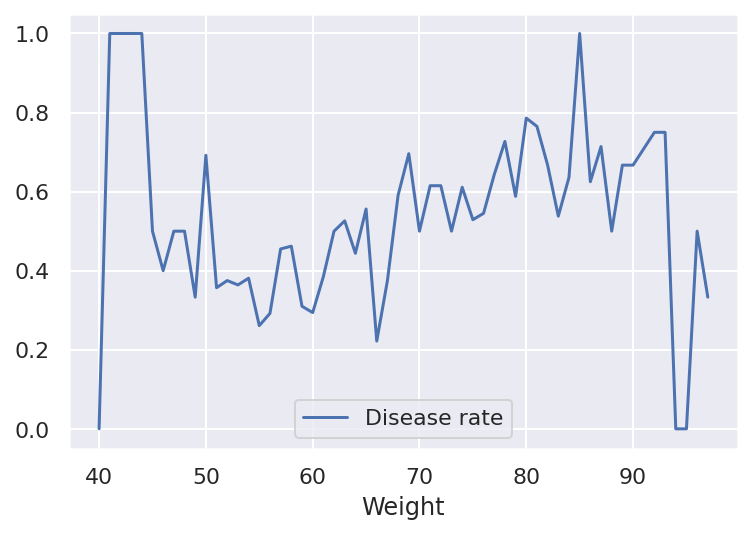

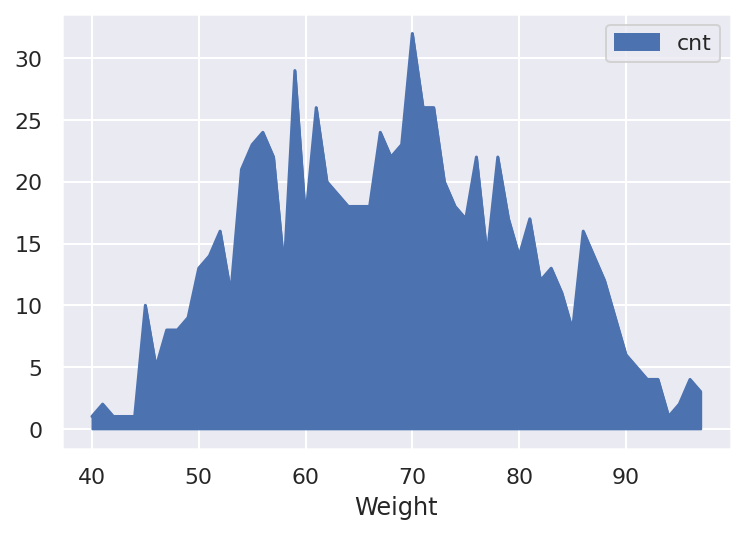

In [33]:
stat_sample(train_data,"Weight").plot(y='Disease rate', use_index=True)
stat_sample(train_data,"Weight").plot(y='cnt', use_index=True, kind = 'area')

train_data['Weight_bins'] = pd.cut(train_data['Weight'], list(np.linspace(30, 110, 17)))
stat_sample(train_data,"Weight_bins")

There is a quite nice positive correlation between weight and disease rate, weight can be used as is.

**3.13 Height**

In [34]:
train_data['Height_bins'] = pd.cut(train_data['Height'], list(np.linspace(150, 180, 7)))
stat_sample(train_data,"Height_bins")

cnt  sum Disease  Disease rate
Height_bins                                   
(150.0, 155.0]   78         55.0         0.705
(155.0, 160.0]   90         68.0         0.756
(160.0, 165.0]  114         45.0         0.395
(165.0, 170.0]  123         64.0         0.520
(170.0, 175.0]  264        124.0         0.470
(175.0, 180.0]  131         55.0         0.420

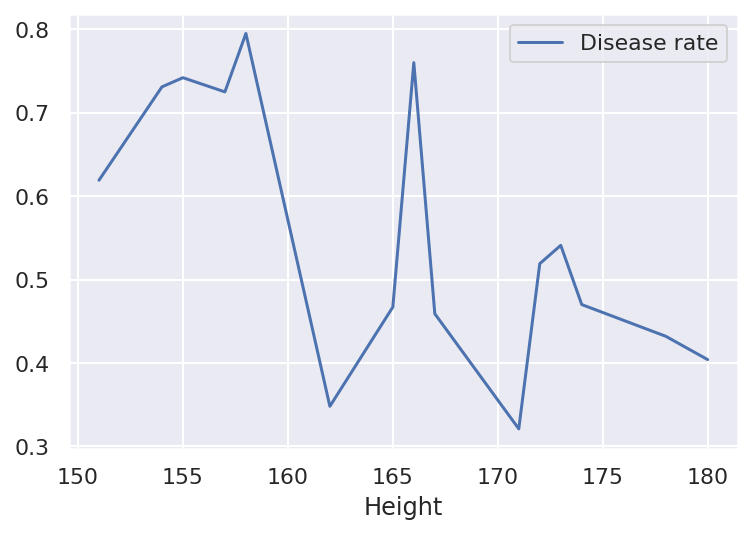

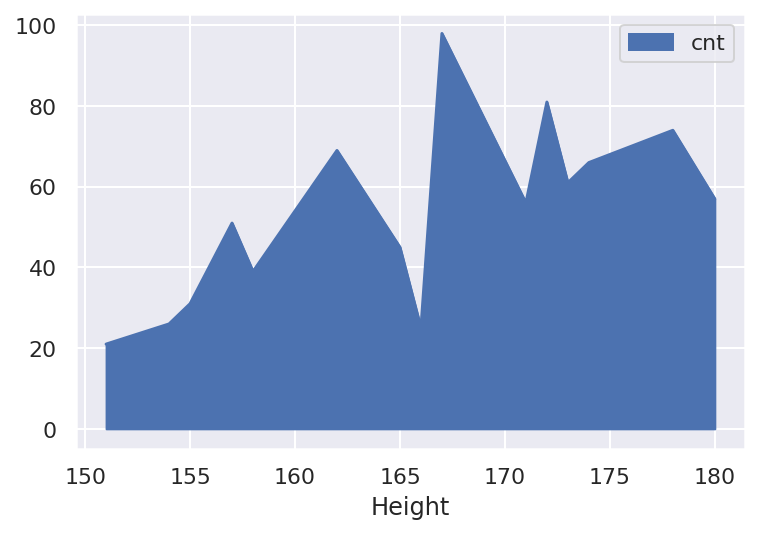

In [35]:
stat_sample(train_data,"Height").plot(y='Disease rate', use_index=True)
stat_sample(train_data,"Height").plot(y='cnt', use_index=True, kind = 'area')

There is a negative correlation between height and disease rate, however the dependency is quite volatile. The easiest way to quantify this is to create a dummy variable here "Height<160"

**3.14 BMI**

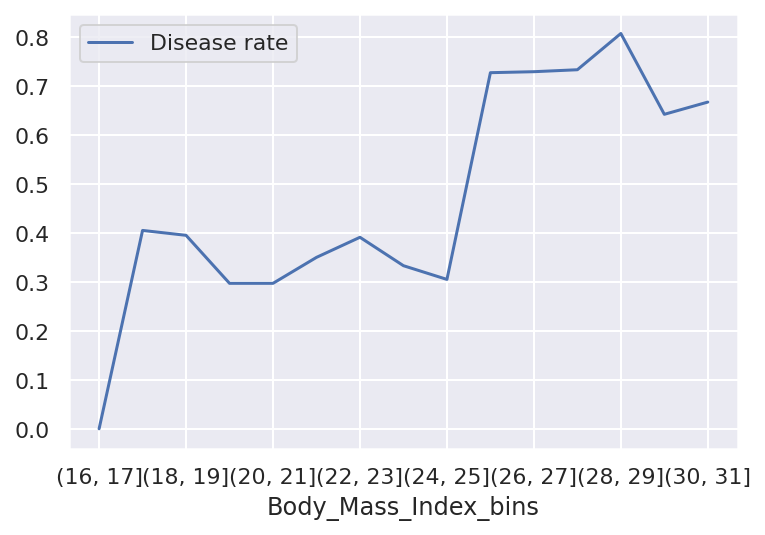

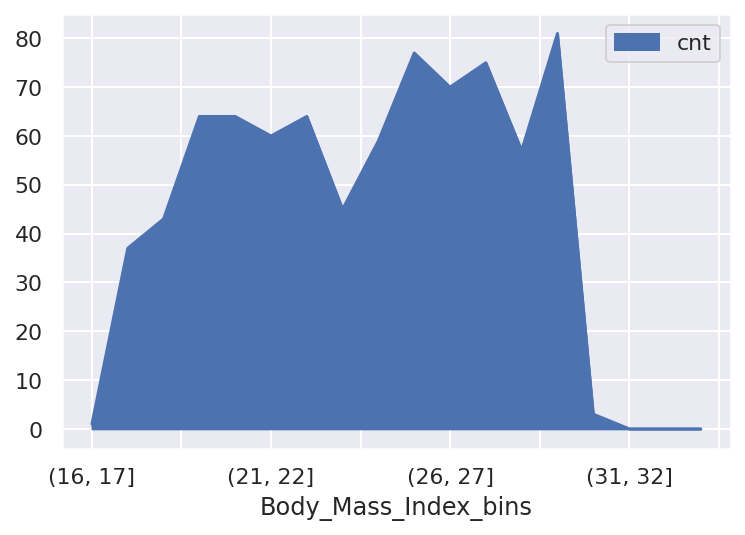

In [36]:
# Creating a variable BMI
train_data["Body_Mass_Index"] = train_data["Weight"]/(train_data["Height"]/100)**2
test_data["Body_Mass_Index"] = test_data["Weight"]/(test_data["Height"]/100)**2

train_data['Body_Mass_Index_bins'] = pd.cut(train_data['Body_Mass_Index'], list(range(16, 35)))

stat_sample(train_data,"Body_Mass_Index_bins").plot(y='Disease rate', use_index=True)
stat_sample(train_data,"Body_Mass_Index_bins").plot(y='cnt', use_index=True, kind = 'area')

We can just transform BMI into one binary variable (BMI>=25)

In [37]:
train_data["High_BMI"] = np.where(train_data["Body_Mass_Index"]>=25, 1, 0)
test_data["High_BMI"] = np.where(test_data["Body_Mass_Index"]>=25, 1, 0)

stat_sample(train_data,["High_BMI", "Height"]).sort_values("Disease rate").unstack()


cnt                                                        ...  \
Height   151.0 154.0 155.0 157.0 158.0 162.0 165.0 166.0 167.0 171.0  ...   
High_BMI                                                              ...   
0           13    14    18    28    20    32    21    11    57    36  ...   
1            8    12    13    23    19    37    24    14    41    20  ...   

         Disease rate                                                          \
Height          162.0  165.0  166.0  167.0  171.0  172.0  173.0  174.0  178.0   
High_BMI                                                                        
0               0.156  0.143  0.455  0.281  0.222  0.408  0.324  0.235  0.211   
1               0.514  0.750  1.000  0.707  0.500  0.688  0.815  0.719  0.667   

                 
Height    180.0  
High_BMI         
0         0.323  
1         0.500  

[2 rows x 45 columns]

**3.15 Mental Health**

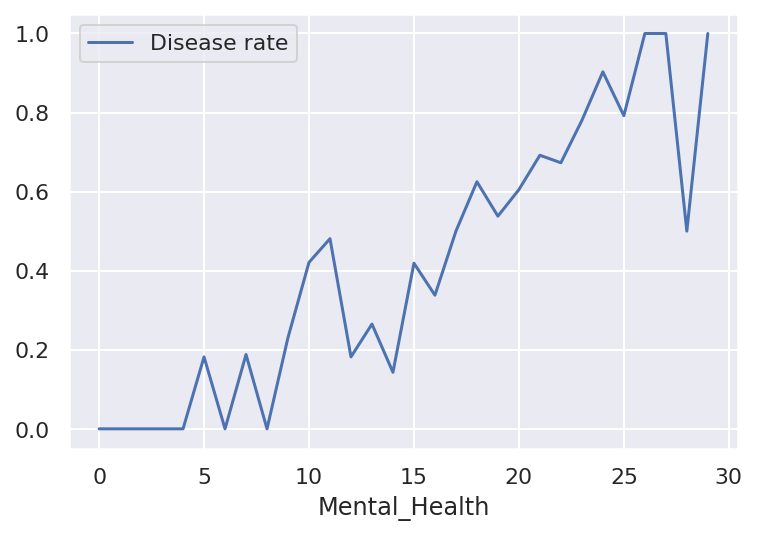

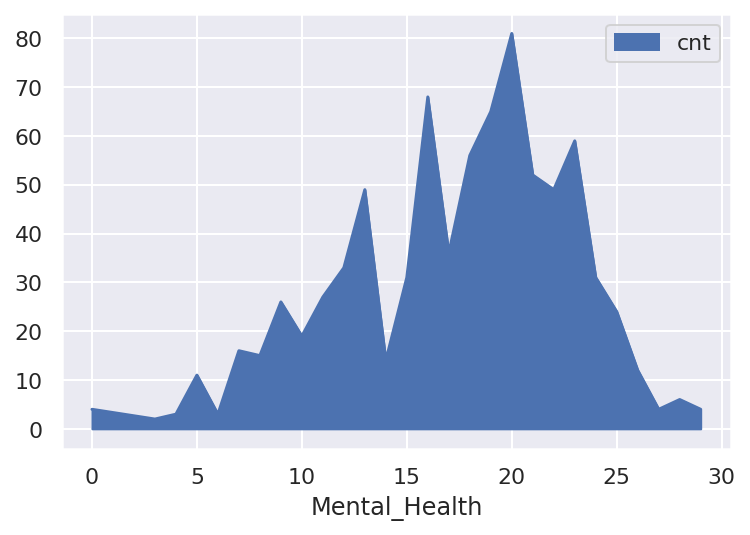

In [38]:
stat_sample(train_data,"Mental_Health").plot(y='Disease rate', use_index=True)
stat_sample(train_data,"Mental_Health").plot(y='cnt', use_index=True, kind = 'area')

Highly correlated variable, can be used as it is with no binning, as the dependency is perfectly linear

**3.16 Physical Health**

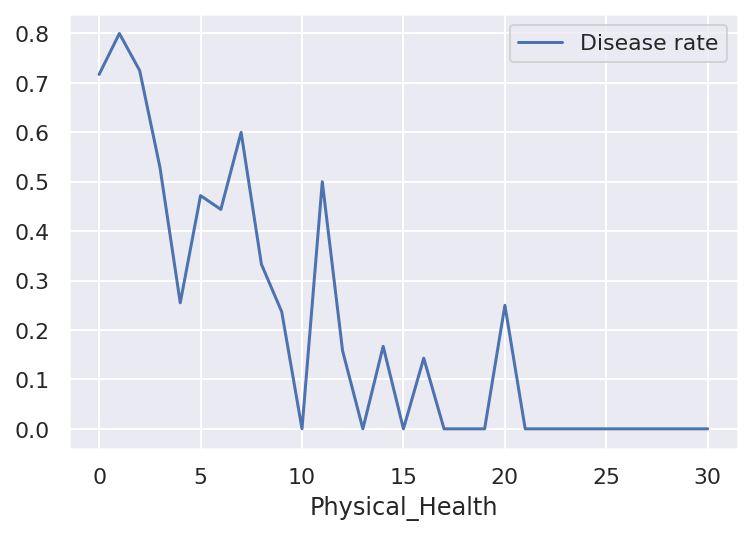

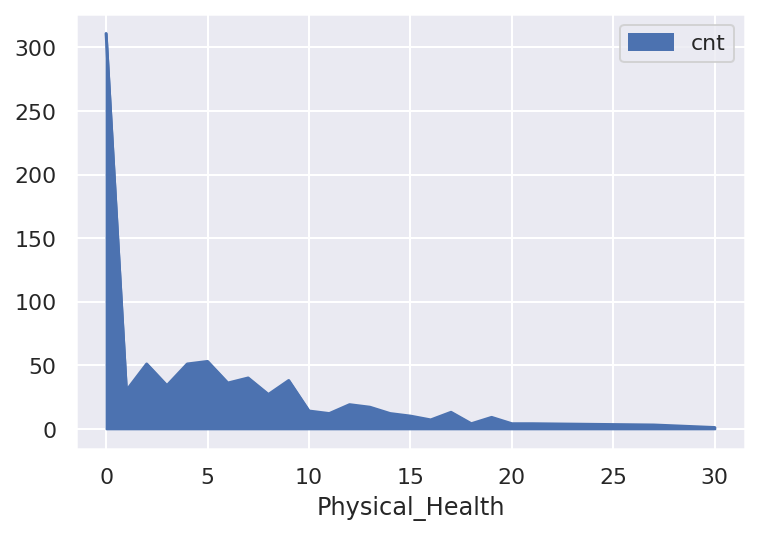

In [39]:
stat_sample(train_data,"Physical_Health").plot(y='Disease rate', use_index=True)
stat_sample(train_data,"Physical_Health").plot(y='cnt', use_index=True, kind = 'area')

In [40]:
stat_sample(train_data,"Physical_Health")

cnt  sum Disease  Disease rate
Physical_Health                                
0.0              311        223.0         0.717
1.0               30         24.0         0.800
2.0               51         37.0         0.725
3.0               34         18.0         0.529
4.0               51         13.0         0.255
5.0               53         25.0         0.472
6.0               36         16.0         0.444
7.0               40         24.0         0.600
8.0               27          9.0         0.333
9.0               38          9.0         0.237
10.0              14          0.0         0.000
11.0              12          6.0         0.500
12.0              19          3.0         0.158
13.0              17          0.0         0.000
14.0              12          2.0         0.167
15.0              10          0.0         0.000
16.0               7          1.0         0.143
17.0              13          0.0         0.000
18.0               4          0.0         0.000
19.0               9          0.0         0.000
20.0               4          1.0         0.250
21.0               4          0.0         0.000
27.0               3          0.0         0.000
30.0               1          0.0         0.000

In [41]:
def physical_health_grouping(p):
    if p<3: 
        return "Very Bad"
    elif p<8: 
        return "Average"
    elif p<12: 
        return "Good"
    elif p>=12: 
        return "Very Good"

train_data["Physical_Health_grouped"] = train_data["Physical_Health"].map(physical_health_grouping)
test_data["Physical_Health_grouped"] = test_data["Physical_Health"].map(physical_health_grouping)

stat_sample(train_data,"Physical_Health_grouped").sort_values("Disease rate")

cnt  sum Disease  Disease rate
Physical_Health_grouped                                
Very Good                103          7.0         0.068
Good                      91         24.0         0.264
Average                  214         96.0         0.449
Very Bad                 392        284.0         0.724

**3.17 Blood Pressure**

cnt  sum Disease  Disease rate
Blood_Pressure_bins                                
(90.0, 100.0]         16          9.0         0.562
(100.0, 110.0]        85         52.0         0.612
(110.0, 120.0]       165         93.0         0.564
(120.0, 130.0]       196        104.0         0.531
(130.0, 140.0]       178         95.0         0.534
(140.0, 150.0]        82         34.0         0.415
(150.0, 160.0]        40         18.0         0.450
(160.0, 170.0]        19          2.0         0.105
(170.0, 180.0]        13          4.0         0.308
(180.0, 190.0]         0          0.0           NaN
(190.0, 200.0]         6          0.0         0.000

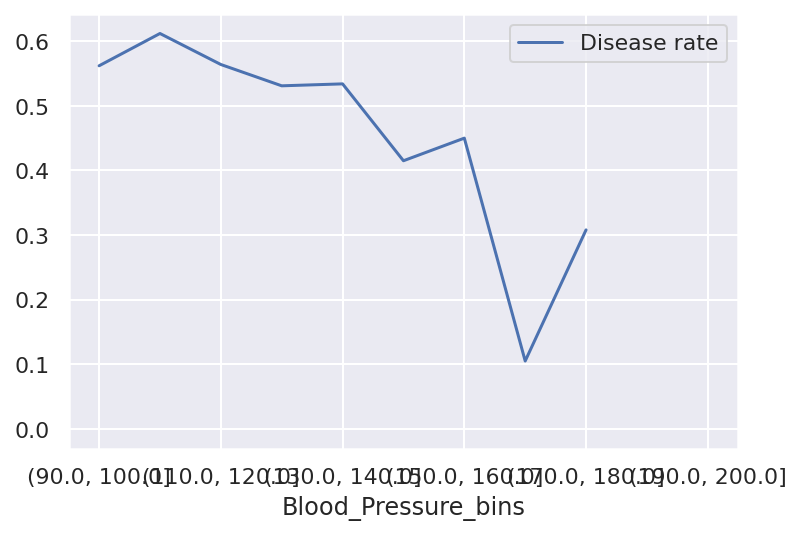

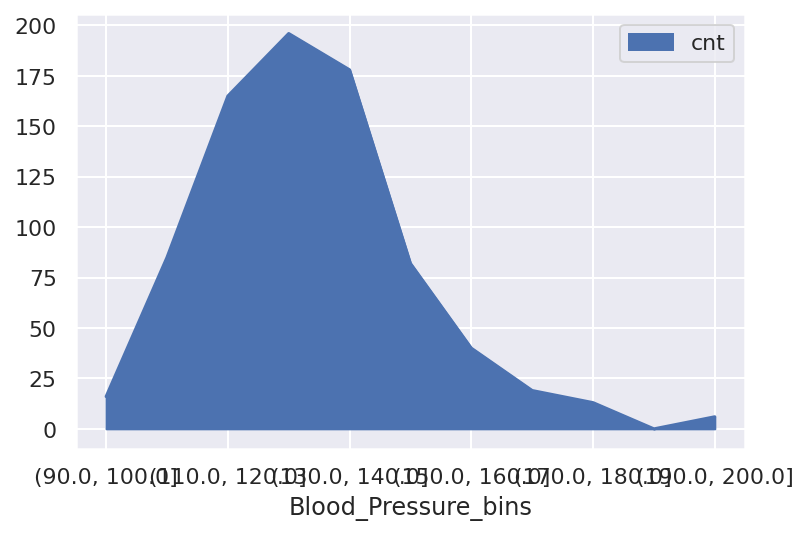

In [42]:
train_data['Blood_Pressure_bins'] = pd.cut(train_data['Blood_Pressure'], list(np.linspace(90, 200, 12)))

stat_sample(train_data,"Blood_Pressure_bins").plot(y='Disease rate', use_index=True)
stat_sample(train_data,"Blood_Pressure_bins").plot(y='cnt', use_index=True, kind = 'area')

stat_sample(train_data,"Blood_Pressure_bins")

Blood pressure is correlated with Disease rate. Can be used as is.

Dependency is suspicious though. How patients with high blood pressure may have lower chances of a disease?

**3.18 Cholesterol**

cnt  sum Disease  Disease rate
High_Cholesterol_bins                                
(130.0, 150.0]           5          3.0         0.600
(150.0, 170.0]          18         10.0         0.556
(170.0, 190.0]          53         28.0         0.528
(190.0, 210.0]         105         57.0         0.543
(210.0, 230.0]         122         81.0         0.664
(230.0, 250.0]         138         70.0         0.507
(250.0, 270.0]         107         54.0         0.505
(270.0, 290.0]          96         34.0         0.354
(290.0, 310.0]          69         33.0         0.478
(310.0, 330.0]          46         22.0         0.478
(330.0, 350.0]          21          6.0         0.286

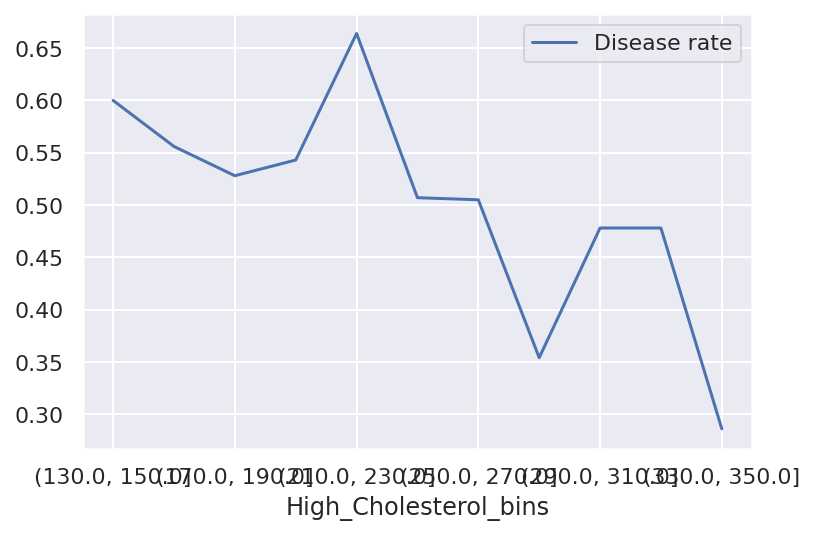

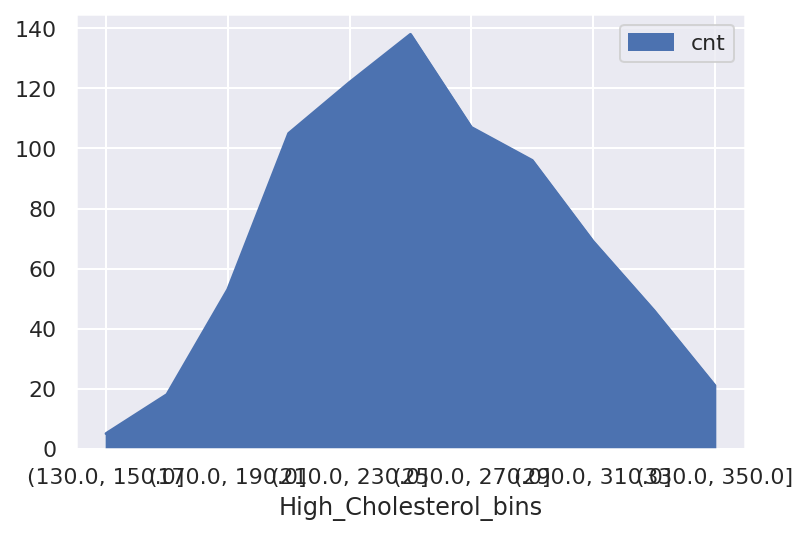

In [43]:
# Firstly, dropping 3 observations with outliers in High_Cholesterol according to the findings in the summary at the beginning

train_data.drop(train_data.index[(train_data["High_Cholesterol"] > 500)], axis=0, inplace=True)



train_data['High_Cholesterol_bins'] = pd.cut(train_data['High_Cholesterol'], list(np.linspace(130, 350, 12)))

stat_sample(train_data,"High_Cholesterol_bins").plot(y='Disease rate', use_index=True)
stat_sample(train_data,"High_Cholesterol_bins").plot(y='cnt', use_index=True, kind = 'area')

stat_sample(train_data,"High_Cholesterol_bins")

Cholesterol level is correlated with Disease rate. Can be used as is. 

Dependency is suspicious though. How patients with high cholesterol may have lower chances of a disease?

# 4. Data Cleansing

In [44]:
#Dropping the redundant variables after data exploration and transformation

#We have Region_group instead
train_data = train_data.drop(["Region"], axis=1)
test_data = test_data.drop(["Region"], axis=1)

#We have Education_group instead
train_data = train_data.drop(["Education"], axis=1)
test_data = test_data.drop(["Education"], axis=1)

#We have High_BMI instead
train_data = train_data.drop(["Body_Mass_Index"], axis=1)
test_data = test_data.drop(["Body_Mass_Index"], axis=1)

#We have Fruit_Habit_grouped instead
train_data = train_data.drop(["Fruit_Habit"], axis=1)
test_data = test_data.drop(["Fruit_Habit"], axis=1)

#We have Physical_Health_grouped instead
train_data = train_data.drop(["Physical_Health"], axis=1)
test_data = test_data.drop(["Physical_Health"], axis=1)

#We have Water_Enough instead
train_data = train_data.drop(["Water_Habit"], axis=1)
test_data = test_data.drop(["Water_Habit"], axis=1)

#We have Smoking instead
train_data = train_data.drop(["Smoking_Habit"], axis=1)
test_data = test_data.drop(["Smoking_Habit"], axis=1)

#We have Drinking instead
train_data = train_data.drop(["Drinking_Habit"], axis=1)
test_data = test_data.drop(["Drinking_Habit"], axis=1)

#We have Checkup_more_than_3_years instead
train_data = train_data.drop(["Checkup"], axis=1)
test_data = test_data.drop(["Checkup"], axis=1)

#Deleting auxiliary variables from train (we didn't create them on test)
train_data = train_data.drop(["Body_Mass_Index_bins"], axis=1)
train_data = train_data.drop(["Weight_bins"], axis=1)
train_data = train_data.drop(["Height_bins"], axis=1)
train_data = train_data.drop(["Blood_Pressure_bins"], axis=1)
train_data = train_data.drop(["High_Cholesterol_bins"], axis=1)

In [45]:
train_data.info()
train_data.describe().T

<class 'pandas.core.frame.DataFrame'>
Float64Index: 797 entries, 1167.0 to 1117.0
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Birth_Year                 797 non-null    float64
 1   Disease                    797 non-null    float64
 2   Height                     797 non-null    float64
 3   Weight                     797 non-null    float64
 4   High_Cholesterol           797 non-null    float64
 5   Blood_Pressure             797 non-null    float64
 6   Mental_Health              797 non-null    float64
 7   Diabetes                   797 non-null    object 
 8   Exercise                   797 non-null    int64  
 9   Gender                     797 non-null    int64  
 10  Region_bad                 797 non-null    int64  
 11  Education_grouped          797 non-null    object 
 12  Checkup_more_than_3_years  797 non-null    int64  
 13  Drinking                   797 non-null 

count         mean        std     min     25%  \
Birth_Year                 797.0  1967.590966   8.956249  1945.0  1961.0   
Disease                    797.0     0.511920   0.500172     0.0     0.0   
Height                     797.0   167.824341   7.968011   151.0   162.0   
Weight                     797.0    67.868256  12.107619    40.0    58.0   
High_Cholesterol           797.0   248.122961  47.801174   130.0   213.0   
Blood_Pressure             797.0   131.114178  17.056240    94.0   120.0   
Mental_Health              797.0    17.335006   5.392806     0.0    13.0   
Exercise                   797.0     0.331242   0.470956     0.0     0.0   
Gender                     797.0     0.707654   0.455126     0.0     0.0   
Region_bad                 797.0     0.706399   0.455697     0.0     0.0   
Checkup_more_than_3_years  797.0     0.538269   0.498846     0.0     0.0   
Drinking                   797.0     0.509410   0.500225     0.0     0.0   
Smoking                    797.0     0.159348   0.366230     0.0     0.0   
Water_Enough               797.0     0.454203   0.498211     0.0     0.0   
High_BMI                   797.0     0.456713   0.498435     0.0     0.0   

                              50%     75%     max  
Birth_Year                 1966.0  1974.0  1993.0  
Disease                       1.0     1.0     1.0  
Height                      167.0   173.0   180.0  
Weight                       68.0    77.0    97.0  
High_Cholesterol            244.0   279.0   421.0  
Blood_Pressure              130.0   140.0   200.0  
Mental_Health                18.0    21.0    29.0  
Exercise                      0.0     1.0     1.0  
Gender                        1.0     1.0     1.0  
Region_bad                    1.0     1.0     1.0  
Checkup_more_than_3_years     1.0     1.0     1.0  
Drinking                      1.0     1.0     1.0  
Smoking                       0.0     0.0     1.0  
Water_Enough                  0.0     1.0     1.0  
High_BMI                      0.0     1.0     1.0

In [46]:
continuousVar = ["Birth_Year", "Height", "Weight", "High_Cholesterol", "Blood_Pressure", "Mental_Health"] 

def scaleTransform(measure):
  scaler = MinMaxScaler()
  fitting_data = np.array(train_data[measure]).reshape(-1,1)
  scaler.fit(fitting_data)
  train_data[measure] = scaler.transform(fitting_data)
  test_data[measure] = scaler.transform(np.array(test_data[measure]).reshape(-1,1))

for i, measure in enumerate(continuousVar):
  scaleTransform(measure)

In [47]:
# Create dummy variables for categorical variables
cat_train_data = train_data[train_data.columns[train_data.columns.isin([
                                                                        "Education_grouped", 
                                                                        "Diabetes", 
                                                                        "Physical_Health_grouped", 
                                                                        "Fruit_Habit_grouped"])]]
dummy_table = pd.get_dummies(cat_train_data)

# Replace binary columns with encoded columns 
train_data = pd.merge(train_data[train_data.columns[~train_data.columns.isin([
                                                                              "Education_grouped", 
                                                                              "Diabetes", 
                                                                              "Physical_Health_grouped", 
                                                                              "Fruit_Habit_grouped"])]], 
                      dummy_table, 
                      on="PatientID")

train_data

Birth_Year  Disease    Height    Weight  High_Cholesterol  \
PatientID                                                              
1167.0       0.416667      1.0  0.137931  0.473684          0.783505   
1805.0       0.500000      1.0  0.758621  0.842105          0.343643   
1557.0       0.604167      1.0  0.379310  0.491228          0.329897   
1658.0       0.270833      0.0  1.000000  0.456140          0.628866   
1544.0       0.479167      1.0  1.000000  0.315789          0.505155   
...               ...      ...       ...       ...               ...   
1909.0       0.562500      0.0  0.931034  0.368421          0.254296   
1386.0       0.729167      1.0  0.206897  0.368421          0.285223   
1088.0       0.312500      0.0  0.551724  0.140351          0.487973   
1662.0       0.625000      1.0  0.482759  0.614035          0.268041   
1117.0       0.708333      0.0  0.758621  0.526316          0.175258   

           Blood_Pressure  Mental_Health  Exercise  Gender  Region_bad  ...  \
PatientID                                                               ...   
1167.0           0.245283       0.724138         1       0           1  ...   
1805.0           0.452830       0.310345         1       1           1  ...   
1557.0           0.264151       0.896552         0       1           1  ...   
1658.0           0.292453       0.448276         1       1           1  ...   
1544.0           0.292453       0.620690         0       1           1  ...   
...                   ...            ...       ...     ...         ...  ...   
1909.0           0.471698       0.413793         1       1           0  ...   
1386.0           0.245283       0.793103         0       0           0  ...   
1088.0           0.433962       0.689655         0       0           0  ...   
1662.0           0.169811       0.551724         0       1           1  ...   
1117.0           0.245283       0.379310         1       1           1  ...   

           Education_grouped_Bad  Education_grouped_Good  \
PatientID                                                  
1167.0                         0                       1   
1805.0                         0                       1   
1557.0                         1                       0   
1658.0                         0                       0   
1544.0                         1                       0   
...                          ...                     ...   
1909.0                         0                       1   
1386.0                         1                       0   
1088.0                         1                       0   
1662.0                         1                       0   
1117.0                         1                       0   

           Education_grouped_Medium  Fruit_Habit_grouped_Bad  \
PatientID                                                      
1167.0                            0                        1   
1805.0                            0                        1   
1557.0                            0                        1   
1658.0                            1                        1   
1544.0                            0                        0   
...                             ...                      ...   
1909.0                            0                        1   
1386.0                            0                        1   
1088.0                            0                        0   
1662.0                            0                        1   
1117.0                            0                        1   

           Fruit_Habit_grouped_Good  Fruit_Habit_grouped_Medium  \
PatientID                                                         
1167.0                            0                           0   
1805.0                            0                           0   
1557.0                            0                           0   
1658.0                            0                           0   
1544.0                        

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 797 entries, 1167.0 to 1117.0
Data columns (total 29 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Birth_Year                                                                           797 non-null    float64
 1   Disease                                                                              797 non-null    float64
 2   Height                                                                               797 non-null    float64
 3   Weight                                                                               797 non-null    float64
 4   High_Cholesterol                                                                     797 non-null    float64
 5   Blood_Pressure                                                                    

In [49]:
# Repeat steps for testing dataset

cat_test_data = test_data[test_data.columns[test_data.columns.isin([
                                                                        "Education_grouped", 
                                                                        "Diabetes", 
                                                                        "Physical_Health_grouped", 
                                                                        "Fruit_Habit_grouped"])]]
dummy_table = pd.get_dummies(cat_test_data)

# Replace binary columns with encoded columns 
test_data = pd.merge(test_data[test_data.columns[~test_data.columns.isin([ 
                                                                              "Education_grouped", 
                                                                              "Diabetes", 
                                                                              "Physical_Health_grouped", 
                                                                              "Fruit_Habit_grouped"])]], 
                      dummy_table, 
                      on="PatientID")

test_data

Birth_Year    Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                                     
1343.0       0.520833  0.724138  0.701754          0.250859        0.735849   
1727.0       0.437500  0.689655  0.701754          0.326460        0.339623   
1828.0       0.687500  0.689655  0.666667          0.367698        0.339623   
1155.0       0.479167  0.793103  0.824561          0.628866        0.132075   
1020.0       0.354167  0.724138  0.280702          0.202749        0.433962   
...               ...       ...       ...               ...             ...   
1000.0       0.520833  0.931034  0.859649          0.295533        0.292453   
1256.0       0.875000  0.103448  0.403509          0.195876        0.415094   
1318.0       0.375000  0.758621  0.877193          0.175258        0.433962   
1953.0       0.666667  0.137931  0.087719          0.378007        0.415094   
1757.0       0.229167  0.931034  0.894737          0.350515        0.622642   

           Mental_Health  Exercise  Gender  Region_bad  \
PatientID                                                
1343.0          0.689655         0       1           0   
1727.0          0.724138         0       1           1   
1828.0          0.827586         1       1           1   
1155.0          0.655172         0       1           1   
1020.0          0.655172         0       1           0   
...                  ...       ...     ...         ...   
1000.0          0.758621         0       1           0   
1256.0          0.862069         0       0           1   
1318.0          0.689655         1       1           0   
1953.0          0.620690         1       0           0   
1757.0          0.517241         0       1           1   

           Checkup_more_than_3_years  ...  Education_grouped_Bad  \
PatientID                             ...                          
1343.0                             0  ...                      1   
1727.0                             0  ...                      0   
1828.0                             1  ...                      0   
1155.0                             0  ...                      0   
1020.0                             1  ...                      0   
...                              ...  ...                    ...   
1000.0                             0  ...                      1   
1256.0                             1  ...                      0   
1318.0                             0  ...                      0   
1953.0                             1  ...                      0   
1757.0                             0  ...                      0   

           Education_grouped_Good  Education_grouped_Medium  \
PatientID                                                     
1343.0                          0                         0   
1727.0                          0                         1   
1828.0                          1                         0   
1155.0                          1                         0   
1020.0                          1                         0   
...                           ...                       ...   
1000.0                          0                         0   
1256.0                          0                         1   
1318.0                          1                         0   
1953.0                          1                         0   
1757.0                          0                         1   

           Fruit_Habit_grouped_Bad  Fruit_Habit_grouped_Good  \
PatientID                                                      
1343.0                           1                         0   
1727.0                           1                         0   
1828.0                           1                         0   
1155.0                           1                         0   
1020.0                           1                         0   
...                            ...                       ...   
1000.0     

In [50]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 225 entries, 1343.0 to 1757.0
Data columns (total 28 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Birth_Year                                                                           225 non-null    float64
 1   Height                                                                               225 non-null    float64
 2   Weight                                                                               225 non-null    float64
 3   High_Cholesterol                                                                     225 non-null    float64
 4   Blood_Pressure                                                                       225 non-null    float64
 5   Mental_Health                                                                     

In [51]:
#Deleting dummy variables which are not needed (in order to get n-1 dummies for variables with n groups)

train_data = train_data.drop(["Education_grouped_Medium"], axis=1)
test_data = test_data.drop(["Education_grouped_Medium"], axis=1)

train_data = train_data.drop(["Fruit_Habit_grouped_Medium"], axis=1)
test_data = test_data.drop(["Fruit_Habit_grouped_Medium"], axis=1)

train_data = train_data.drop(["Physical_Health_grouped_Average"], axis=1)
test_data = test_data.drop(["Physical_Health_grouped_Average"], axis=1)

train_data = train_data.drop(["Diabetes_I do have diabetes"], axis=1)
test_data = test_data.drop(["Diabetes_I do have diabetes"], axis=1)

In [52]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 797 entries, 1167.0 to 1117.0
Data columns (total 25 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Birth_Year                                                                           797 non-null    float64
 1   Disease                                                                              797 non-null    float64
 2   Height                                                                               797 non-null    float64
 3   Weight                                                                               797 non-null    float64
 4   High_Cholesterol                                                                     797 non-null    float64
 5   Blood_Pressure                                                                    

In [53]:
ds_all_feat_train = train_data.copy()
ds_all_feat_test = test_data.copy()

# 5. Train/Validation Split

In [54]:
# Split data in independent (x) and dependent (y) sets
x_train_all = train_data.drop("Disease", axis=1)
y_train_all = train_data["Disease"]
x_test = test_data

x_train, x_val, y_train, y_val = train_test_split(x_train_all, 
                                                    y_train_all, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                   )

x_val_before_fs = x_val.copy()

# 6. Feature Selection

In [55]:
# Check if variables have variance equal to 0 -> None found
for i in x_train.var():
  if (i==0):
    print(i)

<ipython-input-56-a156dc32957b>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(x_train.corr(), dtype=np.bool))


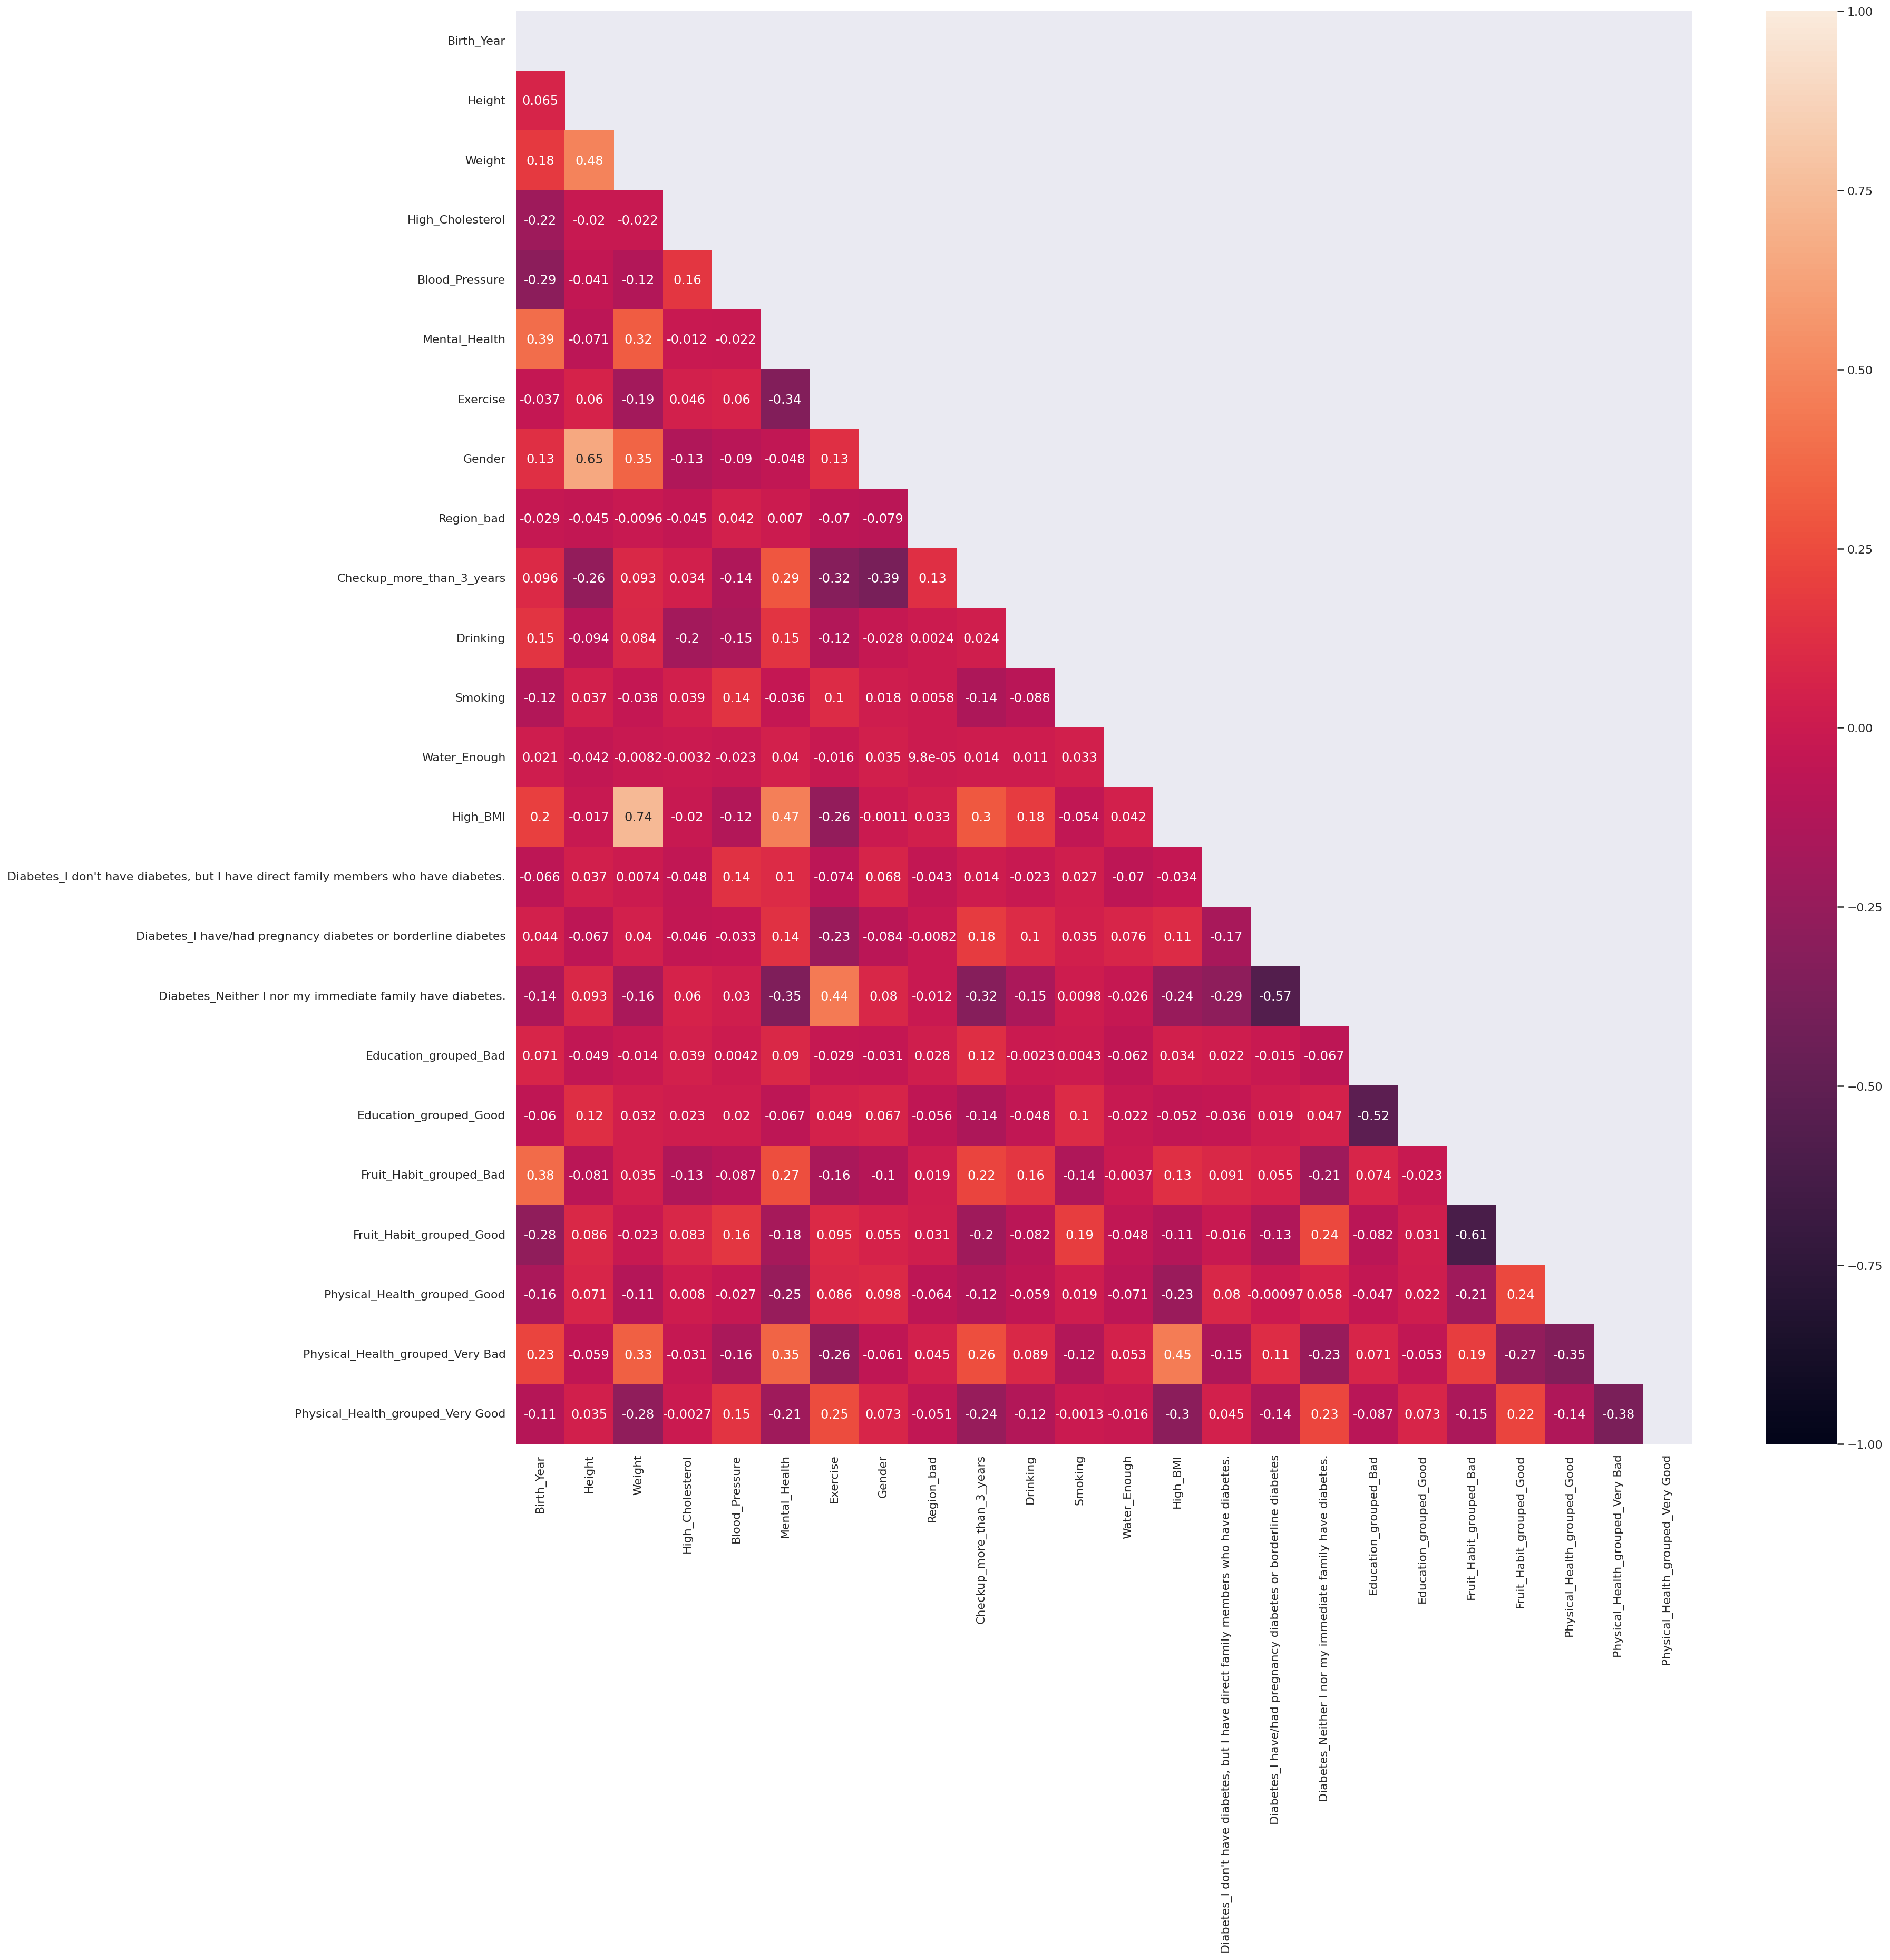

In [56]:
# Spearman correlation map
corr = x_train.corr(method = 'spearman')

plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(x_train.corr(), dtype=np.bool))
sns.heatmap(corr, annot = True, mask=mask, vmin=-1, vmax=1)

plt.show()

Findings
Strong correlations:
* Height and Weight
* Height and Gender
* Height and BMI
* Weight and BMI
* BMI and mental health
* No diabetes and exercize
* No diabetes and pregnancy diabetes
* Good/bad education
* Good/bad fruit habit
* Bad physical health and BMI

-> This was to be expected, but BMI, height, weight and gender are strongly interrelated. We need to discuss how to move forward.
-> Should we drop a different variable than medium education/fruit habit?

In [57]:
# Check individual spearman correlation with disease to see which variable to include (correlations could look veeery different in case of multiple regression though!)
spearman_res = pd.DataFrame(columns=['Variable', 'Coefficient', 'p'])

for i in range(len(x_train.columns)):
  coef, p = spearmanr(y_train, x_train.iloc[:,i])
  spearman_res = spearman_res.append({'Variable' : x_train.columns[i], 'Coefficient' : coef, 'p' : p}, ignore_index = True)

spearman_res["Include"] = np.where(spearman_res['p']< 0.1, 1, 0)
spearman_res

Variable  Coefficient  \
0                                          Birth_Year     0.214462   
1                                              Height    -0.180224   
2                                              Weight     0.164608   
3                                    High_Cholesterol    -0.103748   
4                                      Blood_Pressure    -0.148737   
5                                       Mental_Health     0.402123   
6                                            Exercise    -0.416804   
7                                              Gender    -0.298541   
8                                          Region_bad     0.086004   
9                           Checkup_more_than_3_years     0.518389   
10                                           Drinking     0.227901   
11                                            Smoking    -0.106256   
12                                       Water_Enough     0.014442   
13                                           High_BMI     0.364615   
14  Diabetes_I don't have diabetes, but I have dir...     0.081096   
15  Diabetes_I have/had pregnancy diabetes or bord...     0.279763   
16  Diabetes_Neither I nor my immediate family hav...    -0.484658   
17                              Education_grouped_Bad     0.121532   
18                             Education_grouped_Good    -0.139841   
19                            Fruit_Habit_grouped_Bad     0.477783   
20                           Fruit_Habit_grouped_Good    -0.354943   
21                       Physical_Health_grouped_Good    -0.144169   
22                   Physical_Health_grouped_Very Bad     0.392194   
23                  Physical_Health_grouped_Very Good    -0.354115   

               p  Include  
0   4.606440e-08        1  
1   4.711409e-06        1  
2   2.981679e-05        1  
3   8.782130e-03        1  
4   1.648476e-04        1  
5   3.727419e-26        1  
6   3.666777e-28        1  
7   1.401294e-14        1  
8   2.997597e-02        1  
9   4.257563e-45        1  
10  5.977281e-09        1  
11  7.272172e-03        1  
12  7.160079e-01        0  
13  1.837194e-21        1  
14  4.074532e-02        1  
15  6.426021e-13        1  
16  7.842678e-39        1  
17  2.121230e-03        1  
18  4.002553e-04        1  
19  1.224515e-37        1  
20  2.387474e-20        1  
21  2.616153e-04        1  
22  7.469200e-25        1  
23  2.961736e-20        1

In [58]:
# Recursive Feature Selection with Logistic Regression

#no of features
nof_list=list(range(1,20))
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

for n in nof_list:
    model = LogisticRegression(max_iter=1000)
    rfe = RFE(model, n_features_to_select = n)
    X_train_rfe = rfe.fit_transform(x_train, y_train)
    X_val_rfe = rfe.transform(x_val)
    model.fit(X_train_rfe, y_train)
    
    score = model.score(X_val_rfe, y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.881250


In [59]:
rfe = RFE(estimator = model, n_features_to_select = 10)
X_rfe = rfe.fit_transform(X = x_train, y = y_train)
selected_features = pd.Series(rfe.support_, index = x_train.columns)
selected_features

Birth_Year                                                                             False
Height                                                                                 False
Weight                                                                                 False
High_Cholesterol                                                                        True
Blood_Pressure                                                                          True
Mental_Health                                                                           True
Exercise                                                                               False
Gender                                                                                  True
Region_bad                                                                             False
Checkup_more_than_3_years                                                               True
Drinking                                                              

In [60]:
chi_res = pd.DataFrame(columns=['Variable', 'p', "Include"])
var_cont = ["Birth_Year_transformed", "Height", "Weight", "High_Cholesterol", "Blood_Pressure", "Mental_Health"] # These continuous variables need to be excluded
cat_data = train_data[train_data.columns[~train_data.columns.isin(var_cont)]].iloc[1:]
var_cat = cat_data.columns[1:]

# Chi-square for categorical data (need to be adjusted to only include categorical data tho -> should be adjusted to fit the table from the spearman correlation)
def TestIndependence(X,y,var,alpha=0.05):    
    global chi_res    
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
        chi_res = chi_res.append({'Variable' : var, 'p' : p, 'Include': 1}, ignore_index = True)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
        chi_res = chi_res.append({'Variable' : var, 'p' : p, 'Include': 0}, ignore_index = True)

    print(result)

for var_cat in cat_data:
    TestIndependence(cat_data[var_cat],y_train, var_cat)

chi_res

Birth_Year is IMPORTANT for Prediction
Disease is IMPORTANT for Prediction
Exercise is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Region_bad is IMPORTANT for Prediction
Checkup_more_than_3_years is IMPORTANT for Prediction
Drinking is IMPORTANT for Prediction
Smoking is IMPORTANT for Prediction
Water_Enough is NOT an important predictor. (Discard Water_Enough from model)
High_BMI is IMPORTANT for Prediction
Diabetes_I don't have diabetes, but I have direct family members who have diabetes. is NOT an important predictor. (Discard Diabetes_I don't have diabetes, but I have direct family members who have diabetes. from model)
Diabetes_I have/had pregnancy diabetes or borderline diabetes is IMPORTANT for Prediction
Diabetes_Neither I nor my immediate family have diabetes. is IMPORTANT for Prediction
Education_grouped_Bad is IMPORTANT for Prediction
Education_grouped_Good is IMPORTANT for Prediction
Fruit_Habit_grouped_Bad is IMPORTANT for Prediction
Fruit_Habit_grouped_Goo

Variable              p Include
0                                          Birth_Year   3.246519e-07       1
1                                             Disease  1.836220e-139       1
2                                            Exercise   8.005830e-26       1
3                                              Gender   1.316324e-13       1
4                                          Region_bad   3.943776e-02       1
5                           Checkup_more_than_3_years   1.660159e-38       1
6                                            Drinking   1.713887e-08       1
7                                             Smoking   1.063925e-02       1
8                                        Water_Enough   8.072904e-01       0
9                                            High_BMI   9.957731e-20       1
10  Diabetes_I don't have diabetes, but I have dir...   5.607962e-02       0
11  Diabetes_I have/had pregnancy diabetes or bord...   2.692532e-12       1
12  Diabetes_Neither I nor my immediate family hav...   3.065925e-34       1
13                              Education_grouped_Bad   2.612405e-03       1
14                             Education_grouped_Good   4.613393e-04       1
15                            Fruit_Habit_grouped_Bad   6.352023e-33       1
16                           Fruit_Habit_grouped_Good   9.223544e-19       1
17                       Physical_Health_grouped_Good   4.652989e-04       1
18                   Physical_Health_grouped_Very Bad   1.270541e-22       1
19                  Physical_Health_grouped_Very Good   1.309846e-18       1

In [61]:
 #lasso regression
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [62]:
reg = LassoCV()
reg.fit(x_train, y_train)

LassoCV()

In [63]:
coef = pd.Series(reg.coef_, index = x_train.columns)
coef

Birth_Year                                                                            -0.143675
Height                                                                                 0.224338
Weight                                                                                -0.249528
High_Cholesterol                                                                      -0.128418
Blood_Pressure                                                                        -0.235660
Mental_Health                                                                          0.262688
Exercise                                                                              -0.089791
Gender                                                                                -0.212917
Region_bad                                                                             0.021911
Checkup_more_than_3_years                                                              0.190375
Drinking                                

In [64]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 23 variables and eliminated the other 1 variables


In [65]:
coef.sort_values()

Weight                                                                                -0.249528
Blood_Pressure                                                                        -0.235660
Gender                                                                                -0.212917
Diabetes_Neither I nor my immediate family have diabetes.                             -0.170308
Birth_Year                                                                            -0.143675
High_Cholesterol                                                                      -0.128418
Physical_Health_grouped_Very Good                                                     -0.115426
Exercise                                                                              -0.089791
Education_grouped_Good                                                                -0.062062
Fruit_Habit_grouped_Good                                                               0.000000
Water_Enough                            

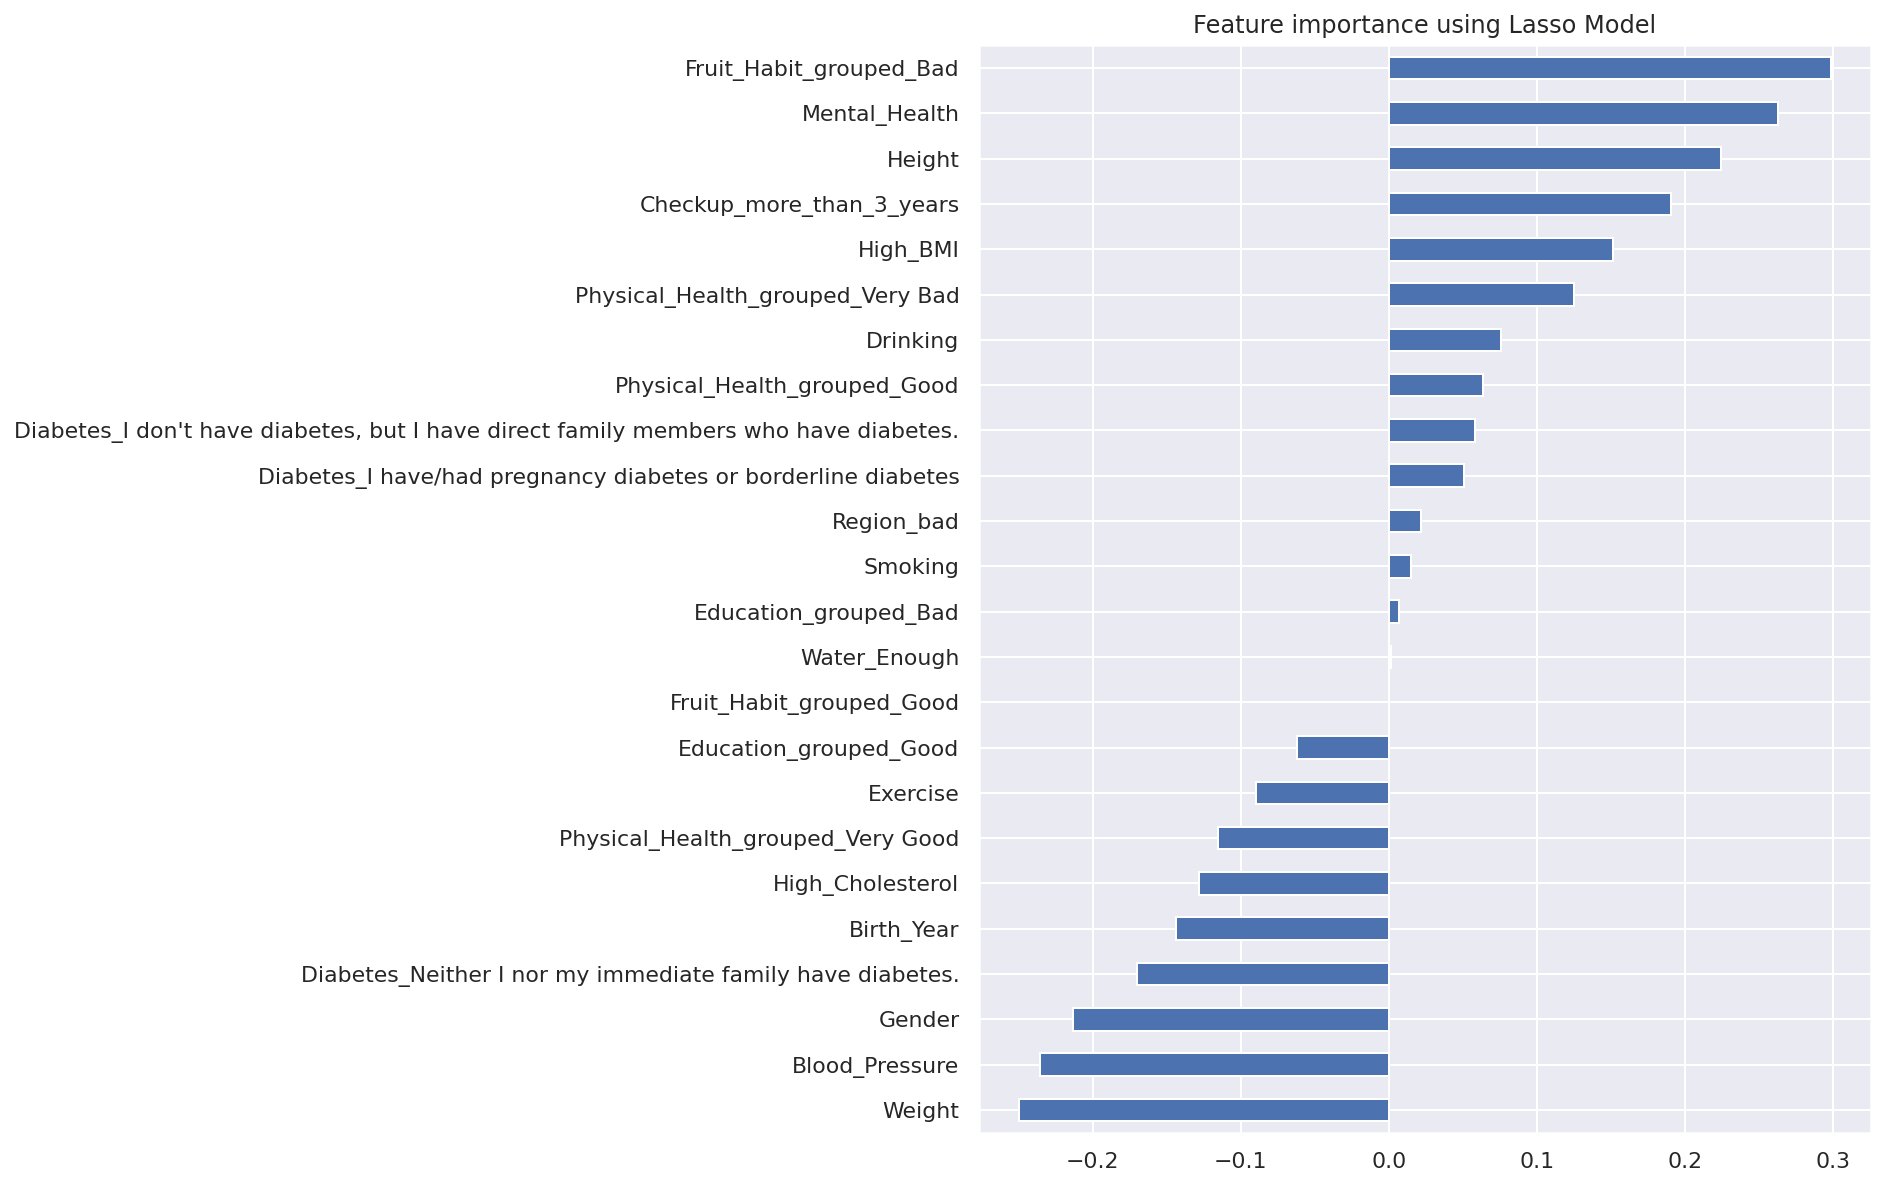

In [66]:
plot_importance(coef,'Lasso')

In [67]:
variable_eval = pd.DataFrame(columns=["Variable", "Spearman", "Logistic RFE"])
variable_eval["Variable"] = spearman_res["Variable"]
variable_eval["Spearman"] = spearman_res["Include"]
variable_eval["Logistic RFE"] = np.where(selected_features == True, 1, 0)
variable_eval = pd.merge(variable_eval, chi_res, how='left', on = 'Variable').drop(["p"], axis=1)
variable_eval.columns = variable_eval.columns.str.replace('Include', 'Chi-square')
variable_eval["Lasso"] = np.where(coef != 0, 1, 0)
variable_eval

Variable  Spearman  Logistic RFE  \
0                                          Birth_Year         1             0   
1                                              Height         1             0   
2                                              Weight         1             0   
3                                    High_Cholesterol         1             1   
4                                      Blood_Pressure         1             1   
5                                       Mental_Health         1             1   
6                                            Exercise         1             0   
7                                              Gender         1             1   
8                                          Region_bad         1             0   
9                           Checkup_more_than_3_years         1             1   
10                                           Drinking         1             1   
11                                            Smoking         1             0   
12                                       Water_Enough         0             0   
13                                           High_BMI         1             0   
14  Diabetes_I don't have diabetes, but I have dir...         1             0   
15  Diabetes_I have/had pregnancy diabetes or bord...         1             0   
16  Diabetes_Neither I nor my immediate family hav...         1             1   
17                              Education_grouped_Bad         1             0   
18                             Education_grouped_Good         1             0   
19                            Fruit_Habit_grouped_Bad         1             1   
20                           Fruit_Habit_grouped_Good         1             0   
21                       Physical_Health_grouped_Good         1             0   
22                   Physical_Health_grouped_Very Bad         1             1   
23                  Physical_Health_grouped_Very Good         1             1   

   Chi-square  Lasso  
0           1      1  
1         NaN      1  
2         NaN      1  
3         NaN      1  
4         NaN      1  
5         NaN      1  
6           1      1  
7           1      1  
8           1      1  
9           1      1  
10          1      1  
11          1      1  
12          0      1  
13          1      1  
14          0      1  
15          1      1  
16          1      1  
17          1      1  
18          1      1  
19          1      1  
20          1      0  
21          1      1  
22          1      1  
23          1      1

In [68]:
# Final dataset

x_train = x_train.drop(["Weight"], axis=1)
x_val = x_val.drop(["Weight"], axis=1)
x_test = x_test.drop(["Weight"], axis=1)

x_train = x_train.drop(["Education_grouped_Bad"], axis=1)
x_val = x_val.drop(["Education_grouped_Bad"], axis=1)
x_test = x_test.drop(["Education_grouped_Bad"], axis=1)

x_train = x_train.drop(["Water_Enough"], axis=1)
x_val = x_val.drop(["Water_Enough"], axis=1)
x_test = x_test.drop(["Water_Enough"], axis=1)

x_train = x_train.drop(["Diabetes_I don't have diabetes, but I have direct family members who have diabetes."], axis=1)
x_val = x_val.drop(["Diabetes_I don't have diabetes, but I have direct family members who have diabetes."], axis=1)
x_test = x_test.drop(["Diabetes_I don't have diabetes, but I have direct family members who have diabetes."], axis=1)

In [69]:
ds_selected_feat_train = x_train.append(x_val)
ds_selected_feat_test = x_test.copy()

# 7. Modeling & Assessment

In [70]:
#sc  = StandardScaler()

#x_train_scaled = pd.DataFrame(sc.fit_transform(x_train),  columns=x_train.columns, index=x_train.index)
#x_val_scaled = pd.DataFrame(sc.fit_transform(x_val), columns=x_val.columns, index=x_val.index)

#### 7.1 Decision Tree

In [71]:
# Random Search with Bagging
# 99% with {'oob_score': False, 'n_estimators': 120, 'max_samples': 0.9, 'max_features': 0.1, 'bootstrap_features': True, 'bootstrap': False, 'base_estimator__max_depth': 10, 'base_estimator__criterion': 'gini'}
rand_tree_grid = {
    'base_estimator__criterion': ['gini','entropy'],
    'base_estimator__max_depth': [5, 10, 50, 100, None],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'n_estimators': [2,10,20,50, 80,100, 120, 150, 175 ,200],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'oob_score': [True, False],
    }

rand_tree_cv = RandomizedSearchCV(BaggingClassifier(DecisionTreeClassifier()), rand_tree_grid, cv=10, scoring='f1', n_jobs=-1)
rand_tree_cv.fit(x_train, y_train)
print(rand_tree_cv.best_params_)

# Decision Tree (all variables)
bagdtree = rand_tree_cv.best_estimator_
## train_score = dtree.score(train_data.select_dtypes(exclude=['object']), y_train)

# Predict
y_pred_bagdtree = bagdtree.predict(x_val)
y_pred_bagdtree = pd.DataFrame(y_pred_bagdtree, index = y_val.index)

# Print score
print(bagdtree.score(x_val, y_val))

# Confusion Matrix
confusion_matrix(y_val, y_pred_bagdtree)

# F1 score
f1_score(y_val, y_pred_bagdtree)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 351, in _fit
    raise ValueError("Out of bag estimation only ava

{'oob_score': True, 'n_estimators': 175, 'max_samples': 1.0, 'max_features': 0.8, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__max_depth': 100, 'base_estimator__criterion': 'entropy'}
0.975


0.9743589743589743

In [72]:
tree_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[5, 10, 50, 100, None]
    }

tree_cv = GridSearchCV(DecisionTreeClassifier(), tree_grid, cv=10, scoring='f1')
tree_cv.fit(x_train, y_train)
grid_tree = tree_cv.cv_results_

In [73]:
tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [74]:
# 100% with {'criterion': 'gini', 'max_depth': 100}
# Decision Tree (all variables)
dtree = tree_cv.best_estimator_
## train_score = dtree.score(train_data.select_dtypes(exclude=['object']), y_train)

# Predict
y_pred_dtree = dtree.predict(x_val)
y_pred_dtree = pd.DataFrame(y_pred_dtree, index = y_val.index)

# Print score
print(dtree.score(x_val, y_val))

# Confusion Matrix
confusion_matrix(y_val, y_pred_dtree)

# F1 score
f1_score(y_val, y_pred_dtree)

0.98125


0.9806451612903226

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


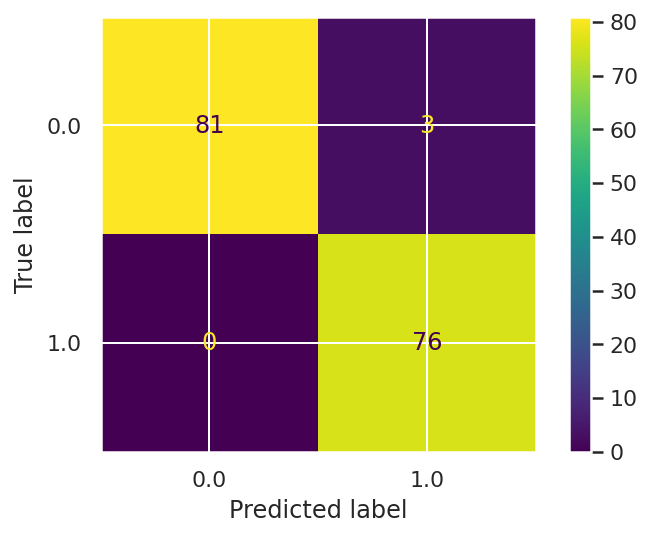

In [75]:
plot_confusion_matrix(dtree, x_val, y_val)
plt.show()

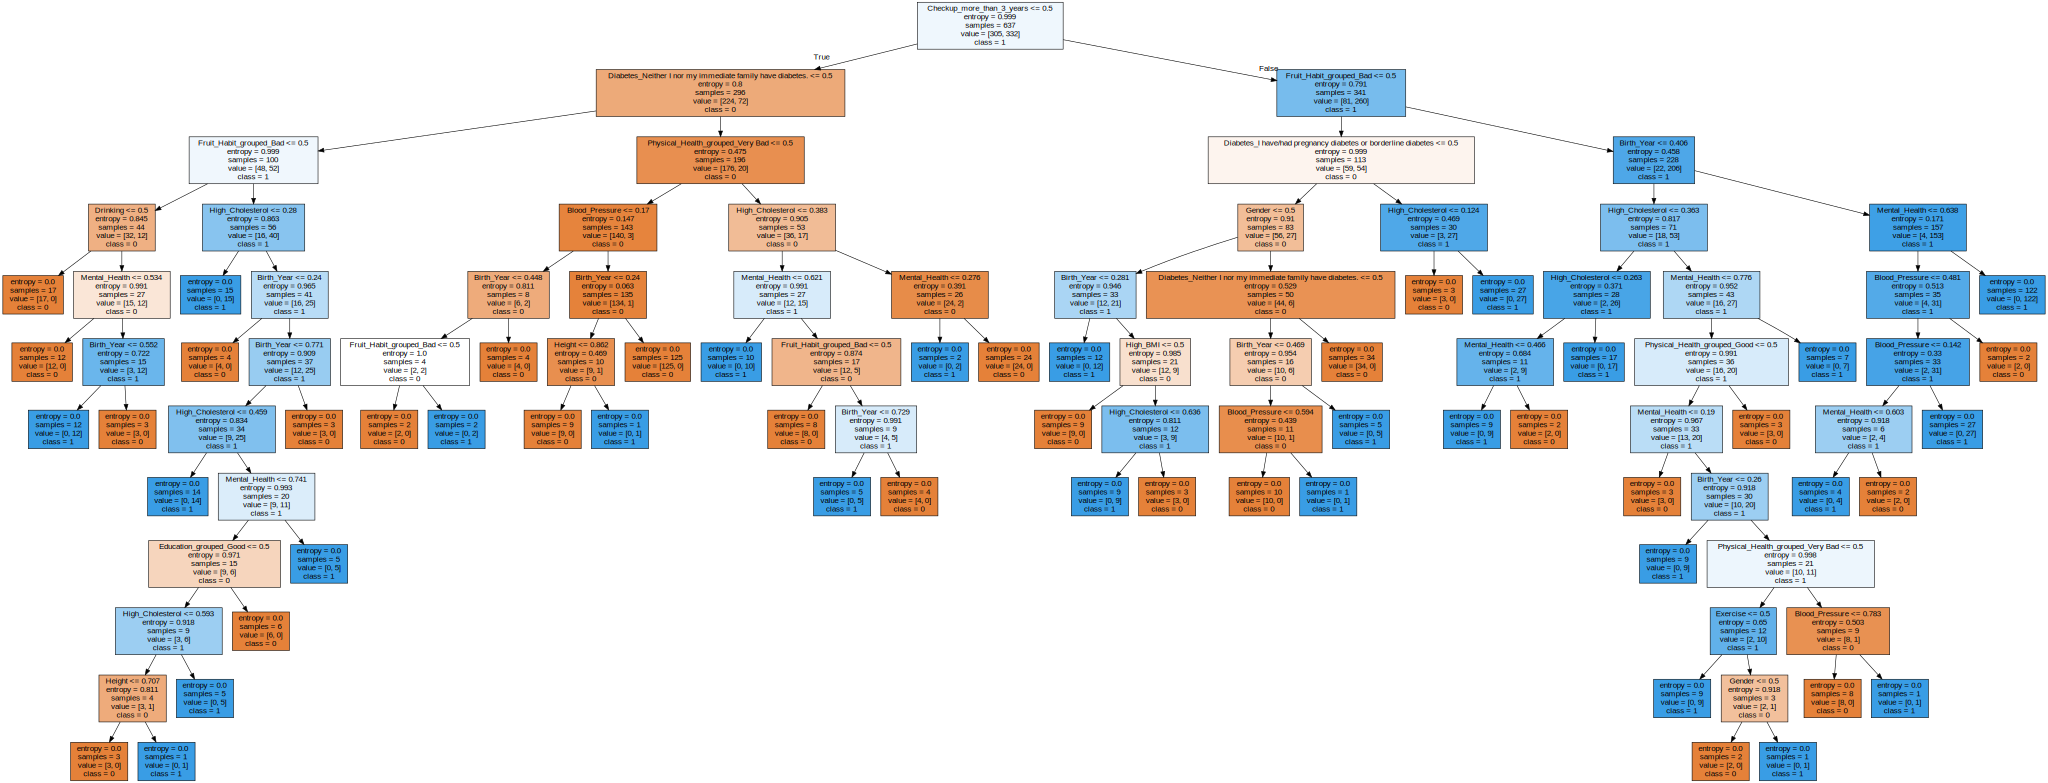

In [76]:
# tree ilustration for understanding process
# we can see, for example, from check up later than 3, old people, with diabetes, bad fruit habit and hightcolesterol are the first to be classifed


graph = Source(tree.export_graphviz(dtree, out_file=None
                                    , feature_names=x_train.columns, class_names=['0', '1'] 
                                    , filled = True))
display(SVG(graph.pipe(format='svg')))


#### 7.2 Gaussian NB

In [77]:
# Random Search with Bagging
rand_nb_grid = {
    'base_estimator__var_smoothing': np.logspace(0,-9, num=100),
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'n_estimators': [2,10,20,50, 80,100, 120, 150, 175 ,200],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'oob_score': [True, False],
    }

rand_nb_cv = RandomizedSearchCV(BaggingClassifier(GaussianNB()), rand_nb_grid, cv=10, scoring='f1')
rand_nb_cv.fit(x_train, y_train)
print(rand_nb_cv.best_params_)

# Decision Tree (all variables)
bagdnb = rand_nb_cv.best_estimator_
## train_score = dtree.score(train_data.select_dtypes(exclude=['object']), y_train)

# Predict
y_pred_bagdnb = bagdnb.predict(x_val)
y_pred_bagdnb = pd.DataFrame(y_pred_bagdnb, index = y_val.index)

# Print score
print(bagdnb.score(x_val, y_val))

# Confusion Matrix
confusion_matrix(y_val, y_pred_bagdnb)

# F1 score
f1_score(y_val, y_pred_bagdnb)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too 

{'oob_score': True, 'n_estimators': 50, 'max_samples': 0.1, 'max_features': 0.8, 'bootstrap_features': True, 'bootstrap': True, 'base_estimator__var_smoothing': 0.02310129700083159}
0.83125


0.8383233532934132

In [78]:
NB_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

GaussianNB_cv = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=NB_grid, 
                 verbose=1, 
                 scoring='f1') 
GaussianNB_cv.fit(x_train, y_train.values.ravel())

GaussianNB_cv.best_params_
grid_gnb = GaussianNB_cv.cv_results_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [79]:
# print the parameters chosen
GaussianNB_cv.best_params_

{'var_smoothing': 1.0}

In [80]:
# Gaussian Naive Bayes
modelNB = GaussianNB_cv.best_estimator_
modelNB.fit(X = x_train, y = y_train.values.ravel())

labels_train = modelNB.predict(x_train)
labels_val = modelNB.predict(x_val)

y_predNB = modelNB.predict_proba(x_val)
y_predNB = pd.DataFrame(y_predNB, index = y_val.index)

modelNB.score(x_train, y_train.values.ravel())
modelNB.score(x_val, y_val.values.ravel())

0.84375

In [81]:
y_pred_nb = y_predNB.iloc[:,1:2].copy()
y_pred_nb[y_pred_nb >= 0.5] = 1
y_pred_nb[y_pred_nb < 1] = 0

y_pred_nb

1
PatientID     
1136.0     1.0
1118.0     1.0
1253.0     0.0
1905.0     0.0
1195.0     1.0
...        ...
1262.0     1.0
1595.0     1.0
1429.0     1.0
1893.0     0.0
1409.0     1.0

[160 rows x 1 columns]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


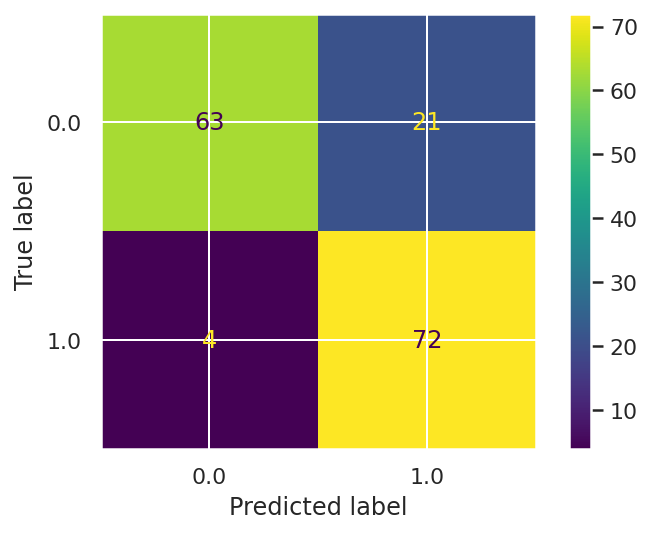

In [82]:
plot_confusion_matrix(modelNB, x_val, y_val)
plt.show()

#### 7.3 Logistic Regression

In [83]:
#statsmodel
# This can be interesting for justifying and analyzing data separately
import statsmodels.api as sm

log_reg = sm.Logit(y_train, x_train).fit()
print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.294424
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Disease   No. Observations:                  637
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                           19
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                  0.5747
Time:                        12:24:15   Log-Likelihood:                -187.55
converged:                       True   LL-Null:                       -440.96
Covariance Type:            nonrobust   LLR p-value:                 2.062e-95
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Birth_

In [84]:
# Random Search with Bagging
rand_logit_grid = {
    'base_estimator__penalty': ['l1','l2'], 
    'base_estimator__C': [0.001,0.01,0.1,1,10,100,1000],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'n_estimators': [2,10,20,50, 80,100, 120, 150, 175 ,200],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'oob_score': [True, False]
    }

rand_logit_cv = RandomizedSearchCV(BaggingClassifier(LogisticRegression()), rand_logit_grid, cv=10, scoring='f1')
rand_logit_cv.fit(x_train, y_train)
print(rand_logit_cv.best_params_)

# Decision Tree (all variables)
baglogit = rand_logit_cv.best_estimator_
## train_score = dtree.score(train_data.select_dtypes(exclude=['object']), y_train)

# Predict
y_pred_baglogit = baglogit.predict(x_val)
y_pred_baglogit = pd.DataFrame(y_pred_baglogit, index = y_val.index)

# Print score
print(baglogit.score(x_val, y_val))

# Confusion Matrix
confusion_matrix(y_val, y_pred_baglogit)

# F1 score
f1_score(y_val, y_pred_baglogit)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 394, in _fit
    all_results = Parallel(
  File "/usr/local/lib/p

{'oob_score': False, 'n_estimators': 150, 'max_samples': 0.8, 'max_features': 0.4, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__penalty': 'l2', 'base_estimator__C': 10}
0.85625


0.8588957055214723

In [85]:
logit_params = {
    'penalty': ['l1','l2'], 
    'C': [0.001,0.01,0.1,1,10,100,1000]
}

logit_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=logit_params, cv= 5, scoring='f1')
logit_cv.fit(x_train, y_train.values.ravel())

log_model = logit_cv.best_estimator_
log_model.fit(x_train, y_train.values.ravel())
log_model.score(x_val, y_val.values.ravel())

# Predict
y_pred_logit = log_model.predict(x_val)
y_pred_logit = pd.DataFrame(y_pred_logit, index = y_val.index)

# Print score
print(log_model.score(x_val, y_val))

# Confusion Matrix
confusion_matrix(y_val, y_pred_logit)

# F1 score
f1_score(y_val, y_pred_logit)

grid_lr = logit_cv.cv_results_

0.86875


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


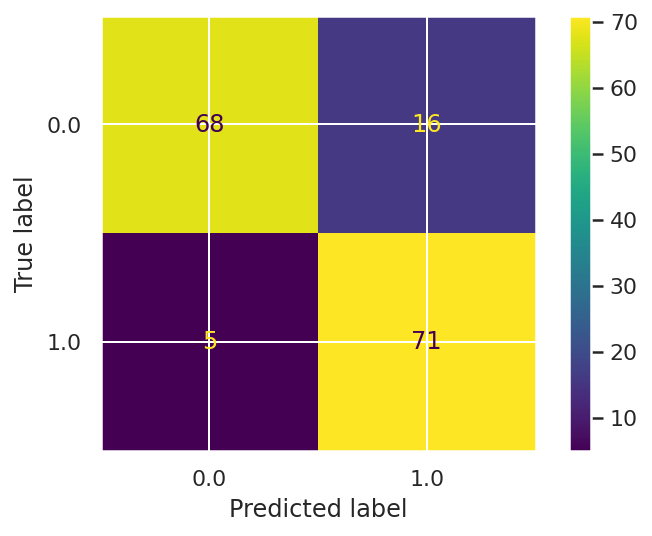

In [86]:
plot_confusion_matrix(log_model, x_val, y_val.values.ravel())
plt.show()

#### 7.4 Random Forest 

In [87]:
random_forest_grid = { 
    'n_estimators': [50,100,150,200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [10,20,50,100,None],
    'criterion' :['gini', 'entropy'],
}

In [88]:
randomf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=random_forest_grid, cv= 10, scoring='f1')
randomf_cv.fit(x_train, y_train.values.ravel())
randomf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 150}

In [89]:
grid_rf = randomf_cv.cv_results_

In [90]:
randomForest = randomf_cv.best_estimator_

randomForest.fit(x_train, y_train.values.ravel())
y_val_clf = randomForest.predict(x_val)

metrics.accuracy_score(y_val_clf, y_val.values.ravel())

0.96875

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


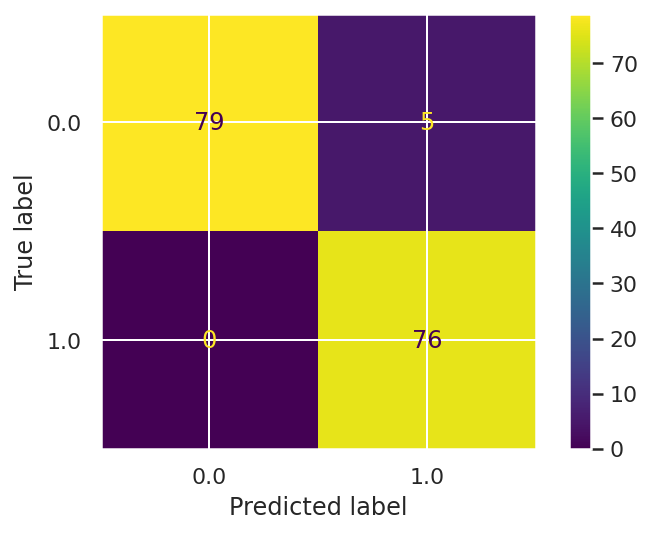

In [91]:
plot_confusion_matrix(randomForest, x_val, y_val.values.ravel())
plt.show()

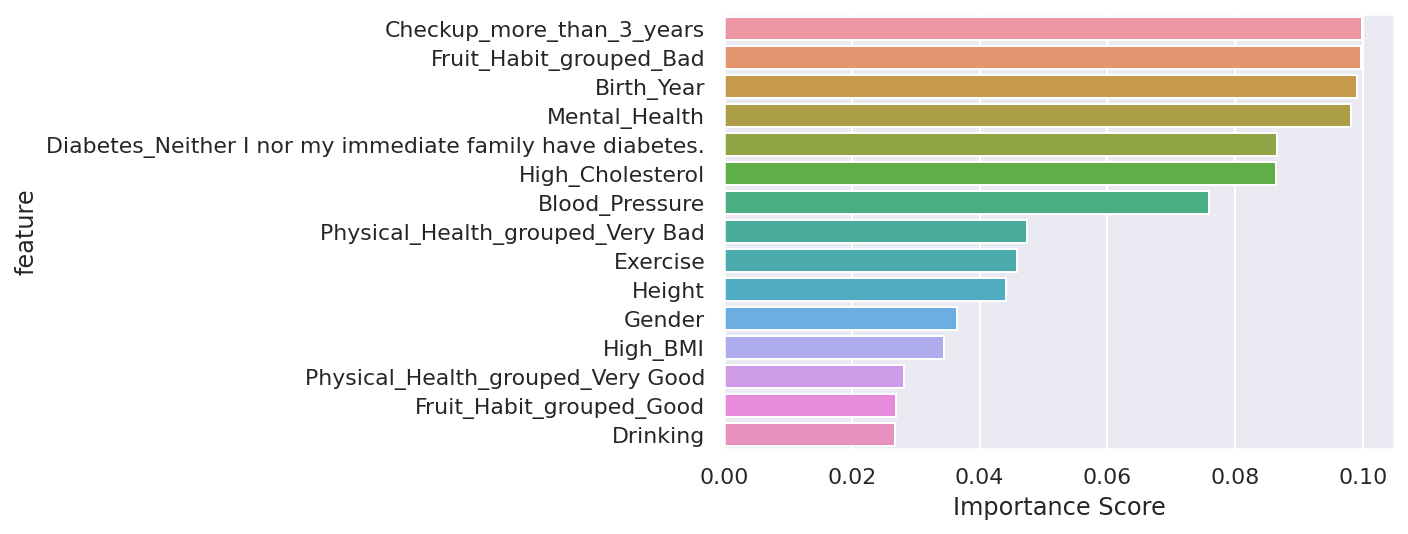

In [92]:
# filter most important features
ft_importance = pd.Series(randomForest.feature_importances_, index = x_train.columns).sort_values(ascending=False).head(15)

%matplotlib inline

sns.barplot(x=ft_importance, y =ft_importance.index)
plt.xlabel("Importance Score")
plt.ylabel('feature')
plt.show()

In [93]:
#print(list(ft_importance.index))

In [94]:
#redo with most important features
x_train_clf = x_train[list(ft_importance.index)]
x_val_clf = x_val[list(ft_importance.index)]


In [169]:
randomForest_fteen = randomf_cv.best_estimator_

randomForest_fteen.fit(x_train_clf, y_train.values.ravel())
y_pred_clf_01 = randomForest_fteen.predict(x_val_clf)

metrics.accuracy_score(y_pred_clf_01, y_val.values.ravel())

0.9875

In [96]:
#plot_confusion_matrix(randomForest, x_val_clf, y_val)
#plt.show()

#### 7.5 KNN Classifier

In [97]:
# varies strongly, I once got 100%, but only 88% the next time
# 100% with {'oob_score': False, 'n_estimators': 200, 'max_samples': 0.7, 'max_features': 0.4, 'bootstrap_features': False, 'bootstrap': False, 'base_estimator__weights': 'distance', 'base_estimator__n_neighbors': 2, 'base_estimator__algorithm': 'brute'}
# Random Search with Bagging
rand_knn_grid = {
    'base_estimator__n_neighbors': list(range(1, 20)),
    'base_estimator__weights': ['uniform', 'distance'],
    'base_estimator__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'], 
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'n_estimators': [2,10,20,50, 80,100, 120, 150, 175 ,200],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'oob_score': [True, False],
    }

rand_knn_cv = RandomizedSearchCV(BaggingClassifier(KNeighborsClassifier()), rand_knn_grid, cv=5, scoring='f1')
rand_knn_cv.fit(x_train, y_train)
print(rand_knn_cv.best_params_)

# KNN (all variables)
bagknn = rand_knn_cv.best_estimator_

# Predict
y_pred_bagknn = bagknn.predict(x_val)
y_pred_bagknn = pd.DataFrame(y_pred_bagknn, index = y_val.index)

# Print score
print(bagknn.score(x_val, y_val))

# Confusion Matrix
confusion_matrix(y_val, y_pred_bagknn)

# F1 score
f1_score(y_val, y_pred_bagknn)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 351, in _fit
    raise ValueError("Out of bag estimation only avai

{'oob_score': False, 'n_estimators': 80, 'max_samples': 0.7, 'max_features': 0.2, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__weights': 'uniform', 'base_estimator__n_neighbors': 10, 'base_estimator__algorithm': 'auto'}
0.86875


0.8695652173913043

In [98]:
KNN_grid = {
    'n_neighbors': list(range(1, 20)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],  
}

In [99]:
KNN_cv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=KNN_grid, cv= 5, scoring='f1')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    KNN_cv.fit(x_train, y_train)
KNN_cv.best_params_
grid_knn = KNN_cv.cv_results_

In [100]:
KNN_clf = KNN_cv.best_estimator_
KNN_clf.fit(x_train, y_train)

y_pred_KNN = KNN_clf.predict(x_val)
KNN_clf.score(x_val, y_val)

0.95625

In [101]:
k_range = range(5, 20)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_val)
    scores.append(metrics.accuracy_score(y_val, y_pred))

Text(0, 0.5, 'Testing Accuracy')

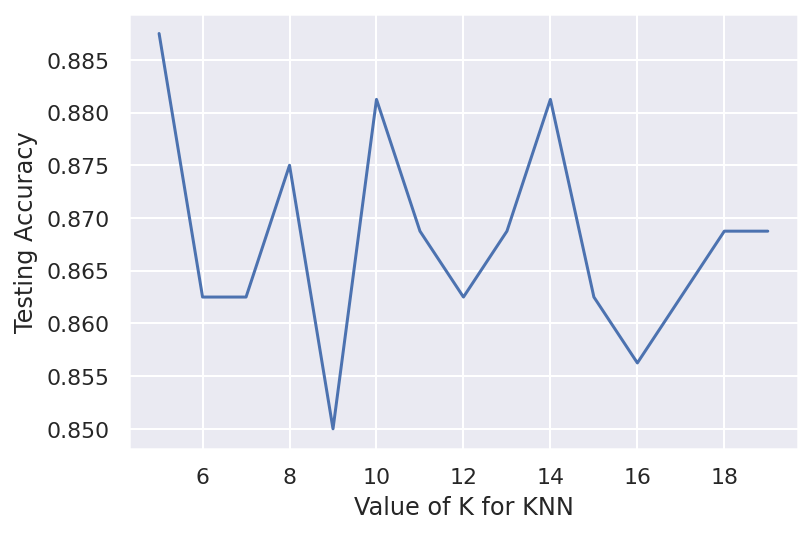

In [102]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### 7.6 Multi Layer Perceptron Calssifier

We commented this section out because of time performance. 
KNow from before that the results were similar to the MLP only with gridSearchCV below

In [103]:
# # Random Search with Bagging
# rand_mlp_grid = {
#     'base_estimator__hidden_layer_sizes': [(50,50,50), (10,10), (25,25), (50, 50)],
#     'base_estimator__activation': ['tanh', 'relu'],
#     'base_estimator__solver': ['sgd', 'adam'],
#     'base_estimator__alpha': [0.0001, 0.001, 0.01, 0.05],
#     'base_estimator__learning_rate': ['constant','adaptive'],
#     'base_estimator__learning_rate_init': [0.0001, 0.001, 0.01, 0.05],
#     'base_estimator__max_iter': [400],
#     'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
#     'n_estimators': [2,10,20,50, 80,100, 120, 150, 175 ,200],
#     'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
#     'bootstrap': [True, False],
#     'bootstrap_features': [True, False],
#     'oob_score': [True, False]
#     }

# rand_mlp_cv = RandomizedSearchCV(BaggingClassifier(MLPClassifier()), rand_mlp_grid, cv=10, scoring='f1', n_jobs=4)
# rand_mlp_cv.fit(x_train, y_train)
# print(rand_mlp_cv.best_params_)

# # MLP (all variables)
# bagmlp = rand_mlp_cv.best_estimator_

# # Predict
# y_pred_bagmlp = bagmlp.predict(x_val)
# y_pred_bagmlp = pd.DataFrame(y_pred_bagmlp, index = y_val.index)

# # Print score
# print(bagmlp.score(x_val, y_val))

# # Confusion Matrix
# confusion_matrix(y_val, y_pred_bagmlp)

# # F1 score
# f1_score(y_val, y_pred_bagmlp)

In [104]:
# 100% at {'oob_score': False, 'n_estimators': 150, 'max_samples': 0.9, 'max_features': 1.0, 'bootstrap_features': True, 'bootstrap': False, 'base_estimator__solver': 'adam', 'base_estimator__max_iter': 500, 'base_estimator__learning_rate_init': 0.01, 'base_estimator__learning_rate': 'constant', 'base_estimator__hidden_layer_sizes': (10, 10), 'base_estimator__alpha': 0.0001, 'base_estimator__activation': 'tanh'}
MLP_grid = {
    'hidden_layer_sizes': [(25,50), (25,50,25), (10,5,10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.05],
    'max_iter': [500],
}

In [105]:
# 93% with {'solver': 'adam', 'max_iter': 500,  'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'relu'}
mlp_cv = RandomizedSearchCV(MLPClassifier(), MLP_grid, cv= 5, scoring='f1', n_jobs=-1)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    mlp_cv.fit(x_train, y_train.values.ravel())
mlp_cv.best_params_

{'solver': 'adam',
 'max_iter': 500,
 'learning_rate_init': 0.01,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (100,),
 'alpha': 0.01,
 'activation': 'tanh'}

In [106]:
grid_mpl = mlp_cv.cv_results_

In [107]:
MLP_clf = mlp_cv.best_estimator_ 

MLP_clf.fit(x_train, y_train.values.ravel())

y_pred_MLP = MLP_clf.predict(x_val)
MLP_clf.score(x_val, y_val.values.ravel())

0.925

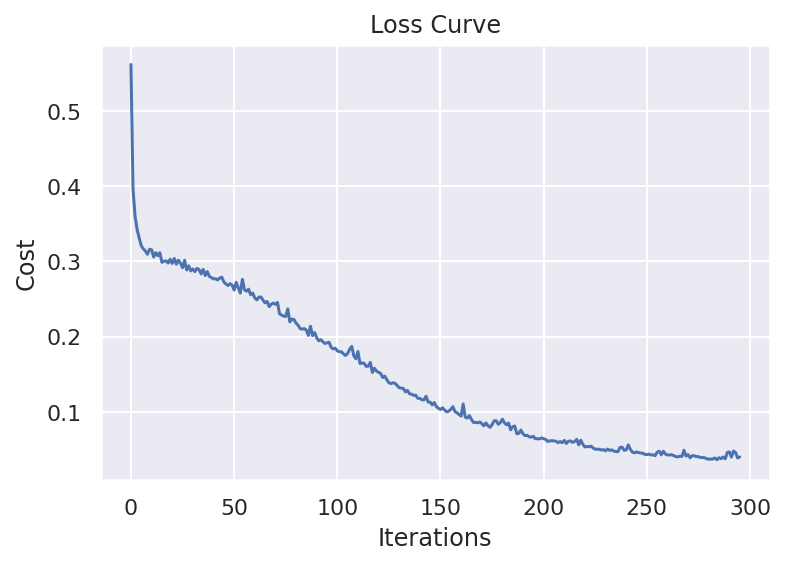

In [108]:
#plot loss Curve
plt.plot(MLP_clf.loss_curve_)
plt.title("Loss Curve")
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#### 7.7 Linear Discriminant Analysis

In [109]:
# Random Search with Bagging
rand_lda_grid = {
    'base_estimator__solver': ['svd', 'lsqr', 'eigen'],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'n_estimators': [2,10,20,50, 80,100, 120, 150, 175 ,200],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'oob_score': [True, False]
    }

rand_lda_cv = RandomizedSearchCV(BaggingClassifier(LinearDiscriminantAnalysis()), rand_lda_grid, cv=10, scoring='f1')
rand_lda_cv.fit(x_train, y_train)
print(rand_lda_cv.best_params_)

# MLP (all variables)
baglda = rand_lda_cv.best_estimator_

# Predict
y_pred_baglda = baglda.predict(x_val)
y_pred_baglda = pd.DataFrame(y_pred_baglda, index = y_val.index)

# Print score
print(baglda.score(x_val, y_val))

# Confusion Matrix
confusion_matrix(y_val, y_pred_baglda)

# F1 score
f1_score(y_val, y_pred_baglda)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 394, in _fit
    all_results = Parallel(
  File "/usr/local/lib/py

{'oob_score': False, 'n_estimators': 150, 'max_samples': 0.4, 'max_features': 0.8, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__solver': 'lsqr'}
0.85625


0.8606060606060606

In [110]:
LDA_params = {
    'solver' : ['svd', 'lsqr', 'eigen']
}

In [111]:
LDA_cv = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=LDA_params, cv= 5, scoring='f1')

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    LDA_cv.fit(x_train, y_train)
LDA_cv.best_params_
grid_lda = LDA_cv.cv_results_

In [112]:
LDA_clf = LDA_cv.best_estimator_
LDA_clf.fit(x_train, y_train)

y_pred_LDA = LDA_clf.predict(x_val)

LDA_clf.score(x_val, y_val)

0.86875

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


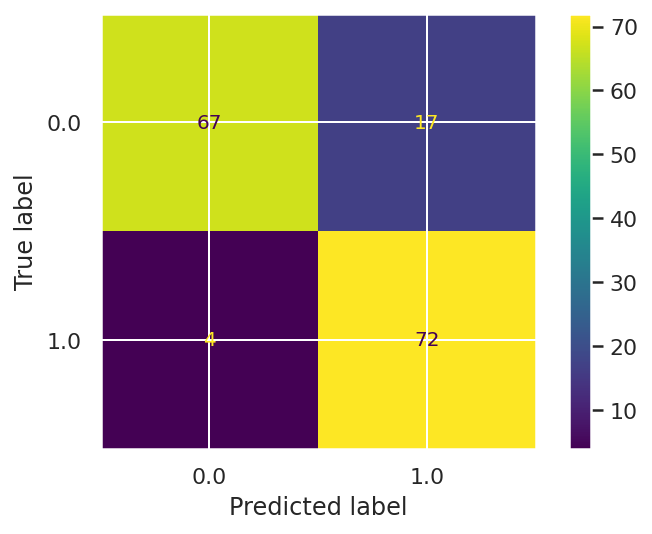

In [113]:
plot_confusion_matrix(LDA_clf, x_val, y_val)
plt.show()

#### 7.8 Support Vector Machine


In [114]:
# Random Search with Bagging
rand_svm_grid = {
    'base_estimator__kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'base_estimator__C': [0.05, 0.1, 0.5, 1, 5, 10, 100],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'n_estimators': [2,10,20,50, 80,100, 120, 150, 175 ,200],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'oob_score': [True, False]
    }

rand_svm_cv = RandomizedSearchCV(BaggingClassifier(SVC()), rand_svm_grid, cv=10, scoring='f1')
rand_svm_cv.fit(x_train, y_train)
print(rand_svm_cv.best_params_)

# MLP (all variables)
bagsvm = rand_svm_cv.best_estimator_

# Predict
y_pred_bagsvm = bagsvm.predict(x_val)

# Print score
print(bagsvm.score(x_val, y_val))

# F1 score
f1_score(y_val, y_pred_bagsvm)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too 

{'oob_score': False, 'n_estimators': 175, 'max_samples': 0.3, 'max_features': 0.9, 'bootstrap_features': True, 'bootstrap': True, 'base_estimator__kernel': 'rbf', 'base_estimator__C': 5}
0.8875


0.8888888888888888

In [115]:
SVM_params ={
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'C': [0.05, 0.1, 0.5, 1, 5, 10, 100]
    } 

In [116]:
SVM_cv = GridSearchCV(estimator=SVC(), param_grid=SVM_params, cv= 5, scoring='f1')

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    SVM_cv.fit(x_train, y_train)
SVM_cv.best_params_

grid_svm = SVM_cv.cv_results_

In [117]:
SVM_clf = SVM_cv.best_estimator_

SVM_clf.fit(x_train, y_train)

y_pred_svm = SVM_clf.predict(x_val)
SVM_clf.score(x_val, y_val)

0.95

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


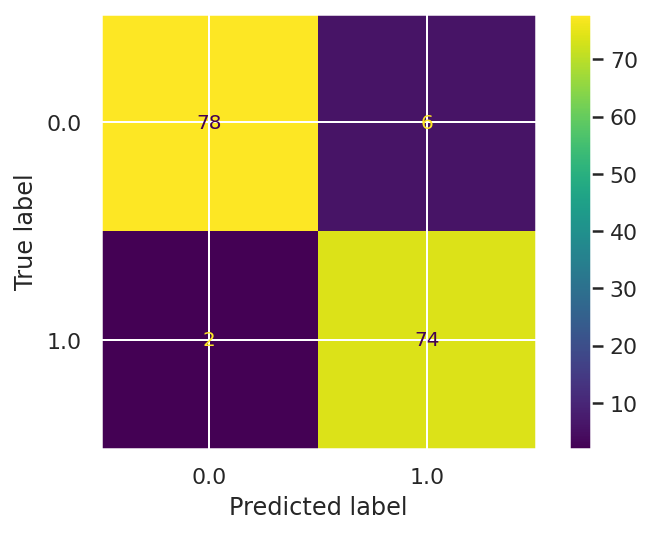

In [118]:
plot_confusion_matrix(SVM_clf, x_val, y_val)
plt.show()

#### 7.10 Ada Boosting 

In [172]:
# gridsearch cv
ada_params = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), 
                      DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0]
}

ada_clf = AdaBoostClassifier()

In [173]:
ada_clf_cv = GridSearchCV(estimator=ada_clf, param_grid=ada_params, cv=5, scoring='f1')

# Fit the grid search object to the training data
ada_clf_cv.fit(x_train, y_train)
# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", ada_clf_cv.best_params_)

ada_clf = ada_clf_cv.best_estimator_
y_pred_ada = ada_clf.predict(x_val)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_val, y_pred_ada)
print("Accuracy:", accuracy)
grid_ada = ada_clf_cv.cv_results_

Best hyperparameters: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 300}
Accuracy: 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


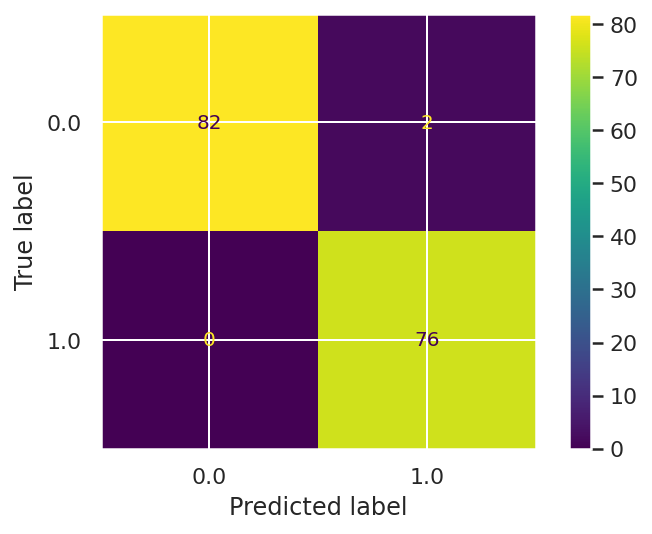

In [121]:
plot_confusion_matrix(ada_clf, x_val, y_val)
plt.show()

#### 7.11 Gradient Boosting

In [122]:
grad_params = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 2, 3]
}

gb_clf = GradientBoostingClassifier()

In [123]:
gb_clf_cv = GridSearchCV(estimator=gb_clf, param_grid=grad_params, cv=5, scoring='f1')

gb_clf_cv.fit(x_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", gb_clf_cv.best_params_)

# Make predictions on the test data using the best estimator found by the grid search
gb_clf = gb_clf_cv.best_estimator_
y_pred_boost = gb_clf.predict(x_val)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_val, y_pred_boost)
print("Accuracy:", accuracy)
grid_gb = gb_clf_cv.cv_results_

Best hyperparameters: {'learning_rate': 0.5, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.99375


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


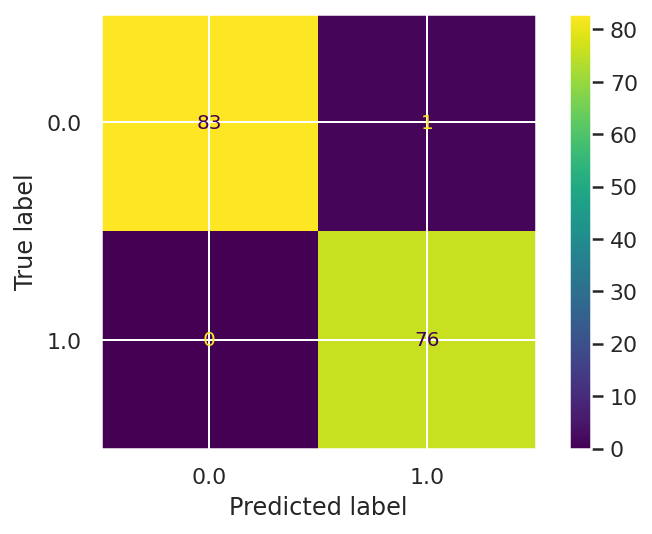

In [124]:
plot_confusion_matrix(gb_clf, x_val, y_val)
plt.show()

#### 7.9 Ensemble Voting & Stacking classifier

0.9875


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


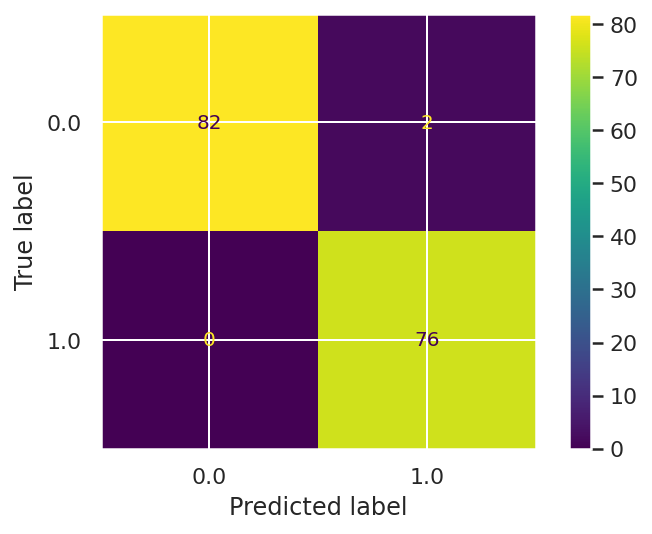

In [125]:
clf_list = [bagknn, KNN_clf, gb_clf, ada_clf, randomForest]

adv_ensemble = VotingClassifier(
    estimators=[
        ("Bagged KNN", bagknn),
        ("KNN", KNN_clf),
        ("Gradient Boost", gb_clf),
        ("ADA Boost", ada_clf),
        ("Random Forest", randomForest)
        ],
         voting='soft'
    )

adv_ensemble.estimators_ = clf_list
adv_ensemble.le_ = LabelEncoder().fit(y_val)
adv_ensemble.classes_ = adv_ensemble.le_.classes_


y_pred_adv_ens = adv_ensemble.predict(x_val)
print(adv_ensemble.score(x_val, y_val))

plot_confusion_matrix(adv_ensemble, x_val, y_val)
plt.show()

EXTRA: Stacking Classifier

0.9875


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


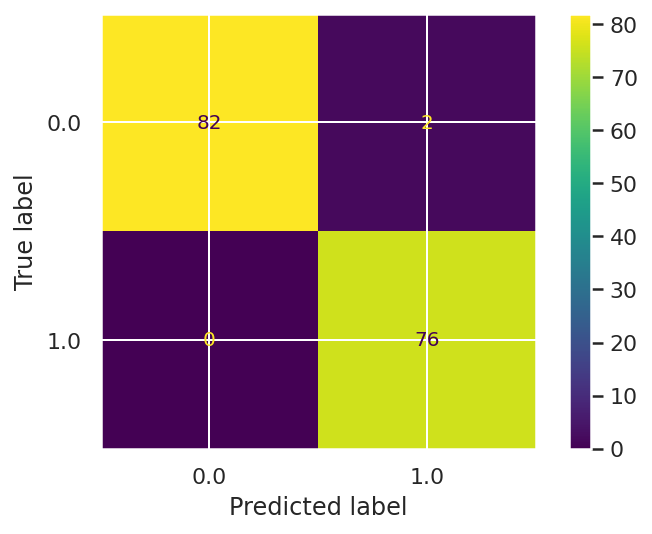

In [126]:
clf_list = [KNN_clf, gb_clf, ada_clf, log_model, MLP_clf, 
            modelNB, SVM_clf, LDA_clf, bagsvm, baglda, #bagmlp, 
            bagknn, bagdtree, baglogit, bagdnb, randomForest]

stacking_ensemble = StackingClassifier(
    estimators=[
        ("KNN", KNN_clf),
        ("Gradient Boost", gb_clf),
        ("ADA Boost", ada_clf),
        ("Logistic Regression", log_model),
        ("MLP", MLP_clf),
        ("Naive Bayes", modelNB),
        ("SVM", SVM_clf),
        ("LDA", LDA_clf),
        ("Bagged SVM", bagsvm),
        ("Bagged LDA", baglda),
       # ("Bagged MLP", bagmlp),
        ("Bagged KNN", bagknn),
        ("Bagged Decision Tree", bagdtree),
        ("Bagged Logistic Reg.", baglogit),
        ("Bagged Naive Bayes", bagdnb),
        ("Random Forest", randomForest),
        ]
    )

stacking_ensemble.fit(x_train, y_train)
y_pred_stack_ens = stacking_ensemble.predict(x_val)
print(stacking_ensemble.score(x_val, y_val))

plot_confusion_matrix(stacking_ensemble, x_val, y_val)
plt.show()

#### 7.12 Initial assesment

In [127]:
parameters = [ gb_clf_cv.best_params_, ada_clf_cv.best_params_, randomf_cv.best_params_, 
    logit_cv.best_params_, mlp_cv.best_params_, GaussianNB_cv.best_params_, 
    #adv_ensemble.best_params_, stacking_ensemble.best_params_, 
    SVM_cv.best_params_, LDA_cv.best_params_, KNN_cv.best_params_,rand_svm_cv.best_params_, 
    rand_lda_cv.best_params_, rand_knn_cv.best_params_, #rand_mlp_cv.best_params_, 
    rand_tree_cv.best_params_, rand_logit_cv.best_params_,
    rand_nb_cv.best_params_]
model = [
     'gb_clf_cv', 'ada_clf_cv', 'randomf_cv', 
    'logit_cv', 'mlp_cv', 'GaussianNB_cv', 
    #'adv_ensemble', 'stacking_ensemble', 
    'SVM_cv.best_params_', 'LDA_cv', 'KNN_cv', 'rand_svm_cv', 
    'rand_lda_cv', 'rand_knn_cv', #'rand_mlp_cv', 
    'rand_tree_cv', 'rand_logit_cv',
    'rand_nb_cv'
]

hparameters = pd.DataFrame({'model': model, 'params': parameters})
hparameters

model                                             params
0             gb_clf_cv  {'learning_rate': 0.5, 'loss': 'exponential', ...
1            ada_clf_cv  {'base_estimator': DecisionTreeClassifier(max_...
2            randomf_cv  {'criterion': 'entropy', 'max_depth': 20, 'max...
3              logit_cv                          {'C': 1, 'penalty': 'l2'}
4                mlp_cv  {'solver': 'adam', 'max_iter': 500, 'learning_...
5         GaussianNB_cv                             {'var_smoothing': 1.0}
6   SVM_cv.best_params_                         {'C': 10, 'kernel': 'rbf'}
7                LDA_cv                                  {'solver': 'svd'}
8                KNN_cv  {'algorithm': 'ball_tree', 'n_neighbors': 1, '...
9           rand_svm_cv  {'oob_score': False, 'n_estimators': 175, 'max...
10          rand_lda_cv  {'oob_score': False, 'n_estimators': 150, 'max...
11          rand_knn_cv  {'oob_score': False, 'n_estimators': 80, 'max_...
12         rand_tree_cv  {'oob_score': True, 'n_estimators': 175, 'max_...
13        rand_logit_cv  {'oob_score': False, 'n_estimators': 150, 'max...
14           rand_nb_cv  {'oob_score': True, 'n_estimators': 50, 'max_s...

In [128]:
metrics_df =  pd.DataFrame(columns=['f1', 'acc', 'pre','recall'])

def results_table(model, y_pred):
    metrics = []
    metrics.append(f1_score(y_val, y_pred))
    metrics.append(accuracy_score(y_val, y_pred))
    metrics.append(precision_score(y_val, y_pred))
    metrics.append(recall_score(y_val, y_pred))
    metrics_df.loc[model] = metrics

In [129]:
results_table('Decision Tree', y_pred_dtree)
results_table('Bagged Decision Tree', y_pred_bagdtree)
results_table('Gaussian NB', y_pred_nb)
results_table('Bagged Gaussian NB', y_pred_bagdnb)
results_table('Logistic Regr.', y_pred_logit)
results_table('Bagged Logistic Regr.', y_pred_baglogit)
results_table('Random Forest Reduced', y_val_clf)
results_table('KNNClassifier', y_pred_KNN)
results_table('Bagged KNNClassifier', y_pred_bagknn)
results_table('Multi-Layer Percept.', y_pred_MLP)
# results_table('Bagged MLP', y_pred_bagmlp)
results_table('Linear Discr. Analysis', y_pred_LDA)
results_table('Bagged LDA', y_pred_baglda)
results_table('Support Vector Machine', y_pred_svm)
results_table('Bagged SVM', y_pred_bagsvm)
results_table('Ensemble', y_pred_adv_ens)
results_table('Stacked Ensemble', y_pred_stack_ens)
results_table('AdaBoost', y_pred_ada)
results_table('Gradient Boosting', y_pred_boost)

# metrics_df. iloc[:, [1]]
metrics_df

f1      acc       pre    recall
Decision Tree           0.980645  0.98125  0.962025  1.000000
Bagged Decision Tree    0.974359  0.97500  0.950000  1.000000
Gaussian NB             0.852071  0.84375  0.774194  0.947368
Bagged Gaussian NB      0.838323  0.83125  0.769231  0.921053
Logistic Regr.          0.871166  0.86875  0.816092  0.934211
Bagged Logistic Regr.   0.858896  0.85625  0.804598  0.921053
Random Forest Reduced   0.968153  0.96875  0.938272  1.000000
KNNClassifier           0.954839  0.95625  0.936709  0.973684
Bagged KNNClassifier    0.869565  0.86875  0.823529  0.921053
Multi-Layer Percept.    0.924051  0.92500  0.890244  0.960526
Linear Discr. Analysis  0.872727  0.86875  0.808989  0.947368
Bagged LDA              0.860606  0.85625  0.797753  0.934211
Support Vector Machine  0.948718  0.95000  0.925000  0.973684
Bagged SVM              0.888889  0.88750  0.837209  0.947368
Ensemble                0.987013  0.98750  0.974359  1.000000
Stacked Ensemble        0.987013  0.98750  0.974359  1.000000
AdaBoost                0.987013  0.98750  0.974359  1.000000
Gradient Boosting       0.993464  0.99375  0.987013  1.000000

Text(0.5, 1.0, 'Accuracy per Model')

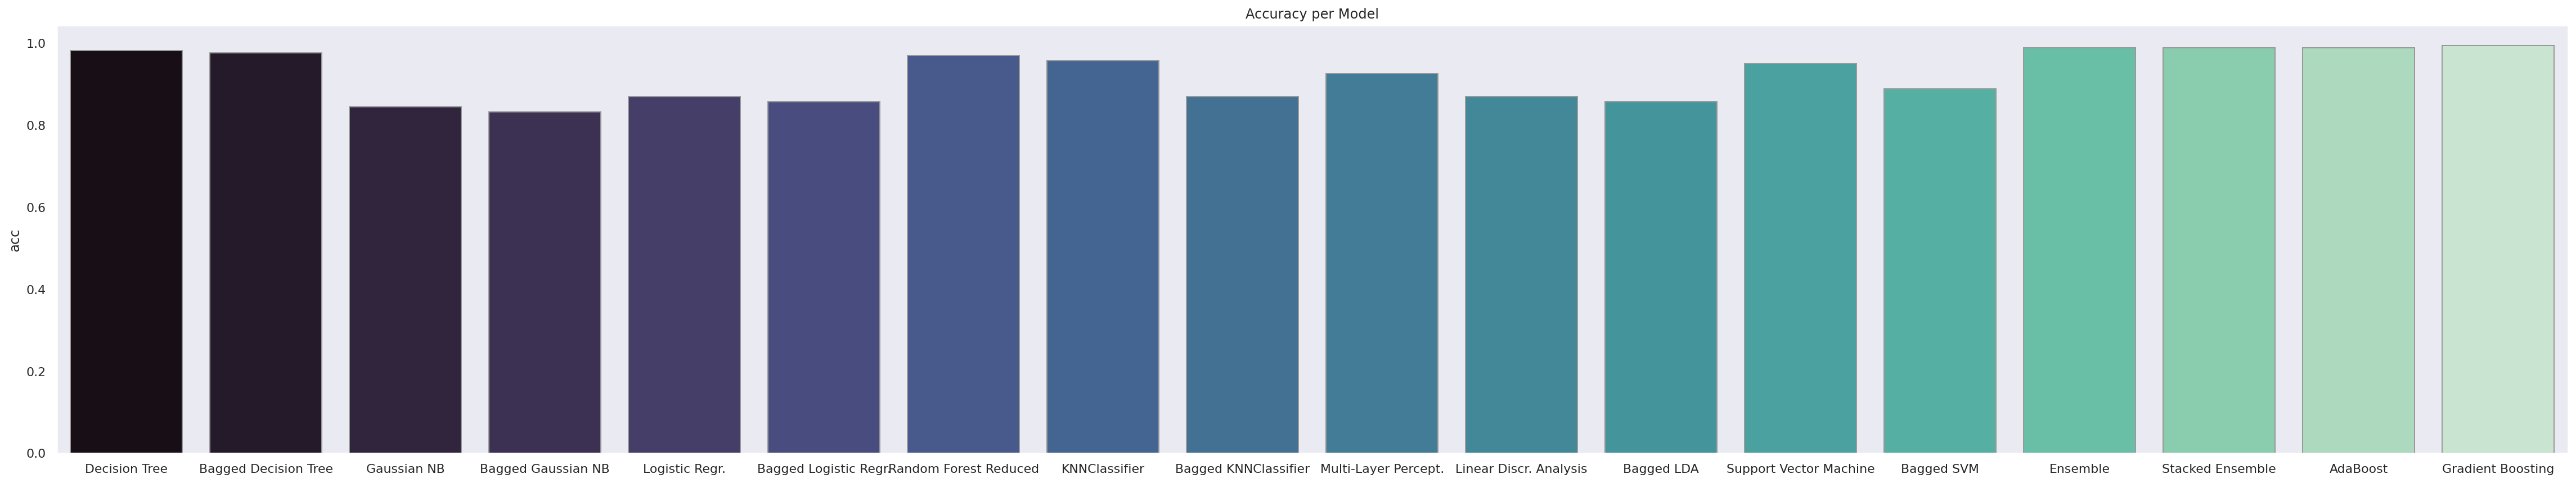

In [130]:
metrics_df2 = metrics_df.iloc[:,-3:-2]

plt.figure(figsize=(40,7))
sns.set_style({'axes.grid': False})
sns.barplot(data=metrics_df2, x=metrics_df2.index, y='acc', palette="mako", edgecolor=".6").set_title('Accuracy per Model')


# 8. Cross Validation



In [131]:
#retrieve the full dataset for proper cross validation

x_all_fs = x_train_all[x_train.columns]
# Only 15 
x_all_fteen = x_train_all[x_train_clf.columns]


### Run cross validation with the models defined, using the 3 different datasets we have defined:
  * The Dataset transfomed with all features
  * The dataset with selected features
  * The dataset containing the 15 most relevant variables as defined by the Random Forest most_important_features method

#### Before feature selection

In [132]:
# Cross_validation, by model, with all variables
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    gb = cross_val_score(gb_clf_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    ada = cross_val_score(ada_clf_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    random_forest = cross_val_score(randomf_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    logistic_reg = cross_val_score(logit_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    MLP_classifier = cross_val_score(mlp_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    g_naive_bayes = cross_val_score(GaussianNB_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    ensemble_clf = cross_val_score(adv_ensemble, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    stacked_clf = cross_val_score(stacking_ensemble, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    SVC = cross_val_score(SVM_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    LDA = cross_val_score(LDA_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    KNN = cross_val_score(KNN_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    
    bag_svm =  cross_val_score(rand_svm_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_lda = cross_val_score(rand_lda_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_knn = cross_val_score(rand_knn_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    # bag_mlp = cross_val_score(rand_mlp_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_dtree = cross_val_score(rand_tree_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_logit = cross_val_score(rand_logit_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_gnb = cross_val_score(rand_nb_cv, x_train_all, y_train_all.values.ravel(), cv=5, scoring="f1")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


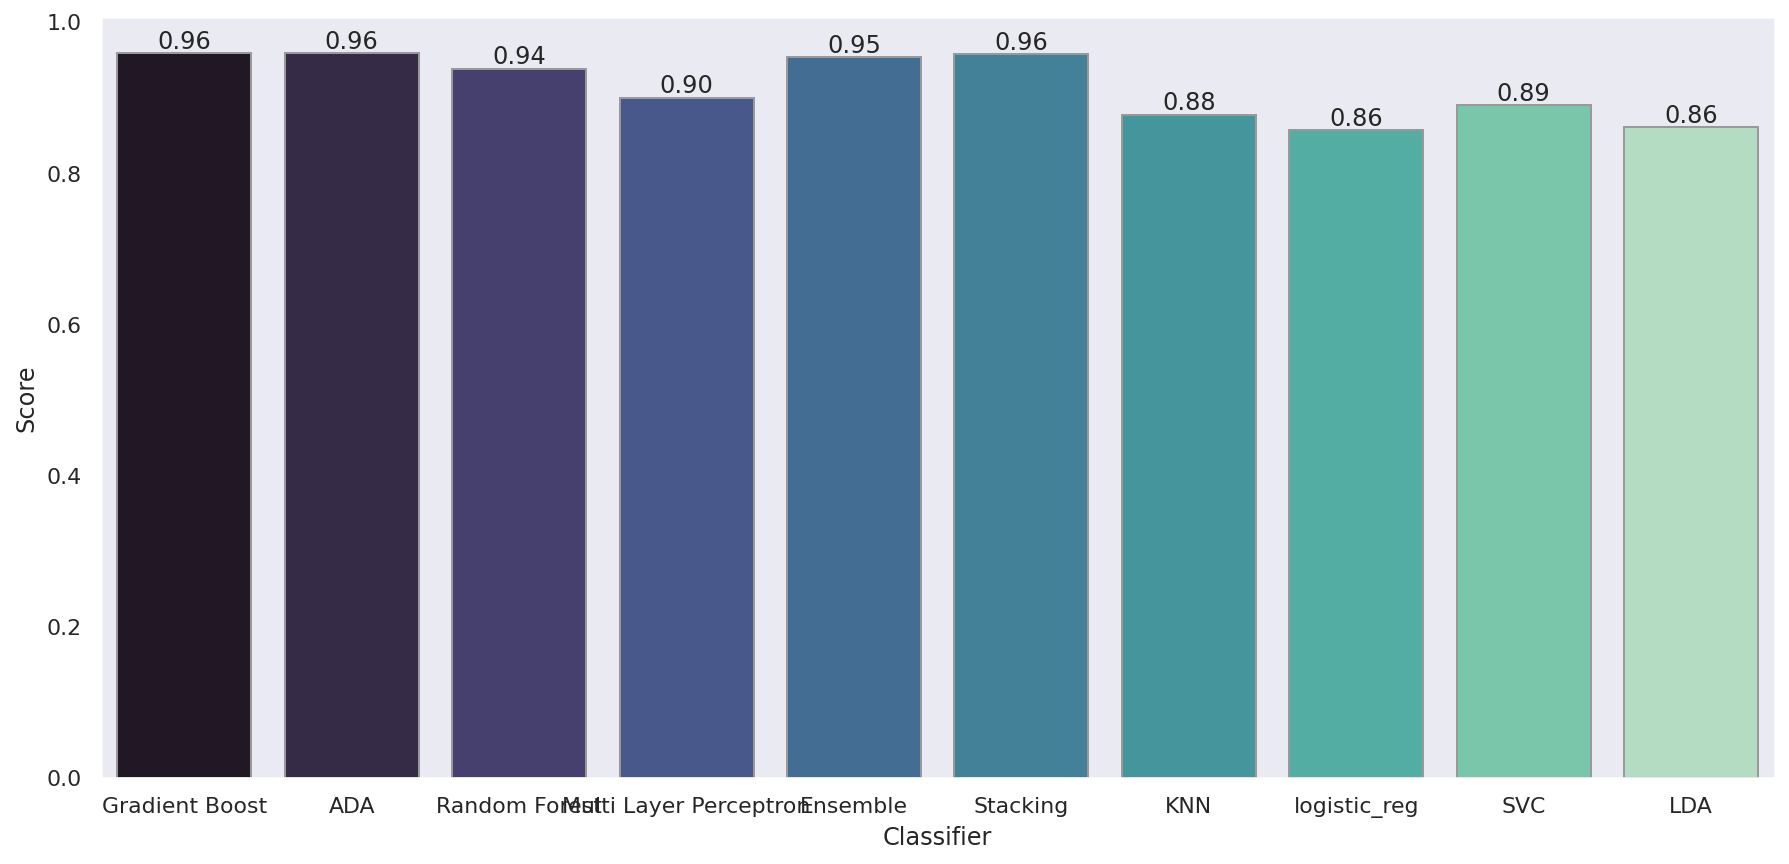

In [133]:
scores = [gb.mean(),ada.mean(),random_forest.mean(), MLP_classifier.mean(),
          ensemble_clf.mean(), stacked_clf.mean(),KNN.mean(),
          logistic_reg.mean().mean(), SVC.mean().mean(), LDA.mean().mean()]
classifiers = ['Gradient Boost','ADA','Random Forest', 'Multi Layer Perceptron', 
              'Ensemble', "Stacking", 'KNN', 'logistic_reg', 'SVC', 'LDA']
scores_df = pd.DataFrame({'Score': scores, 'Classifier':classifiers})

plt.figure(figsize=(15,7))
sns.set_style({'axes.grid': False})
ax = sns.barplot(data=scores_df, x='Classifier', y='Score', palette="mako", edgecolor=".6")

# Add the y-values as text labels inside the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % p.get_height(), 
            fontsize=12, ha='center', va='bottom')

plt.show()



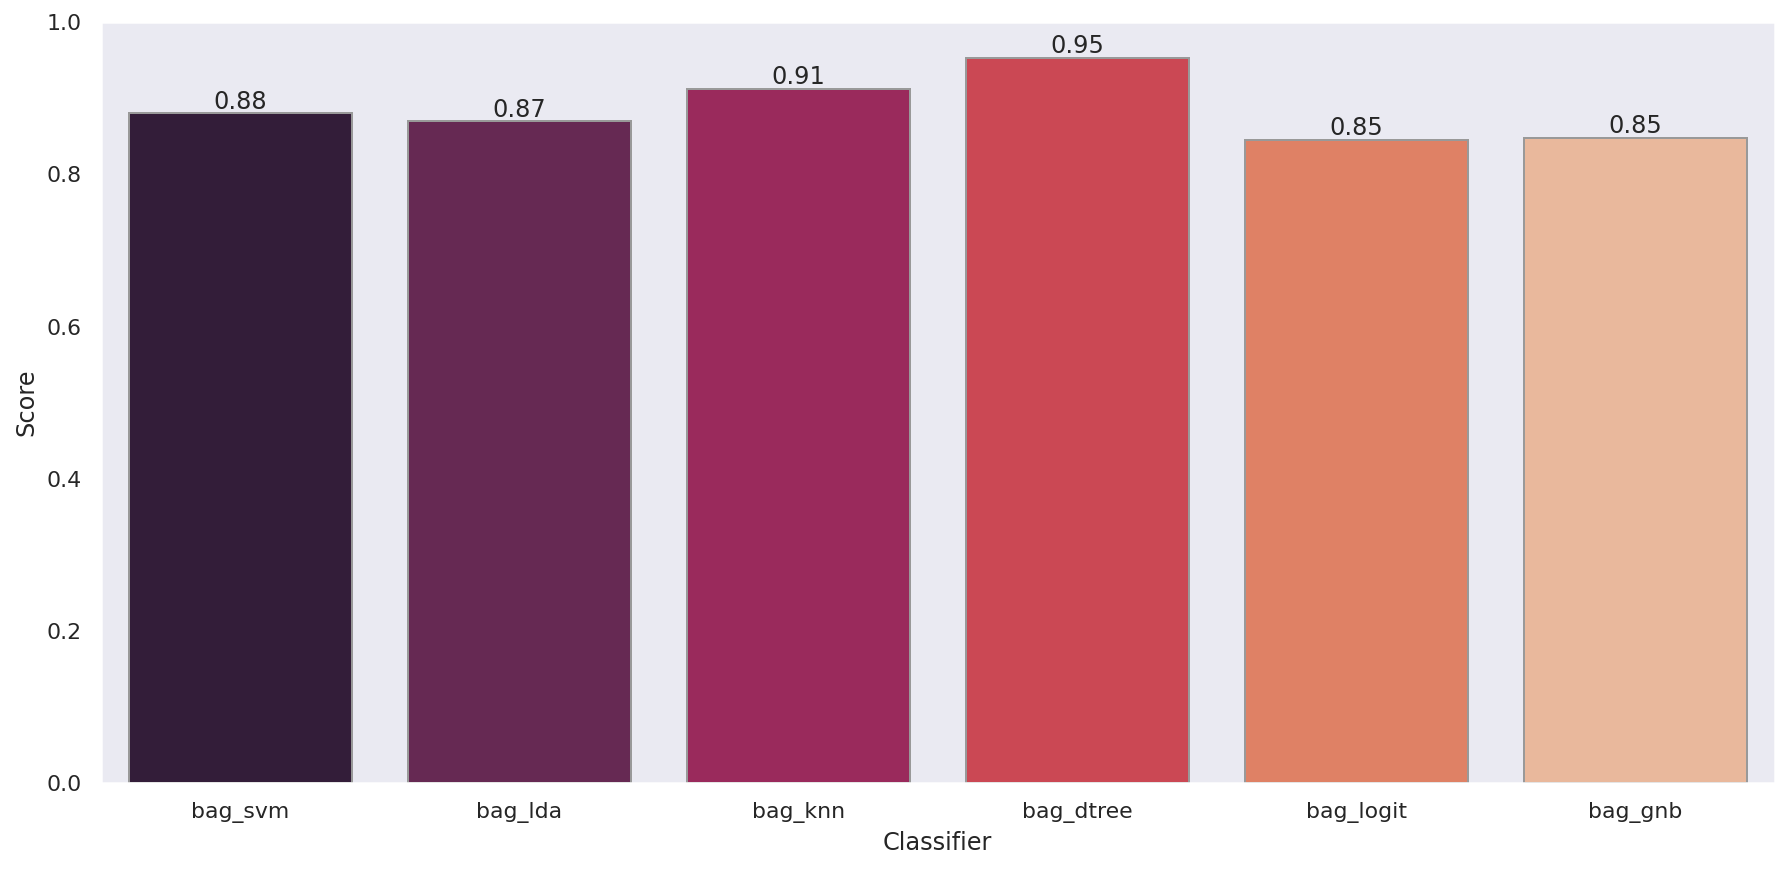

In [135]:
# Chart -> models with bagging
scores = [bag_svm.mean(), bag_lda.mean(), bag_knn.mean(), #bag_mlp.mean(), 
          bag_dtree.mean(), bag_logit.mean(), bag_gnb.mean()]

classifiers = ['bag_svm', 'bag_lda', 'bag_knn', #'bag_mlp', 
               'bag_dtree', 'bag_logit', 'bag_gnb']

scores_df = pd.DataFrame({'Score': scores, 'Classifier':classifiers})

plt.figure(figsize=(15,7))
sns.set_style({'axes.grid': False})
ax = sns.barplot(data=scores_df, x='Classifier', y='Score', palette="rocket", edgecolor=".6")

# Add the y-values as text labels inside the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % p.get_height(), 
            fontsize=12, ha='center', va='bottom')

plt.show()


#### Final Dataset (after feature selection)

In [136]:
# Cross_validation, by model, with all variables
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    gb = cross_val_score(gb_clf_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    ada = cross_val_score(ada_clf_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    random_forest = cross_val_score(randomf_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    logistic_reg = cross_val_score(logit_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    MLP_classifier = cross_val_score(mlp_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    g_naive_bayes = cross_val_score(GaussianNB_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    ensemble_clf = cross_val_score(adv_ensemble, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    stacking_clf = cross_val_score(stacking_ensemble, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    SVC = cross_val_score(SVM_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    LDA = cross_val_score(LDA_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    KNN = cross_val_score(KNN_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    
    bag_svm =  cross_val_score(rand_svm_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_lda = cross_val_score(rand_lda_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_knn = cross_val_score(rand_knn_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    # bag_mlp = cross_val_score(rand_mlp_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_dtree = cross_val_score(rand_tree_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_logit = cross_val_score(rand_logit_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_gnb = cross_val_score(rand_nb_cv, x_all_fs, y_train_all.values.ravel(), cv=5, scoring="f1")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


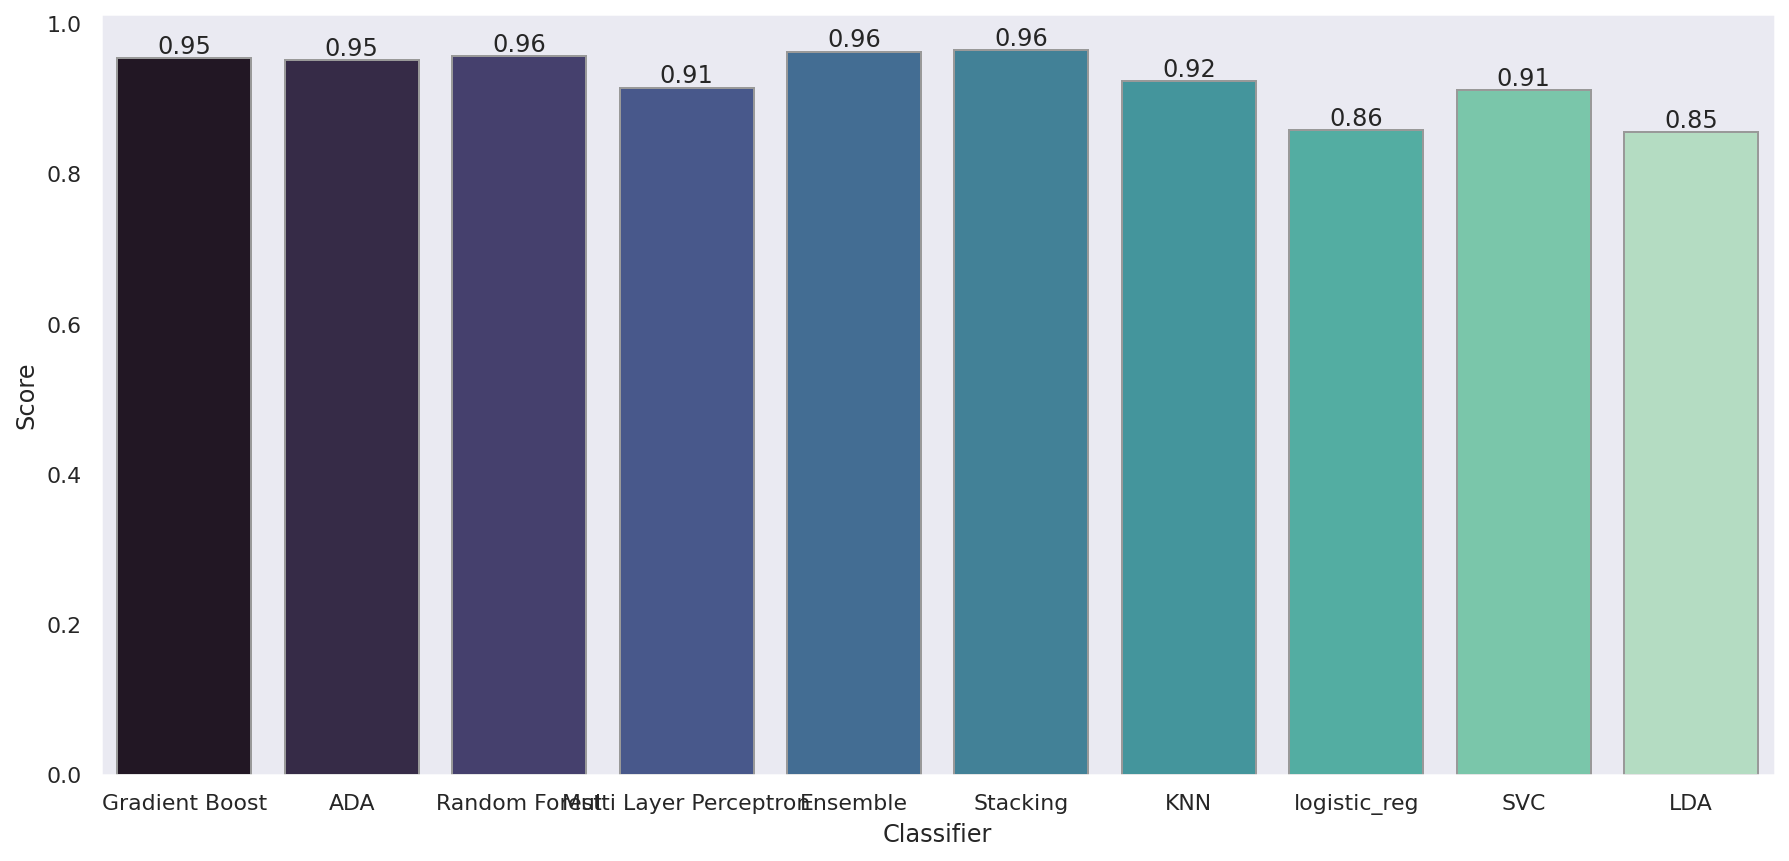

In [137]:
scores = [gb.mean(),ada.mean(),random_forest.mean(), MLP_classifier.mean(), 
          ensemble_clf.mean(), stacking_clf.mean(),KNN.mean(),
          logistic_reg.mean().mean(), SVC.mean().mean(), LDA.mean().mean()]
classifiers = ['Gradient Boost','ADA','Random Forest', 'Multi Layer Perceptron', 
              'Ensemble', "Stacking", 'KNN', 'logistic_reg', 'SVC', 'LDA']
scores_df = pd.DataFrame({'Score': scores, 'Classifier':classifiers})

plt.figure(figsize=(15,7))
sns.set_style({'axes.grid': False})
ax = sns.barplot(data=scores_df, x='Classifier', y='Score', palette="mako", edgecolor=".6")

# Add the y-values as text labels inside the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % p.get_height(), 
            fontsize=12, ha='center', va='bottom')

plt.show()



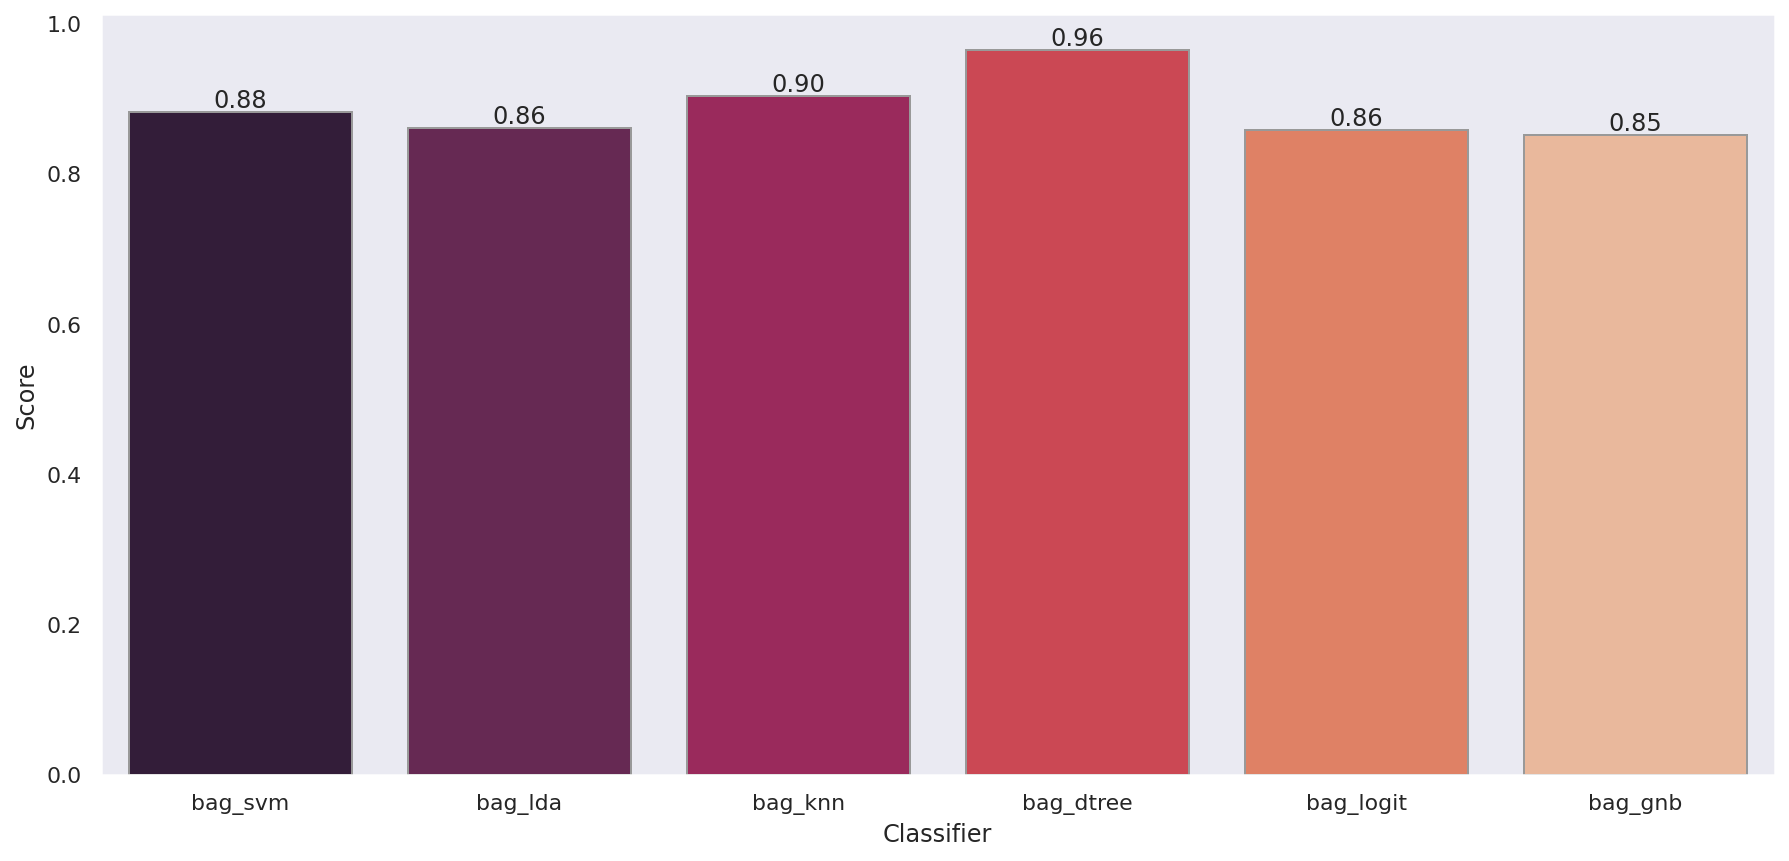

In [138]:
# Chart -> models with bagging
scores = [bag_svm.mean(), bag_lda.mean(), bag_knn.mean(), #bag_mlp.mean(), 
          bag_dtree.mean(), bag_logit.mean(), bag_gnb.mean()]

classifiers = ['bag_svm', 'bag_lda', 'bag_knn', #'bag_mlp', 
               'bag_dtree', 'bag_logit', 'bag_gnb']
scores_df = pd.DataFrame({'Score': scores, 'Classifier':classifiers})

plt.figure(figsize=(15,7))
sns.set_style({'axes.grid': False})
ax = sns.barplot(data=scores_df, x='Classifier', y='Score', palette="rocket", edgecolor=".6")

# Add the y-values as text labels inside the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % p.get_height(), 
            fontsize=12, ha='center', va='bottom')

plt.show()

#### Only the 15 most relevant features as defined by random forest

In [139]:
# Cross_validation, by model, with all variables
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    gb = cross_val_score(gb_clf_cv, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    ada = cross_val_score(ada_clf_cv, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    random_forest = cross_val_score(randomForest, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    logistic_reg = cross_val_score(logit_cv, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring='f1')
    MLP_classifier = cross_val_score(mlp_cv, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    g_naive_bayes = cross_val_score(modelNB, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    ensemble_clf = cross_val_score(adv_ensemble, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    stacking_clf = cross_val_score(stacking_ensemble, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    SVC = cross_val_score(SVM_clf, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    LDA = cross_val_score(LDA_clf, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    KNN = cross_val_score(KNN_cv, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")

    bag_svm =  cross_val_score(bagsvm, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_lda = cross_val_score(baglda, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_knn = cross_val_score(rand_knn_cv, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    # bag_mlp = cross_val_score(rand_mlp_cv, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_dtree = cross_val_score(rand_tree_cv, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_logit = cross_val_score(baglogit, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")
    bag_gnb = cross_val_score(bagdnb, x_all_fteen, y_train_all.values.ravel(), cv=5, scoring="f1")

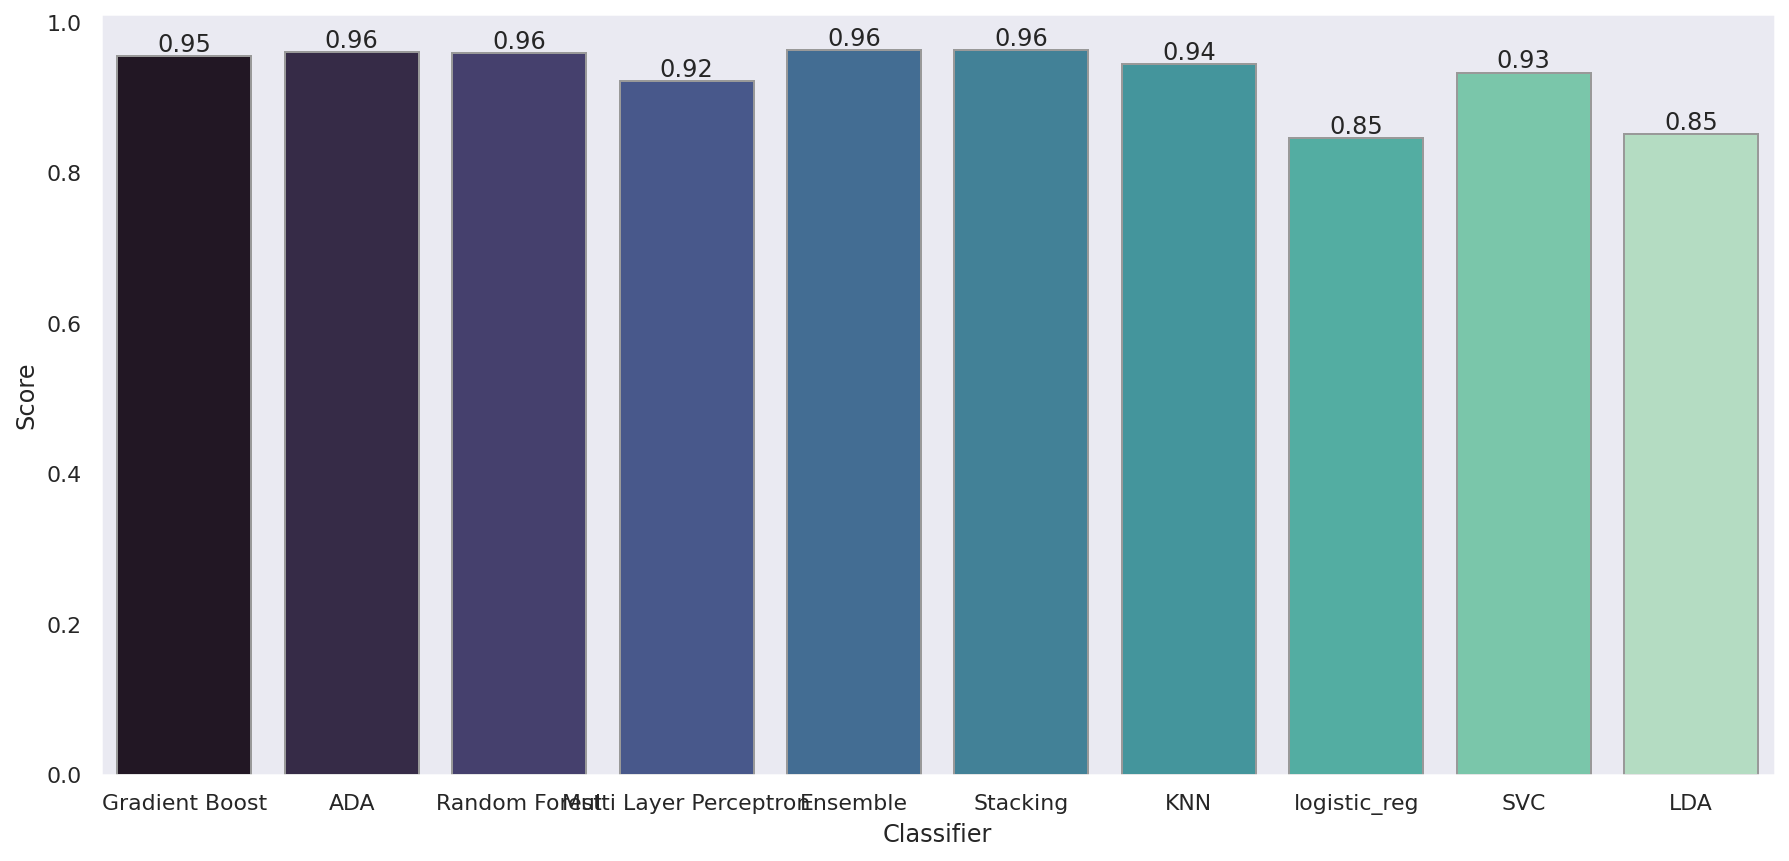

In [140]:
scores = [gb.mean(),ada.mean(),random_forest.mean(), MLP_classifier.mean(), 
          ensemble_clf.mean(), stacking_clf.mean(),KNN.mean(),
          logistic_reg.mean().mean(), SVC.mean().mean(), LDA.mean().mean()]
classifiers = ['Gradient Boost','ADA','Random Forest', 'Multi Layer Perceptron', 
              'Ensemble', "Stacking", 'KNN', 'logistic_reg', 'SVC', 'LDA']
scores_df = pd.DataFrame({'Score': scores, 'Classifier':classifiers})

plt.figure(figsize=(15,7))
sns.set_style({'axes.grid': False})
ax = sns.barplot(data=scores_df, x='Classifier', y='Score', palette="mako", edgecolor=".6")

# Add the y-values as text labels inside the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % p.get_height(), 
            fontsize=12, ha='center', va='bottom')

plt.show()

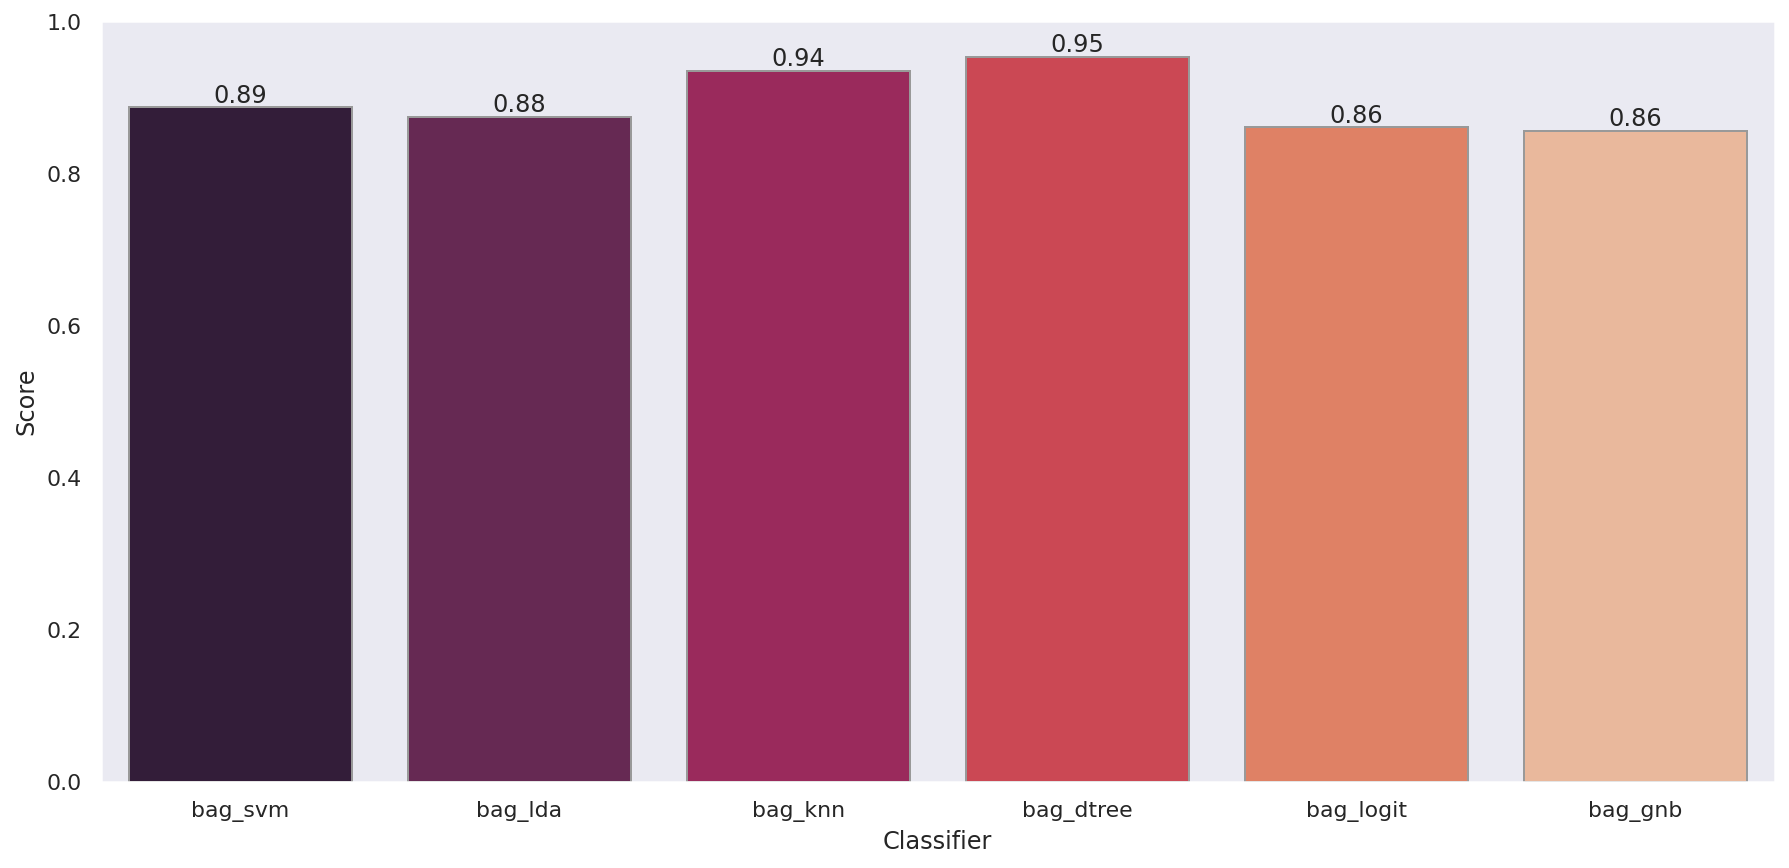

In [141]:
# Chart -> models with bagging

scores = [bag_svm.mean(), bag_lda.mean(), bag_knn.mean(), #bag_mlp.mean(), 
          bag_dtree.mean(), bag_logit.mean(), bag_gnb.mean()]

classifiers = ['bag_svm', 'bag_lda', 'bag_knn', #'bag_mlp', 
               'bag_dtree', 'bag_logit', 'bag_gnb']
scores_df = pd.DataFrame({'Score': scores, 'Classifier':classifiers})

plt.figure(figsize=(15,7))
sns.set_style({'axes.grid': False})
ax = sns.barplot(data=scores_df, x='Classifier', y='Score', palette="rocket", edgecolor=".6")

# Add the y-values as text labels inside the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % p.get_height(), 
            fontsize=12, ha='center', va='bottom')

plt.show()

#### Final assesment 

In [142]:
from sklearn.model_selection import cross_validate

# Cross_validation, by model, with all variables and all measurements
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    random_forest_all = cross_validate(randomForest, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision', 'recall'))
    dt_all = cross_validate(rand_tree_cv, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision', 'recall'))
    logistic_reg_all = cross_validate(log_model, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision', 'recall'))
    MLP_classifier_all = cross_validate(MLP_clf, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1','accuracy', 'precision','recall'))
    g_naive_bayes_all = cross_validate(modelNB, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    gb_all = cross_validate(gb_clf, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    ada_all = cross_validate(ada_clf, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    ensemble_clf_all = cross_validate(adv_ensemble, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    stacking_clf_all = cross_validate(stacking_ensemble, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    SVC_all = cross_validate(SVM_clf, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    LDA_all = cross_validate(LDA_clf, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    KNN_all = cross_validate(KNN_clf, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    bag_svm_all =  cross_validate(bagsvm, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    bag_lda_all = cross_validate(baglda, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    bag_knn_all = cross_validate(bagknn, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    # bag_mlp_all = cross_validate(bagmlp, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    bag_dtree_all = cross_validate(bagdtree, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    bag_logit_all = cross_validate(baglogit, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))
    bag_gnb_all = cross_validate(bagdnb, x_train_clf, y_train.values.ravel(), cv=5, scoring=('f1', 'accuracy', 'precision','recall'))

In [155]:
metrics_df_means =  pd.DataFrame(columns=['fit_time', 'test_f1', 'test_accuracy', 'test_precision', 'test_recall'])
#Average scores for metrics from cross-validation 
def results_table_cross(model, model_name, output):
    metrics = []
    metrics.append(model['fit_time'].mean())
    metrics.append(model['test_f1'].mean())
    metrics.append(model['test_accuracy'].mean())
    metrics.append(model['test_precision'].mean())
    metrics.append(model['test_recall'].mean())
    output.loc[model_name] = metrics


In [156]:
results_table_cross(random_forest_all, "Random Forest", metrics_df_means)
results_table_cross(logistic_reg_all, "Logit", metrics_df_means)
results_table_cross(MLP_classifier_all, "Multi Layer Perceptron", metrics_df_means)
results_table_cross(g_naive_bayes_all, "Gaussian naive Bayes", metrics_df_means)
results_table_cross(gb_all, "GB", metrics_df_means)
results_table_cross(ada_all, "ADA", metrics_df_means)
results_table_cross(ensemble_clf_all, "Ensemble", metrics_df_means)
results_table_cross(SVC_all, "SVC", metrics_df_means)
results_table_cross(LDA_all, "LDA", metrics_df_means)
results_table_cross(KNN_all, "KNN", metrics_df_means)

metrics_df_times = metrics_df_means.iloc[:, 0:1]
metrics_df_means = metrics_df_means.iloc[:, 1:5]

In [157]:
metrics_df_times

fit_time
Random Forest           0.227246
Logit                   0.008861
Multi Layer Perceptron  1.056645
Gaussian naive Bayes    0.003712
GB                      0.206615
ADA                     0.661161
Ensemble                1.176263
SVC                     0.007749
LDA                     0.003218
KNN                     0.002293

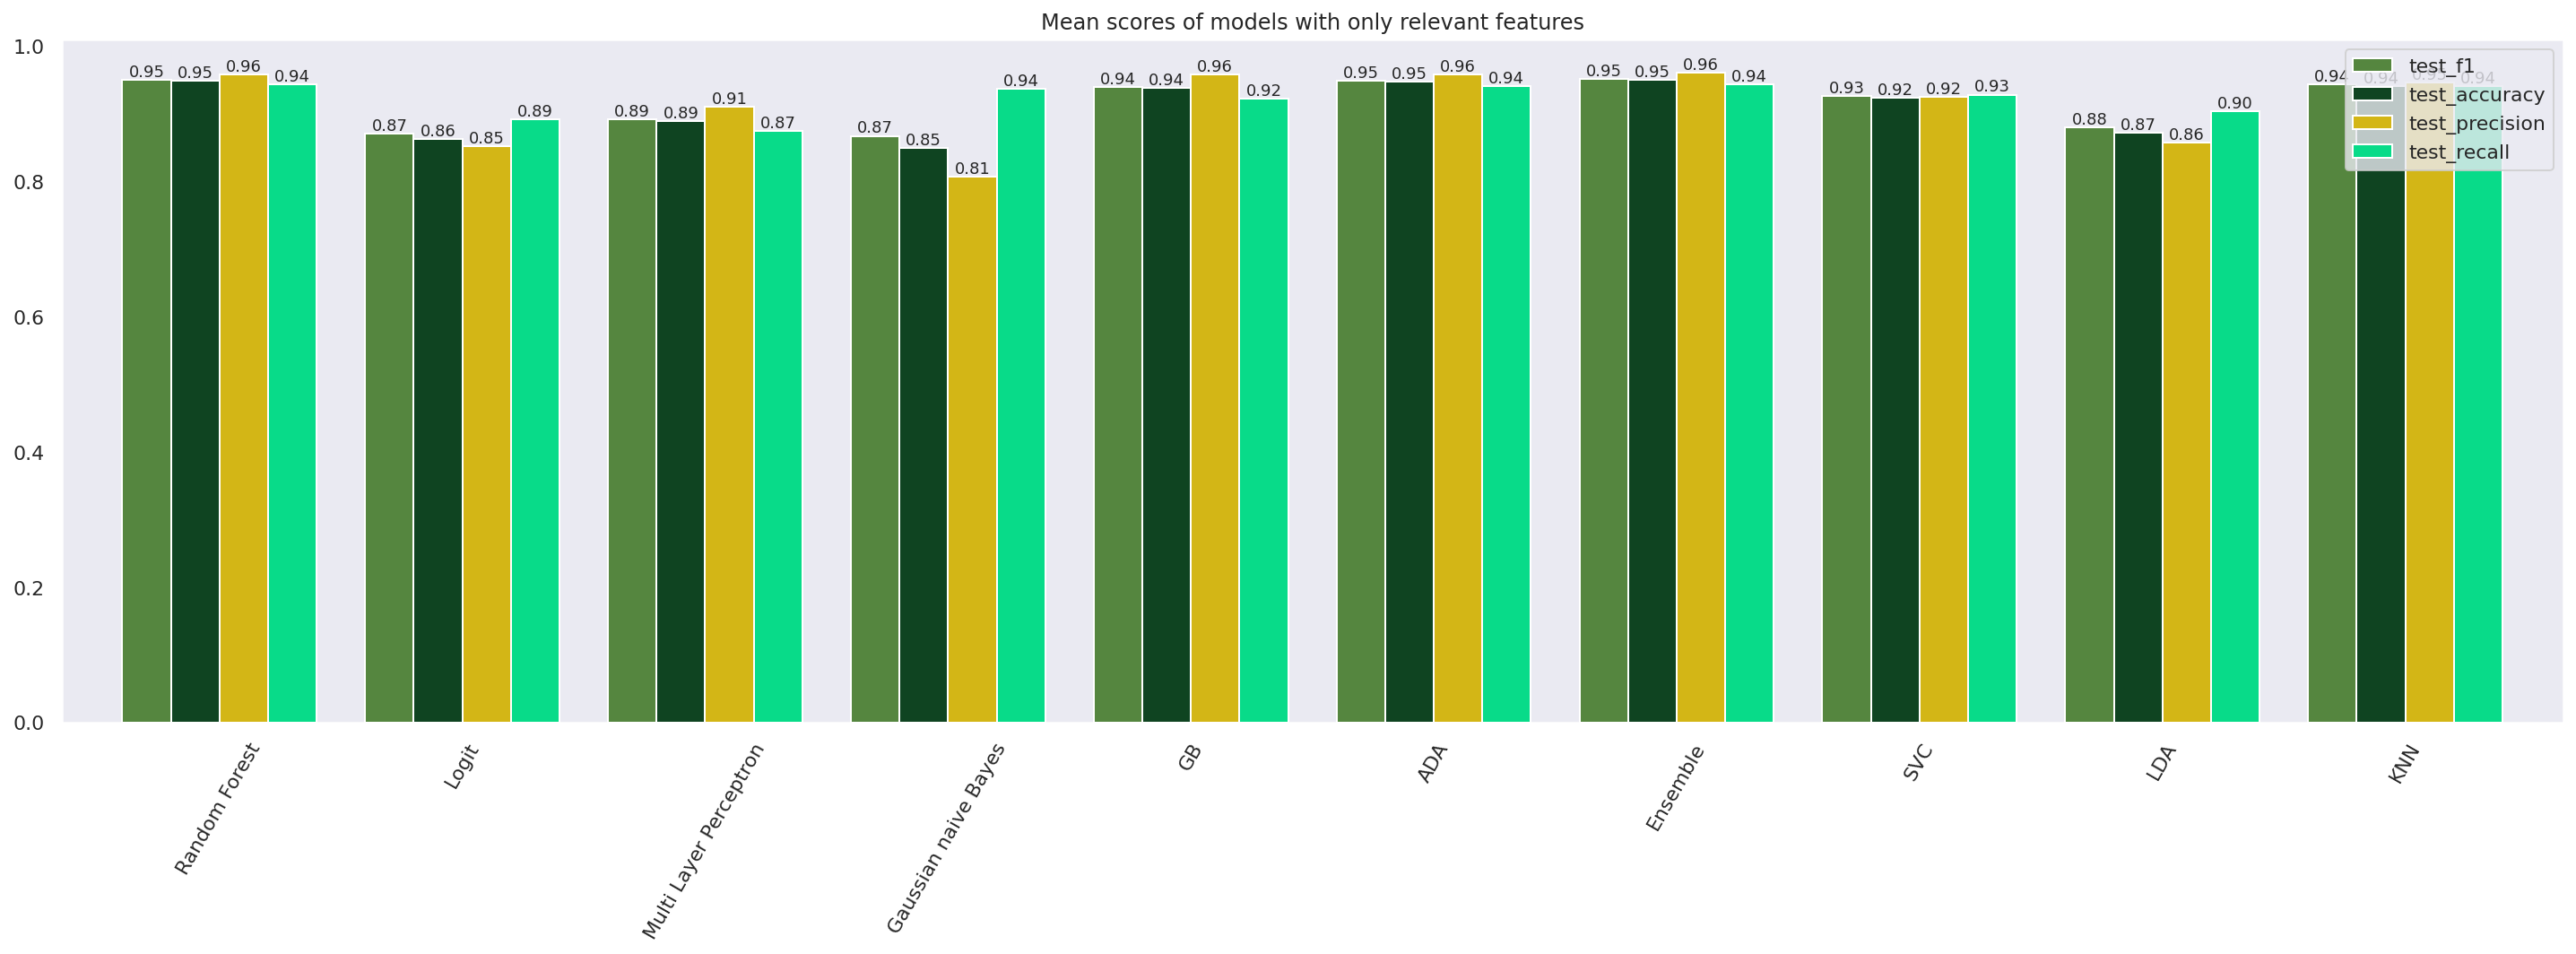

In [158]:
ax = metrics_df_means.plot.bar(width=0.8, rot=60, figsize=(25,7), legend=True, title="Mean scores of models with only relevant features",  color=['#55863f','#0f4421','#d3b616','#08db89']);
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % p.get_height(), 
            fontsize=9, ha='center', va='bottom')

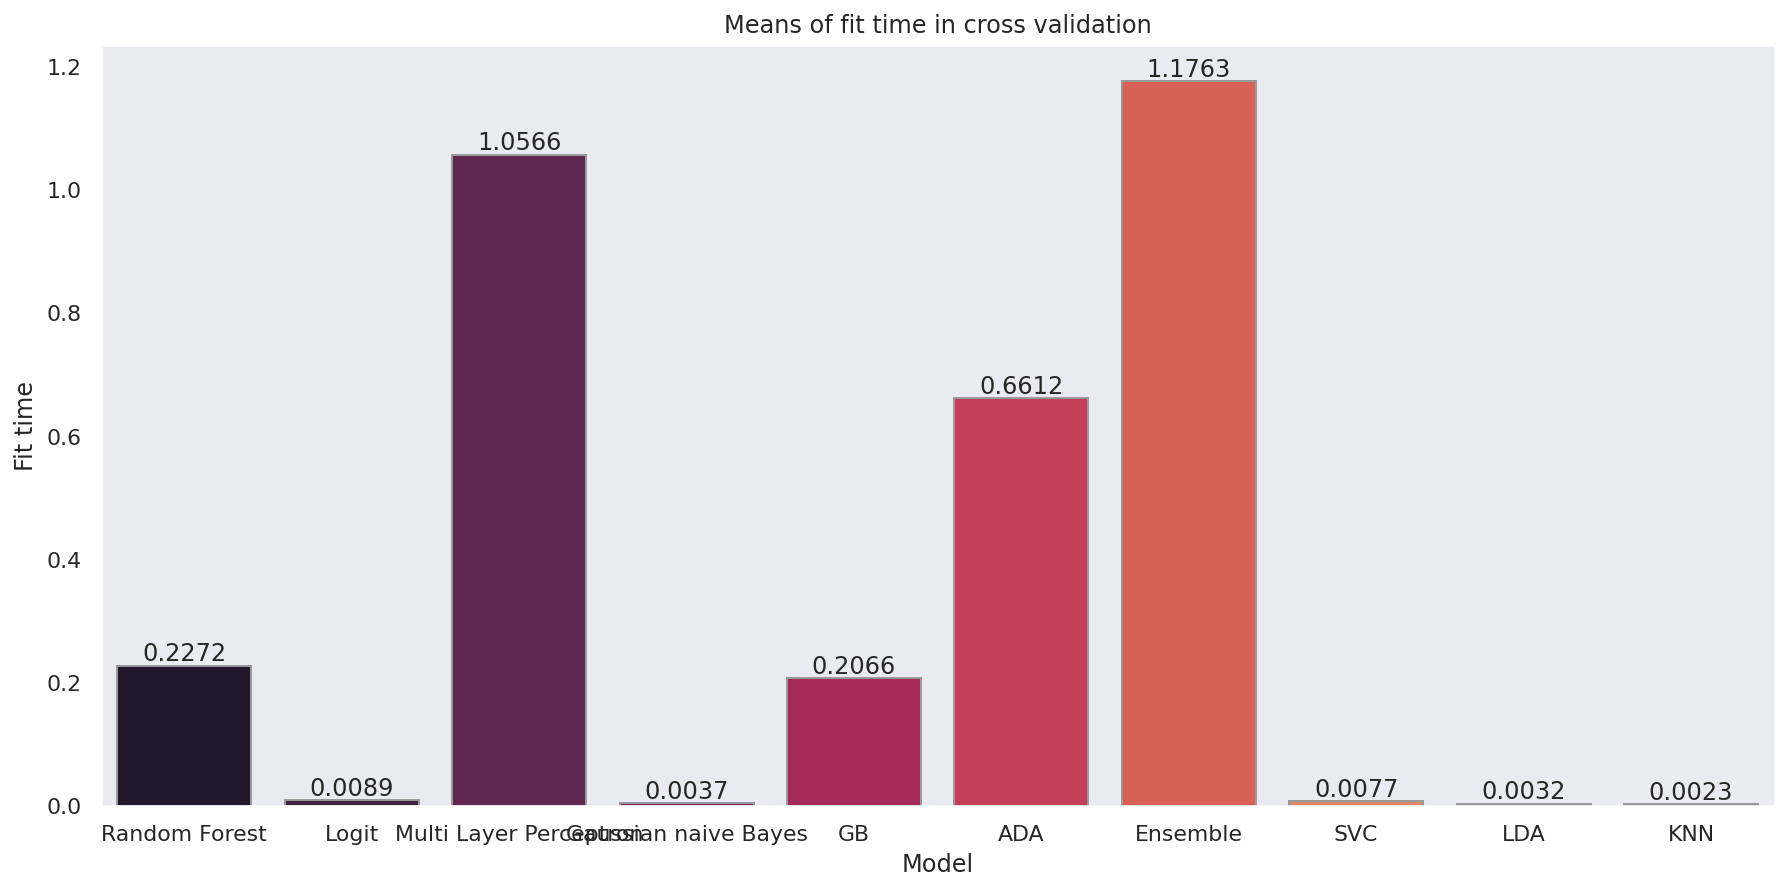

In [147]:
metrics_df_times = metrics_df_times.reset_index()

plt.figure(figsize=(15,7))
sns.set_style({'axes.grid': False})

ax = sns.barplot(data=metrics_df_times, x='index', y='fit_time', palette="rocket", edgecolor=".6")
ax.set_title("Means of fit time in cross validation")
ax.set(xlabel='Model', ylabel='Fit time')
# Add the y-values as text labels inside the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.4f' % p.get_height(), 
            fontsize=12, ha='center', va='bottom')

plt.show()

Bagged models

In [159]:
metrics_df_means_bag =  pd.DataFrame(columns=['fit_time', 'test_f1', 'test_accuracy', 'test_precision', 'test_recall'])

results_table_cross(bag_svm_all, "Bag SVM", metrics_df_means_bag)
results_table_cross(bag_lda_all, "Bag LDA", metrics_df_means_bag)
results_table_cross(bag_knn_all, "Bag KNN", metrics_df_means_bag)
# results_table_cross(bag_mlp_all, "Bag MLP", metrics_df_means_bag)
results_table_cross(bag_dtree_all, "Bag DTree", metrics_df_means_bag)
results_table_cross(bag_logit_all, "Bag LR", metrics_df_means_bag)
results_table_cross(bag_gnb_all, "Bag GNB", metrics_df_means_bag)

metrics_df_times_bag = metrics_df_means_bag.iloc[:, 0:1]
metrics_df_means_bag = metrics_df_means_bag.iloc[:, 1:5]

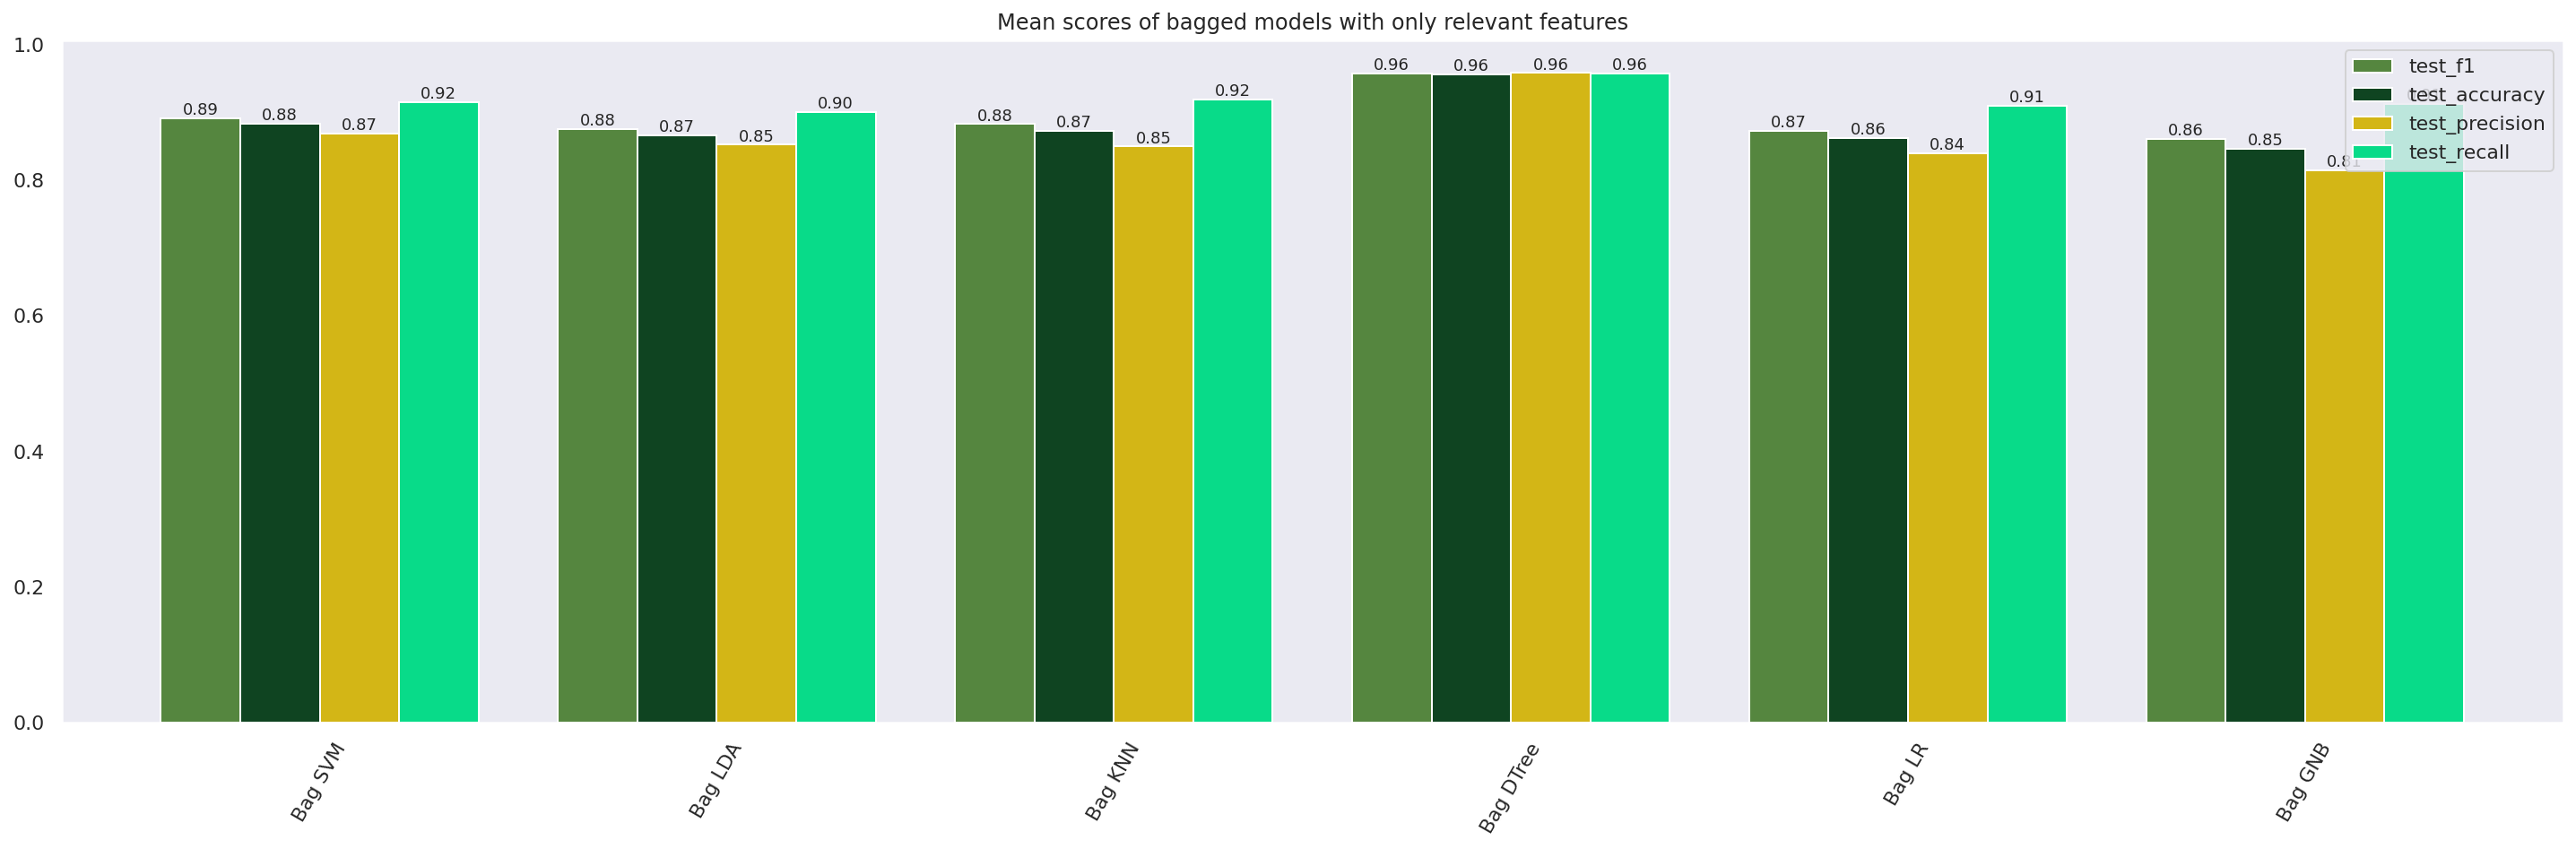

In [160]:
ax = metrics_df_means_bag.plot.bar(width=0.8, rot=60, figsize=(25,7), legend=True, title="Mean scores of bagged models with only relevant features",  color=['#55863f','#0f4421','#d3b616','#08db89']);
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % p.get_height(), 
            fontsize=9, ha='center', va='bottom')

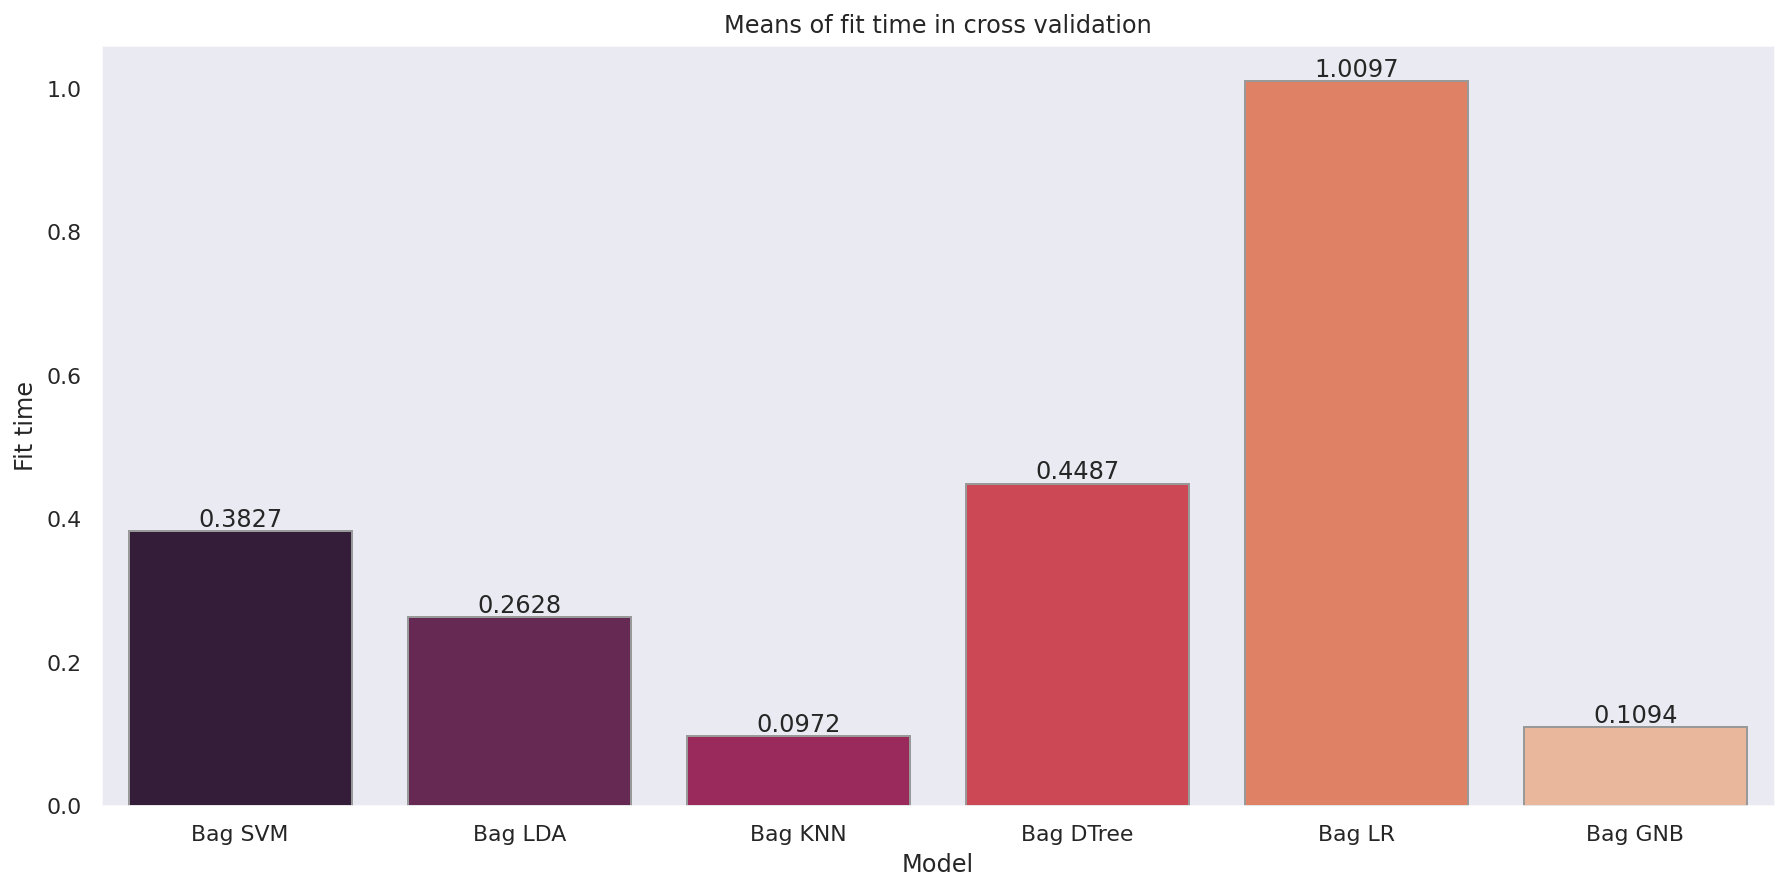

In [161]:
metrics_df_times_bag = metrics_df_times_bag.reset_index()

plt.figure(figsize=(15,7))
sns.set_style({'axes.grid': False})

ax = sns.barplot(data=metrics_df_times_bag, x='index', y='fit_time', palette="rocket", edgecolor=".6")
ax.set_title("Means of fit time in cross validation")
ax.set(xlabel='Model', ylabel='Fit time')
# Add the y-values as text labels inside the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.4f' % p.get_height(), 
            fontsize=12, ha='center', va='bottom')

plt.show()

# 9. Deployment

#### ADA Boost

In [174]:
y_test_pred_ada = ada_clf_cv.predict(test_data[x_train.columns])
y_test_pred_ada

test_pred_df_ada = pd.DataFrame({'PatientID': test_data.index, 'Disease': y_test_pred_ada}).astype('int')


In [176]:
test_pred_df_ada.to_csv('submission_ada.csv', index=False)

from google.colab import files
files.download("submission_ada.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>